The following project is about is related with direct marketing campaigns (phone calls) of a Portuguese banking institution and our objective is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. Let's start with importing the basic libraries and packages required for our project.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import *
import statsmodels.api as sm
import networkx as nx
import requests
from flask import Flask
import sqlalchemy
import pytest
import tkinter as tk
import openpyxl

Now that we have the basic list of packages and libraries, let's upload the csv into a dataframe using pandas and get a general outloook of the entire database.

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv'
subscriber_data = pd.read_csv(url)
print(subscriber_data)

          ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaig

Let's look at the first 30 values of the dataframe using the head() command.

In [3]:
subscriber_data.head(30)

ID  age          job   marital  education default  balance housing  \
0   26110   56       admin.   married    unknown      no     1933      no   
1   40576   31      unknown   married  secondary      no        3      no   
2   15320   27     services   married  secondary      no      891     yes   
3   43962   57   management  divorced   tertiary      no     3287      no   
4   29842   31   technician   married  secondary      no      119     yes   
5   29390   33   management    single   tertiary      no        0     yes   
6   40444   56      retired   married  secondary      no     1044      no   
7   40194   50   technician    single  secondary      no     1811      no   
8   29824   45  blue-collar  divorced  secondary      no     1951     yes   
9   44676   35       admin.   married  secondary      no     1204      no   
10  14699   36     services  divorced  secondary     yes        0      no   
11  30180   35  blue-collar   married  secondary      no     -151     yes   
12  28024   44     services   married  secondary      no      237     yes   
13    480   39   management    single  secondary      no     1877     yes   
14   3260   43  blue-collar   married  secondary      no      960     yes   
15   9701   41     services    single  secondary      no      260      no   
16   2843   53   technician   married  secondary      no      719     yes   
17  30489   64   management   married   tertiary      no     6251      no   
18  35310   44  blue-collar   married    primary      no     4031     yes   
19  38291   48  blue-collar  divorced  secondary      no      501     yes   
20   4554   60   management   married   tertiary      no      328     yes   
21  12156   29       admin.    single   tertiary      no      507     yes   
22  16755   30       admin.  divorced  secondary      no       78     yes   
23  14731   39   management   married   tertiary      no      285     yes   
24  40057   42       admin.    single  secondary      no      684      no   
25  20722   31   management   married   tertiary      no     4720     yes   
26   9934   60      retired   married    primary      no    17413      no   
27   2730   33     services   married  secondary      no      184     yes   
28  30448   45   technician   married  secondary      no      858      no   
29  30566   53    housemaid    single    primary      no       80      no   

   loan    contact  day month  duration  campaign  pdays  previous poutcome  \
0    no  telephone   19   nov        44         2     -1         0  unknown   
1    no   cellular   20   jul        91         2     -1         0  unknown   
2    no   cellular   18   jul       240         1     -1         0  unknown   
3    no   cellular   22   jun       867         1     84         3  success   
4    no   cellular    4   feb       380         1     -1         0  unknown   
5    no   cellular    2   feb       116         3     -1         0  unknown   
6    no  telephone    3   jul       353         2     -1         0  unknown   
7    no   cellular    8   jun        97         4     -1         0  unknown   
8    no   cellular    4   feb       692         1     -1         0  unknown   
9    no   cellular    3   sep       789         2     -1         0  unknown   
10  yes   cellular   15   jul       687         7     -1         0  unknown   
11   no   cellular    5   feb        96         2     -1         0  unknown   
12   no   cellular   28   jan       212         2     -1         0  unknown   
13   no    unknown    6   may       185         1     -1         0  unknown   
14   no    unknown   15   may       436         1     -1         0  unknown   
15   no    unknown    6   jun        75         1     -1         0  unknown   
16   no    unknown   14   may       230         1     -1         0  unknown   
17   no  telephone    5   feb       125         7     -1         0  unknown   
18   no   cellular    7   may       983         4     -1         0  unknown   
19   no   cellular   15   may        12

Now let's look at the last 30 values of the dataframe using the tail() command.

In [4]:
subscriber_data.tail(30)

ID  age           job   marital  education default  balance housing  \
31617   5806   28    technician   married  secondary      no      880     yes   
31618   8778   21   blue-collar    single  secondary     yes      -59     yes   
31619   1159   59       retired   married    unknown      no        0      no   
31620  15317   45    management   married   tertiary      no      726     yes   
31621  28819   32      services  divorced  secondary      no      130     yes   
31622  44152   79       retired  divorced    primary      no     2787      no   
31623  22175   57    technician    single  secondary      no      104      no   
31624  40354   50    management   married   tertiary      no     5108     yes   
31625   4516   56  entrepreneur   married   tertiary      no     8741     yes   
31626   4031   57       retired   married    primary      no       70     yes   
31627   9508   35      services    single  secondary      no       -2      no   
31628  36947   43    unemployed  divorced    primary      no      -70     yes   
31629  19661   35    technician    single   tertiary      no      632      no   
31630  17513   36    management    single   tertiary      no        8      no   
31631  11638   46  entrepreneur   married   tertiary      no      341      no   
31632   5195   33   blue-collar   married  secondary      no        0     yes   
31633   9847   50    technician   married   tertiary      no     3117      no   
31634   8652   30    technician    single   tertiary      no      432     yes   
31635  41379   35    management   married   tertiary      no        4      no   
31636  20954   48     housemaid   married    primary      no      469      no   
31637  20110   44    technician   married  secondary      no     5163      no   
31638  16309   29   blue-collar   married  secondary      no      721     yes   
31639    279   38      services    single  secondary      no      570     yes   
31640  12109   43    management    single  secondary      no     2968      no   
31641   9476   37    technician    single   tertiary      no     1309      no   
31642  36483   29    management    single   tertiary      no        0     yes   
31643  40178   53    management  divorced   tertiary      no      380      no   
31644  19710   32    management    single   tertiary      no      312      no   
31645  38556   57    technician   married  secondary      no      225     yes   
31646  14156   55    management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31617   no    unknown   26   may       188         1     -1         0   
31618  yes    unknown    4   jun        83         1     -1         0   
31619   no    unknown    8   may       425         6     -1         0   
31620  yes   cellular   18   jul       199         1     -1         0   
31621   no   cellular   30   jan       194         3     -1         0   
31622   no  telephone   13   jul       617         1    377         1   
31623   no   cellular   21   aug       297         2     -1         0   
31624   no   cellular   19   jun       140         2     -1         0   
31625   no    unknown   20   may       318         3     -1         0   
31626  yes    unknown   16   may       186         5     -1         0   
31627   no    unknown    6   jun        15         1     -1         0   
31628   no   cellular   12   may       124         2     -1         0   
31629   no   cellular    7   aug       141         1     -1         0   
31630   no   cellular   29   jul       858         7     -1         0   
31631   no    unknown   19   jun       318         2     -1         0   
31632   no    unknown   21   may       521         3     -1         0   
31633   no    unknown    9   jun       174         1     -1         0   
31634  yes    unknown    3   jun       180         3     -1         0   
31635   no   cellular    1   sep       157         2     -1         0   
31636   no   cellular   14   aug      

Now let's label encode the month column into a unique number in order for us to convert the datatype of column from object to float later on in the project.

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
label_encoder = LabelEncoder()
subscriber_data['MonthNumber'] = label_encoder.fit_transform(subscriber_data['month'])
print(subscriber_data)

          ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaig

Now let's use the label encoder to map the contact column into a unique number based on their features in this particular order- 'telephone': 1, 'cellular': 2, 'unknown': 0.

In [5]:
label_encoder = LabelEncoder()
subscriber_data['contact_encoded'] = label_encoder.fit_transform(subscriber_data['contact'])
mapping = {'telephone': 1, 'cellular': 2, 'unknown': 0}
subscriber_data['contact_mapped'] = subscriber_data['contact'].map(mapping)
print(subscriber_data)

          ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  ...  month duration  campaig

Now let's use the label encoder to encode the poutcome column into the following format- 'unknown': 0, 'success': 2, 'failure': 1

In [6]:
label_encoder = LabelEncoder()
subscriber_data['poutcome_encoded'] = label_encoder.fit_transform(subscriber_data['poutcome'])
mapping = {'unknown': 0, 'success': 2, 'failure': 1}
subscriber_data['poutcome_mapped'] = subscriber_data['poutcome'].map(mapping)
print(subscriber_data)

          ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  ...  campaign pdays  previou

Now lets convert all the values in the 'loan', 'default', 'housing', and 'subscribed' columns into the following the format- 'yes': 1, 'no': 0

In [7]:
columns_to_convert = ['loan', 'default', 'housing', 'subscribed']
for column in columns_to_convert:
    subscriber_data[column] = subscriber_data[column].map({'yes': 1, 'no': 0})
print(subscriber_data)

          ID  age         job   marital  education  default  balance  housing  \
0      26110   56      admin.   married    unknown        0     1933        0   
1      40576   31     unknown   married  secondary        0        3        0   
2      15320   27    services   married  secondary        0      891        1   
3      43962   57  management  divorced   tertiary        0     3287        0   
4      29842   31  technician   married  secondary        0      119        1   
...      ...  ...         ...       ...        ...      ...      ...      ...   
31642  36483   29  management    single   tertiary        0        0        1   
31643  40178   53  management  divorced   tertiary        0      380        0   
31644  19710   32  management    single   tertiary        0      312        0   
31645  38556   57  technician   married  secondary        0      225        1   
31646  14156   55  management  divorced  secondary        0      204        1   

       loan    contact  ...

Let's start dropping the columns that are not necessary for us to do EDA, visualisations or predictions. Initially we will drop 'contact_encoded', 'poutcome_encoded', and 'month' columns.

In [8]:
columns_to_drop = ['contact_encoded', 'poutcome_encoded', 'month']
subscriber_data = subscriber_data.drop(columns=columns_to_drop)
print(subscriber_data)

          ID  age         job   marital  education  default  balance  housing  \
0      26110   56      admin.   married    unknown        0     1933        0   
1      40576   31     unknown   married  secondary        0        3        0   
2      15320   27    services   married  secondary        0      891        1   
3      43962   57  management  divorced   tertiary        0     3287        0   
4      29842   31  technician   married  secondary        0      119        1   
...      ...  ...         ...       ...        ...      ...      ...      ...   
31642  36483   29  management    single   tertiary        0        0        1   
31643  40178   53  management  divorced   tertiary        0      380        0   
31644  19710   32  management    single   tertiary        0      312        0   
31645  38556   57  technician   married  secondary        0      225        1   
31646  14156   55  management  divorced  secondary        0      204        1   

       loan    contact  day

Now let's drop the poutcome column.

In [9]:
column_to_drop = ['poutcome']
subscriber_data = subscriber_data.drop(columns=column_to_drop)
print(subscriber_data)

          ID  age         job   marital  education  default  balance  housing  \
0      26110   56      admin.   married    unknown        0     1933        0   
1      40576   31     unknown   married  secondary        0        3        0   
2      15320   27    services   married  secondary        0      891        1   
3      43962   57  management  divorced   tertiary        0     3287        0   
4      29842   31  technician   married  secondary        0      119        1   
...      ...  ...         ...       ...        ...      ...      ...      ...   
31642  36483   29  management    single   tertiary        0        0        1   
31643  40178   53  management  divorced   tertiary        0      380        0   
31644  19710   32  management    single   tertiary        0      312        0   
31645  38556   57  technician   married  secondary        0      225        1   
31646  14156   55  management  divorced  secondary        0      204        1   

       loan    contact  day

We can see that i missed to convert one column into its unique numerical values, which was the marital column. Let's map the values 'married': 2, 'single': 1, 'divorced': 0 with the help of the dataframe.

In [10]:
marital_mapping = {'married': 2, 'single': 1, 'divorced': 0}
subscriber_data['marital_encoded'] = subscriber_data['marital'].map(marital_mapping)
print(subscriber_data)

          ID  age         job   marital  education  default  balance  housing  \
0      26110   56      admin.   married    unknown        0     1933        0   
1      40576   31     unknown   married  secondary        0        3        0   
2      15320   27    services   married  secondary        0      891        1   
3      43962   57  management  divorced   tertiary        0     3287        0   
4      29842   31  technician   married  secondary        0      119        1   
...      ...  ...         ...       ...        ...      ...      ...      ...   
31642  36483   29  management    single   tertiary        0        0        1   
31643  40178   53  management  divorced   tertiary        0      380        0   
31644  19710   32  management    single   tertiary        0      312        0   
31645  38556   57  technician   married  secondary        0      225        1   
31646  14156   55  management  divorced  secondary        0      204        1   

       loan    contact  day

Now let's drop the marital column from the dataframe.

In [11]:
column_to_drop = ['marital']
subscriber_data = subscriber_data.drop(columns=column_to_drop)
print(subscriber_data)

          ID  age         job  education  default  balance  housing  loan  \
0      26110   56      admin.    unknown        0     1933        0     0   
1      40576   31     unknown  secondary        0        3        0     0   
2      15320   27    services  secondary        0      891        1     0   
3      43962   57  management   tertiary        0     3287        0     0   
4      29842   31  technician  secondary        0      119        1     0   
...      ...  ...         ...        ...      ...      ...      ...   ...   
31642  36483   29  management   tertiary        0        0        1     0   
31643  40178   53  management   tertiary        0      380        0     1   
31644  19710   32  management   tertiary        0      312        0     0   
31645  38556   57  technician  secondary        0      225        1     0   
31646  14156   55  management  secondary        0      204        1     0   

         contact  day  duration  campaign  pdays  previous  subscribed  \
0

Now let's encode the education column my mapping the values into the following format:'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3.

In [12]:
education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
subscriber_data['education_encoded'] = subscriber_data['education'].map(education_mapping)
print(subscriber_data)

          ID  age         job  education  default  balance  housing  loan  \
0      26110   56      admin.    unknown        0     1933        0     0   
1      40576   31     unknown  secondary        0        3        0     0   
2      15320   27    services  secondary        0      891        1     0   
3      43962   57  management   tertiary        0     3287        0     0   
4      29842   31  technician  secondary        0      119        1     0   
...      ...  ...         ...        ...      ...      ...      ...   ...   
31642  36483   29  management   tertiary        0        0        1     0   
31643  40178   53  management   tertiary        0      380        0     1   
31644  19710   32  management   tertiary        0      312        0     0   
31645  38556   57  technician  secondary        0      225        1     0   
31646  14156   55  management  secondary        0      204        1     0   

         contact  day  duration  campaign  pdays  previous  subscribed  \
0

Now let's drop the education column since it has been mapped.

In [13]:
column_to_drop = ['education']
subscriber_data = subscriber_data.drop(columns=column_to_drop)
print(subscriber_data)

          ID  age         job  default  balance  housing  loan    contact  \
0      26110   56      admin.        0     1933        0     0  telephone   
1      40576   31     unknown        0        3        0     0   cellular   
2      15320   27    services        0      891        1     0   cellular   
3      43962   57  management        0     3287        0     0   cellular   
4      29842   31  technician        0      119        1     0   cellular   
...      ...  ...         ...      ...      ...      ...   ...        ...   
31642  36483   29  management        0        0        1     0   cellular   
31643  40178   53  management        0      380        0     1   cellular   
31644  19710   32  management        0      312        0     0   cellular   
31645  38556   57  technician        0      225        1     0  telephone   
31646  14156   55  management        0      204        1     0   cellular   

       day  duration  campaign  pdays  previous  subscribed  MonthNumber  \

Now let's drop the contact column since it has been mapped.

In [14]:
column_to_drop = ['contact']
subscriber_data = subscriber_data.drop(columns=column_to_drop)
print(subscriber_data)

          ID  age         job  default  balance  housing  loan  day  duration  \
0      26110   56      admin.        0     1933        0     0   19        44   
1      40576   31     unknown        0        3        0     0   20        91   
2      15320   27    services        0      891        1     0   18       240   
3      43962   57  management        0     3287        0     0   22       867   
4      29842   31  technician        0      119        1     0    4       380   
...      ...  ...         ...      ...      ...      ...   ...  ...       ...   
31642  36483   29  management        0        0        1     0   12       116   
31643  40178   53  management        0      380        0     1    5       438   
31644  19710   32  management        0      312        0     0    7        37   
31645  38556   57  technician        0      225        1     0   15        22   
31646  14156   55  management        0      204        1     0   11      1973   

       campaign  pdays  pre

Now let's use the label encoder to give a unique number to each of the value in the job column.

In [15]:
label_encoder = LabelEncoder()
subscriber_data['job_encoded'] = label_encoder.fit_transform(subscriber_data['job'])
print(subscriber_data)

          ID  age         job  default  balance  housing  loan  day  duration  \
0      26110   56      admin.        0     1933        0     0   19        44   
1      40576   31     unknown        0        3        0     0   20        91   
2      15320   27    services        0      891        1     0   18       240   
3      43962   57  management        0     3287        0     0   22       867   
4      29842   31  technician        0      119        1     0    4       380   
...      ...  ...         ...      ...      ...      ...   ...  ...       ...   
31642  36483   29  management        0        0        1     0   12       116   
31643  40178   53  management        0      380        0     1    5       438   
31644  19710   32  management        0      312        0     0    7        37   
31645  38556   57  technician        0      225        1     0   15        22   
31646  14156   55  management        0      204        1     0   11      1973   

       campaign  pdays  pre

Now let's drop the job column since it has already been encoded.

In [16]:
column_to_drop = ['job']
subscriber_data = subscriber_data.drop(columns=column_to_drop)
print(subscriber_data)

          ID  age  default  balance  housing  loan  day  duration  campaign  \
0      26110   56        0     1933        0     0   19        44         2   
1      40576   31        0        3        0     0   20        91         2   
2      15320   27        0      891        1     0   18       240         1   
3      43962   57        0     3287        0     0   22       867         1   
4      29842   31        0      119        1     0    4       380         1   
...      ...  ...      ...      ...      ...   ...  ...       ...       ...   
31642  36483   29        0        0        1     0   12       116         2   
31643  40178   53        0      380        0     1    5       438         2   
31644  19710   32        0      312        0     0    7        37         3   
31645  38556   57        0      225        1     0   15        22         7   
31646  14156   55        0      204        1     0   11      1973         2   

       pdays  previous  subscribed  MonthNumber  co

We can see that the number of rows and columns remain the same after transformation.Now let's get the first 40 values of our new dataframe that has been transformed.

In [17]:
subscriber_data.head(40)

ID  age  default  balance  housing  loan  day  duration  campaign  \
0   26110   56        0     1933        0     0   19        44         2   
1   40576   31        0        3        0     0   20        91         2   
2   15320   27        0      891        1     0   18       240         1   
3   43962   57        0     3287        0     0   22       867         1   
4   29842   31        0      119        1     0    4       380         1   
5   29390   33        0        0        1     0    2       116         3   
6   40444   56        0     1044        0     0    3       353         2   
7   40194   50        0     1811        0     0    8        97         4   
8   29824   45        0     1951        1     0    4       692         1   
9   44676   35        0     1204        0     0    3       789         2   
10  14699   36        1        0        0     1   15       687         7   
11  30180   35        0     -151        1     0    5        96         2   
12  28024   44        0      237        1     0   28       212         2   
13    480   39        0     1877        1     0    6       185         1   
14   3260   43        0      960        1     0   15       436         1   
15   9701   41        0      260        0     0    6        75         1   
16   2843   53        0      719        1     0   14       230         1   
17  30489   64        0     6251        0     0    5       125         7   
18  35310   44        0     4031        1     0    7       983         4   
19  38291   48        0      501        1     0   15        12         5   
20   4554   60        0      328        1     0   20        72         5   
21  12156   29        0      507        1     0   20        20        33   
22  16755   30        0       78        1     0   24       132         1   
23  14731   39        0      285        1     0   15       838         3   
24  40057   42        0      684        0     0    4       207         1   
25  20722   31        0     4720        1     0   13       460         2   
26   9934   60        0    17413        0     0    9       200         1   
27   2730   33        0      184        1     0   13       109         4   
28  30448   45        0      858        0     0    5       617         4   
29  30566   53        0       80        0     0    5       230         2   
30   8653   31        0     -205        1     0    3        56        12   
31  30574   39        0        0        1     0    6        13         8   
32   1352   46        0     -768        1     0    8       194         3   
33  14133   35        0        0        0     1   11        71         3   
34  26297   30        0     3750        1     0   20       124         1   
35  30741   32        0     2770        0     0    6        44         9   
36  45155   63        0     3738        0     0    9       301         1   
37  11484   47        0      823        0     0   19       191         3   
38   4341   49        0      279        1     0   19       168         4   
39  30595   31        0       13        0     1    6      1019         2   

    pdays  previous  subscribed  MonthNumber  contact_mapped  poutcome_mapped  \
0      -1         0           0            9               1              0.0   
1      -1         0           0            5               2              0.0   
2      -1         0           0            5               2              0.0   
3      84         3           1            6               2              2.0   
4      -1         0           0            3               2              0.0   
5      -1         0           0            3               2              0.0   
6      -1         0           1            5               1              0.0   
7      -1         0           0            6               2              0.0   
8      -1         0           0            3               2              0.0   
9      -1         0           0           11               2              0.0   

Now let's get the last 40 values of our transformed dataframe.

In [21]:
subscriber_data.tail(40)

ID  age  default  balance  housing  loan  day  duration  campaign  \
31607  23578   40        0     1232        0     0   28       175        11   
31608   2384   26        0      309        1     0   13       210         1   
31609  26585   30        0     1456        1     0   20       227         1   
31610  37564   47        0      120        1     0   14        18         6   
31611  33754   65        0       90        1     0   22       416         1   
31612  26300   59        0       11        0     0   20       318         2   
31613  21020   40        0      539        0     0   14       121         2   
31614  29345   40        1      231        1     0    2        69         3   
31615   4849   36        0      115        0     0   21       114         1   
31616   4511   37        0     5432        1     1   20       774         1   
31617   5806   28        0      880        1     0   26       188         1   
31618   8778   21        1      -59        1     1    4        83         1   
31619   1159   59        0        0        0     0    8       425         6   
31620  15317   45        0      726        1     1   18       199         1   
31621  28819   32        0      130        1     0   30       194         3   
31622  44152   79        0     2787        0     0   13       617         1   
31623  22175   57        0      104        0     0   21       297         2   
31624  40354   50        0     5108        1     0   19       140         2   
31625   4516   56        0     8741        1     0   20       318         3   
31626   4031   57        0       70        1     1   16       186         5   
31627   9508   35        0       -2        0     0    6        15         1   
31628  36947   43        0      -70        1     0   12       124         2   
31629  19661   35        0      632        0     0    7       141         1   
31630  17513   36        0        8        0     0   29       858         7   
31631  11638   46        0      341        0     0   19       318         2   
31632   5195   33        0        0        1     0   21       521         3   
31633   9847   50        0     3117        0     0    9       174         1   
31634   8652   30        0      432        1     1    3       180         3   
31635  41379   35        0        4        0     0    1       157         2   
31636  20954   48        0      469        0     0   14       103         2   
31637  20110   44        0     5163        0     0   11        48         2   
31638  16309   29        0      721        1     0   23       644         1   
31639    279   38        0      570        1     0    5        75         2   
31640  12109   43        0     2968        0     0   20        30         4   
31641   9476   37        0     1309        0     0    6       442         2   
31642  36483   29        0        0        1     0   12       116         2   
31643  40178   53        0      380        0     1    5       438         2   
31644  19710   32        0      312        0     0    7        37         3   
31645  38556   57        0      225        1     0   15        22         7   
31646  14156   55        0      204        1     0   11      1973         2   

       pdays  previous  subscribed  MonthNumber  contact_mapped  \
31607     -1         0           0            1               2   
31608     -1         0           0            8               0   
31609     -1         0           0            9               2   
31610    365        11           0            8               1   
31611     -1         0           1            0               2   
31612     -1         0           0            9               2   
31613     -1         0           0            1               2   
31614     -1         0           0            3               2   
31615     -1         0           0            8               0   
31616     -1         0           0            8               0   
31617     -1         0           

Now let's look at the datatypes of all the columns that we have transformed.

In [18]:
subscriber_data.dtypes

ID                     int64
age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
subscribed             int64
MonthNumber            int32
contact_mapped         int64
poutcome_mapped      float64
marital_encoded        int64
education_encoded      int64
job_encoded            int32
dtype: object

Now let's convert all the int32 and int64 columns into float64 values.

In [17]:
subscriber_data['ID'] = subscriber_data['ID'].astype(float)
subscriber_data['age'] = subscriber_data['age'].astype(float)
subscriber_data['default'] = subscriber_data['default'].astype(float)
subscriber_data['balance'] = subscriber_data['balance'].astype(float)
subscriber_data['housing'] = subscriber_data['housing'].astype(float)
subscriber_data['day'] = subscriber_data['day'].astype(float)
subscriber_data['loan'] = subscriber_data['loan'].astype(float)
subscriber_data['loan'] = subscriber_data['loan'].astype(float)
subscriber_data['previous'] = subscriber_data['previous'].astype(float)
subscriber_data['duration'] = subscriber_data['duration'].astype(float)
subscriber_data['campaign'] = subscriber_data['campaign'].astype(float)
subscriber_data['pdays'] = subscriber_data['pdays'].astype(float)
subscriber_data['MonthNumber'] = subscriber_data['MonthNumber'].astype(float)
subscriber_data['contact_mapped'] = subscriber_data['contact_mapped'].astype(float)
subscriber_data['marital_encoded'] = subscriber_data['marital_encoded'].astype(float)
subscriber_data['education_encoded'] = subscriber_data['education_encoded'].astype(float)
subscriber_data['job_encoded'] = subscriber_data['job_encoded'].astype(float)

We can see that almost all the columns have been converted into float64 values other than our target variable which is the subscribed column. 

In [22]:
subscriber_data.dtypes

ID                   float64
age                  float64
default              float64
balance              float64
housing              float64
loan                 float64
day                  float64
duration             float64
campaign             float64
pdays                float64
previous             float64
subscribed             int64
MonthNumber          float64
contact_mapped       float64
poutcome_mapped      float64
marital_encoded      float64
education_encoded    float64
job_encoded          float64
dtype: object

Now let's declare the input variables by excluding the subscribed column and keeping all the other columns.

In [23]:
subscriber_dataxvariable_data = subscriber_data.iloc[:, list(range(11)) + list(range(12, 18))]

In [28]:
subscriber_dataxvariable_data

ID   age  default  balance  housing  loan   day  duration  \
0      26110.0  56.0      0.0   1933.0      0.0   0.0  19.0      44.0   
1      40576.0  31.0      0.0      3.0      0.0   0.0  20.0      91.0   
2      15320.0  27.0      0.0    891.0      1.0   0.0  18.0     240.0   
3      43962.0  57.0      0.0   3287.0      0.0   0.0  22.0     867.0   
4      29842.0  31.0      0.0    119.0      1.0   0.0   4.0     380.0   
...        ...   ...      ...      ...      ...   ...   ...       ...   
31642  36483.0  29.0      0.0      0.0      1.0   0.0  12.0     116.0   
31643  40178.0  53.0      0.0    380.0      0.0   1.0   5.0     438.0   
31644  19710.0  32.0      0.0    312.0      0.0   0.0   7.0      37.0   
31645  38556.0  57.0      0.0    225.0      1.0   0.0  15.0      22.0   
31646  14156.0  55.0      0.0    204.0      1.0   0.0  11.0    1973.0   

       campaign  pdays  previous  MonthNumber  contact_mapped  \
0           2.0   -1.0       0.0          9.0             1.0   
1           2.0   -1.0       0.0          5.0             2.0   
2           1.0   -1.0       0.0          5.0             2.0   
3           1.0   84.0       3.0          6.0             2.0   
4           1.0   -1.0       0.0          3.0             2.0   
...         ...    ...       ...          ...             ...   
31642       2.0   -1.0       0.0          8.0             2.0   
31643       2.0   -1.0       0.0          6.0             2.0   
31644       3.0   -1.0       0.0          1.0             2.0   
31645       7.0  337.0      12.0          8.0             1.0   
31646       2.0   -1.0       0.0          5.0             2.0   

       poutcome_mapped  marital_encoded  education_encoded  job_encoded  
0                  0.0              2.0                0.0          0.0  
1                  0.0              2.0                2.0         11.0  
2                  0.0              2.0                2.0          7.0  
3                  2.0              0.0                3.0          4.0  
4                  0.0              2.0                2.0          9.0  
...                ...              ...                ...          ...  
31642              0.0              1.0                3.0          4.0  
31643              0.0              0.0                3.0          4.0  
31644              0.0              1.0                3.0          4.0  
31645              1.0              2.0                2.0          9.0  
31646              0.0              0.0                2.0          4.0  

[31647 rows x 17 columns]

Now let's declare the target variable which is the subscribed column using the iloc method.

In [24]:
titanic_datayvariable_data = subscriber_data.iloc[:, 11:12]

In [25]:
titanic_datayvariable_data

subscribed
0               0
1               0
2               0
3               1
4               0
...           ...
31642           0
31643           1
31644           0
31645           0
31646           1

[31647 rows x 1 columns]

Now lets check for value counts of our target/output column.

In [31]:
subscriber_data_counts = subscriber_data['subscribed'].value_counts()
print(subscriber_data_counts)

0    27932
1     3715
Name: subscribed, dtype: int64


In [ ]:
We can see there are more non-subscribers 27932 than subscribers 3715.

Now let's get some description from our dataset.

In [32]:
subscriber_data_details = subscriber_data.describe()
print(subscriber_data_details)

                 ID           age       default        balance       housing  \
count  31647.000000  31647.000000  31647.000000   31647.000000  31647.000000   
mean   22563.972162     40.957247      0.018485    1363.890258      0.555629   
std    13075.936990     10.625134      0.134700    3028.304293      0.496904   
min        2.000000     18.000000      0.000000   -8019.000000      0.000000   
25%    11218.000000     33.000000      0.000000      73.000000      0.000000   
50%    22519.000000     39.000000      0.000000     450.000000      1.000000   
75%    33879.500000     48.000000      0.000000    1431.000000      1.000000   
max    45211.000000     95.000000      1.000000  102127.000000      1.000000   

               loan           day      duration      campaign         pdays  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean       0.162132     15.835466    258.113534      2.765697     39.576042   
std        0.368578      8.337097    257.1

Median of ID is(22519.000000) is lower to its mean(22563.972162), which means outliers are present-positively skewed

Median of age(39.000000) is lower than its mean(40.957247), which means few outliers are present- +vely skewed

Median of default(0.000000) is quite lower than its mean(0.018485), which means some outliers are present- +vely skewed

Median of balance(450.000000) is quite lower than its mean(1363.890258), which means some outliers are present- +vely skewed

Median of housing(1.000000) is quite higher than its mean(0.555629), which means few outliers are present- -ve

Median of loan(0.000000) is quite lower than its mean(0.162132), which means some outliers are present- +ve

Median of day(16.000000) is quite higher than its mean(15.835466), which means few outliers are present- -ve

Median of duration(180.000000) is pretty lower than its mean(258.113534), which means a lot of outliers are present- +ve

Median of Campaign(2.000000) is pretty lower than its mean(2.765697), which means a lot of outliers are present- +ve

Median of pdays(-1.000000) is pretty lower than its mean(39.576042), which means a lot of outliers are present- +ve

Median of previous(0.000000) is pretty lower than its mean(0.574272), which means a lot of outliers are present- +ve

Median of subscribed(0.000000) is pretty lower than its mean(0.117389), which means a lot of outliers are present- +ve

Median of monthnumber(6.000000) is pretty higher than its mean(5.533131), which means a lot of outliers are present- -ve

Median of contact_mapped(2.000000) is pretty higher than its mean(1.355358), which means a lot of outliers are present- -ve

Median of poutcome_mapped(0.000000) is pretty lower than its mean(0.181100), which means a lot of outliers are present- +ve

Median of job_encoded(4.000000) is pretty lower than its mean(4.332923), which means a lot of outliers are present- +ve

Median of marital_encoded(2.000000) is pretty higher than its mean(1.488672), which means a lot of outliers are present- -ve

Median of education_encoded(2.000000) is pretty lower than its mean(2.058931), which means a lot of outliers are present- +ve


The total count of all columns is 31647 values, other than the poutcome column which consists of 30359 vales which means it has missing values.

The maximum values of each column are as follows:-

ID: 45211.000000, iqr = 22661.5

Age: 95.000000, iqr= 15.000

Default:1.000000, iqr= 0

Housing: 1.000000, iqr= 1

Balance: 102127.000000,iqr= 1358

loan: 1.000000,iqr= 0

day: 31.0000,iqr= 13

duration:4918.000000,iqr=214

campaign:63.000000,iqr=2

pdays:871.000000,iqr=0

previous:275.000000,iqr=0

subscribed:1.000000,iqr=0

month_number:11.000000,iqr=5

contact_mapped:2.000000,iqr=2

poutcome_mapped:2.000000,iqr=0

job_encoded:2.000000,iqr=6

marital_encoded:3.000000,iqr=1

education_encoded:11.000000,iqr=1

Now let's get some information from the database using .info() method.

In [33]:
subscriber_data_info = subscriber_data.info
print(subscriber_data_info)

<bound method DataFrame.info of             ID   age  default  balance  housing  loan   day  duration  \
0      26110.0  56.0      0.0   1933.0      0.0   0.0  19.0      44.0   
1      40576.0  31.0      0.0      3.0      0.0   0.0  20.0      91.0   
2      15320.0  27.0      0.0    891.0      1.0   0.0  18.0     240.0   
3      43962.0  57.0      0.0   3287.0      0.0   0.0  22.0     867.0   
4      29842.0  31.0      0.0    119.0      1.0   0.0   4.0     380.0   
...        ...   ...      ...      ...      ...   ...   ...       ...   
31642  36483.0  29.0      0.0      0.0      1.0   0.0  12.0     116.0   
31643  40178.0  53.0      0.0    380.0      0.0   1.0   5.0     438.0   
31644  19710.0  32.0      0.0    312.0      0.0   0.0   7.0      37.0   
31645  38556.0  57.0      0.0    225.0      1.0   0.0  15.0      22.0   
31646  14156.0  55.0      0.0    204.0      1.0   0.0  11.0    1973.0   

       campaign  pdays  previous  subscribed  MonthNumber  contact_mapped  \
0           2.

Since almost all our columns have numerical values, let's get the absolute values of all the columns.

In [34]:
absolute_df = subscriber_data.abs()
print(absolute_df)

            ID   age  default  balance  housing  loan   day  duration  \
0      26110.0  56.0      0.0   1933.0      0.0   0.0  19.0      44.0   
1      40576.0  31.0      0.0      3.0      0.0   0.0  20.0      91.0   
2      15320.0  27.0      0.0    891.0      1.0   0.0  18.0     240.0   
3      43962.0  57.0      0.0   3287.0      0.0   0.0  22.0     867.0   
4      29842.0  31.0      0.0    119.0      1.0   0.0   4.0     380.0   
...        ...   ...      ...      ...      ...   ...   ...       ...   
31642  36483.0  29.0      0.0      0.0      1.0   0.0  12.0     116.0   
31643  40178.0  53.0      0.0    380.0      0.0   1.0   5.0     438.0   
31644  19710.0  32.0      0.0    312.0      0.0   0.0   7.0      37.0   
31645  38556.0  57.0      0.0    225.0      1.0   0.0  15.0      22.0   
31646  14156.0  55.0      0.0    204.0      1.0   0.0  11.0    1973.0   

       campaign  pdays  previous  subscribed  MonthNumber  contact_mapped  \
0           2.0    1.0       0.0           0  

Let's finally confirm the shape of our dataset using .shape method.

In [35]:
subscriber_data.shape

(31647, 18)

Let's get the list of all columns from our dataset

In [36]:
subscriber_data.columns

Index(['ID', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'subscribed', 'MonthNumber',
       'contact_mapped', 'poutcome_mapped', 'marital_encoded',
       'education_encoded', 'job_encoded'],
      dtype='object')

Now let's check the number of all null values in our dataset.

In [37]:
subscriber_data.isnull().sum().sum()

1288

Now let's check in which column does all these null values are contained.

In [39]:
subscriber_data.isnull().sum()

ID                      0
age                     0
default                 0
balance                 0
housing                 0
loan                    0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
subscribed              0
MonthNumber             0
contact_mapped          0
poutcome_mapped      1288
marital_encoded         0
education_encoded       0
job_encoded             0
dtype: int64

Like we could have seen earlier, it is inside the poutcome_mapped column. Now let's fill those columns with the median values of the all the values in the column.

In [18]:
median_value = subscriber_data['poutcome_mapped'].median()
subscriber_data['poutcome_mapped'].fillna(median_value, inplace=True)
print(subscriber_data)

            ID   age  default  balance  housing  loan   day  duration  \
0      26110.0  56.0      0.0   1933.0      0.0   0.0  19.0      44.0   
1      40576.0  31.0      0.0      3.0      0.0   0.0  20.0      91.0   
2      15320.0  27.0      0.0    891.0      1.0   0.0  18.0     240.0   
3      43962.0  57.0      0.0   3287.0      0.0   0.0  22.0     867.0   
4      29842.0  31.0      0.0    119.0      1.0   0.0   4.0     380.0   
...        ...   ...      ...      ...      ...   ...   ...       ...   
31642  36483.0  29.0      0.0      0.0      1.0   0.0  12.0     116.0   
31643  40178.0  53.0      0.0    380.0      0.0   1.0   5.0     438.0   
31644  19710.0  32.0      0.0    312.0      0.0   0.0   7.0      37.0   
31645  38556.0  57.0      0.0    225.0      1.0   0.0  15.0      22.0   
31646  14156.0  55.0      0.0    204.0      1.0   0.0  11.0    1973.0   

       campaign  pdays  previous  subscribed  MonthNumber  contact_mapped  \
0           2.0   -1.0       0.0           0  

Now that we have filled all the null-values, let's check if there are any more null values in our dataset.

In [27]:
subscriber_data.isnull().sum()

ID                   0
age                  0
default              0
balance              0
housing              0
loan                 0
day                  0
duration             0
campaign             0
pdays                0
previous             0
subscribed           0
MonthNumber          0
contact_mapped       0
poutcome_mapped      0
marital_encoded      0
education_encoded    0
job_encoded          0
dtype: int64

Now that we have no null-values in our dataset, lets visualise it using a heatmap.

<Axes: >

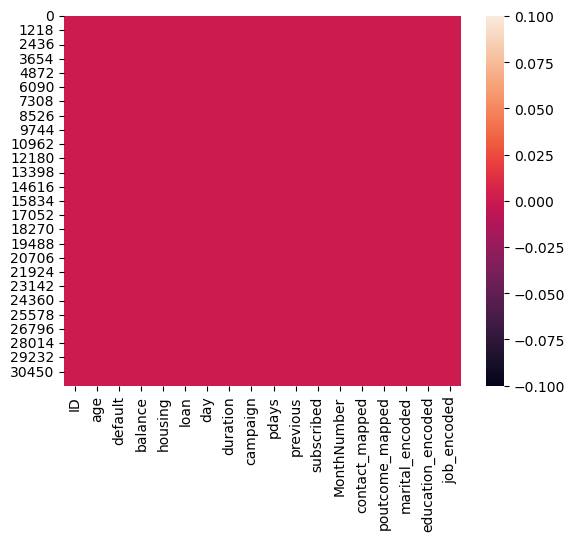

In [42]:
sns.heatmap(subscriber_data.isnull())

Let's check for all the unique values and the number of null-values in our dataframe.

In [43]:
subscriber_data['subscribed'].unique()

array([0, 1], dtype=int64)

In [44]:
subscriber_data['subscribed'].nunique()

2

Now let's check for value counts in all the columns of our dataset.

In [45]:
for i in subscriber_data.columns:
    print(subscriber_data[i].value_counts())
    print("/n")

26110.0    1
13339.0    1
39681.0    1
15135.0    1
26037.0    1
          ..
1247.0     1
15584.0    1
25376.0    1
38699.0    1
14156.0    1
Name: ID, Length: 31647, dtype: int64
/n
32.0    1457
31.0    1417
33.0    1406
34.0    1321
35.0    1314
        ... 
92.0       1
95.0       1
93.0       1
94.0       1
90.0       1
Name: age, Length: 76, dtype: int64
/n
0.0    31062
1.0      585
Name: default, dtype: int64
/n
 0.0        2470
 1.0         137
 2.0         109
 4.0          95
 3.0          88
            ... 
 15120.0       1
-713.0         1
-905.0         1
 4722.0        1
 2968.0        1
Name: balance, Length: 6326, dtype: int64
/n
1.0    17584
0.0    14063
Name: housing, dtype: int64
/n
0.0    26516
1.0     5131
Name: loan, dtype: int64
/n
20.0    1909
18.0    1612
21.0    1445
5.0     1373
6.0     1348
17.0    1344
14.0    1283
8.0     1281
28.0    1276
29.0    1241
7.0     1240
19.0    1228
15.0    1208
12.0    1116
13.0    1099
9.0     1097
30.0    1082
4.0     1016


Below are the findings(highest number of occurences) from the above value counts:
1) 32.0-1457  Age
2) 0.0-31062  Default
3) 0.0-2470   Balance
4) 1.0-17584  Housing
5) 0.0-26516  Loan
6) 20.0-1909  Day
7) 1.0-12262  Campaign
8) 90.0-135   Duration
9) -1.0-25924 pdays
10) 0.0-25924 previous
11) 8.0-9669  Monthnumber
12) 2.0-20423 Contact_mapped
13) 0.0-27217 poutcome_mapped
14) 2.0-19095 marital-encoded
15) 2.0-16224 education_encoded
16) 1.0-6842  job_encoded


Now let's declare a list of all columns that will be the input variables.

In [28]:
subscriber_data_col=[]
for i in subscriber_data.dtypes.index:
    if subscriber_data.dtypes[i] == 'float64':
        subscriber_data_col.append(i)
print("subscribercateogry columns:", subscriber_data_col)
print("/n")

subscribercateogry columns: ['ID', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'MonthNumber', 'contact_mapped', 'poutcome_mapped', 'marital_encoded', 'education_encoded', 'job_encoded']
/n


Now let's declare a list of column that will be our output column.

In [29]:
subscriber_data_output=[]
for i in subscriber_data.dtypes.index:
    if subscriber_data.dtypes[i] == 'int64':
        subscriber_data_output.append(i)
print("subscribercateogry columns:", subscriber_data_output)
print("/n")

subscribercateogry columns: ['subscribed']
/n


Now let's check for the last time if any of our columns have null values

In [48]:
subscriber_data.loc[subscriber_data["subscribed"]==""]

Empty DataFrame
Columns: [ID, age, default, balance, housing, loan, day, duration, campaign, pdays, previous, subscribed, MonthNumber, contact_mapped, poutcome_mapped, marital_encoded, education_encoded, job_encoded]
Index: []

Let's check for mean values of our target column.

In [49]:
print(subscriber_data["subscribed"].mean())

0.11738869403102979


Now let's check for number of unique values in each of the columns in our dataframe.

In [50]:
subscriber_data.nunique().to_frame("No. of Unique values")

No. of Unique values
ID                                31647
age                                  76
default                               2
balance                            6326
housing                               2
loan                                  2
day                                  31
duration                           1454
campaign                             45
pdays                               509
previous                             38
subscribed                            2
MonthNumber                          12
contact_mapped                        3
poutcome_mapped                       3
marital_encoded                       3
education_encoded                     4
job_encoded                          12

Let's check if there are any duplicated columns in our dataframe.

In [51]:
print("Total duplicated rows:", subscriber_data.duplicated().sum())

Total duplicated rows: 0


In [ ]:
Since there are no duplicated columns in our dataframe, we can move on with our visualisation purpose.

In [ ]:
Univariate analysis

In [ ]:
Countplots

Below are the findings(highest number of occurences) from the below count plots:
1) 32.0-1457  Age
2) 0.0-31062  Default
3) 0.0-2470   Balance
4) 1.0-17584  Housing
5) 0.0-26516  Loan
6) 20.0-1909  Day
7) 1.0-12262  Campaign
8) 90.0-135   Duration
9) -1.0-25924 pdays
10) 0.0-25924 previous
11) 8.0-9669  Monthnumber
12) 2.0-20423 Contact_mapped
13) 0.0-27217 poutcome_mapped
14) 2.0-19095 marital-encoded
15) 2.0-16224 education_encoded
16) 1.0-6842  job_encoded

0    27932
1     3715
Name: subscribed, dtype: int64


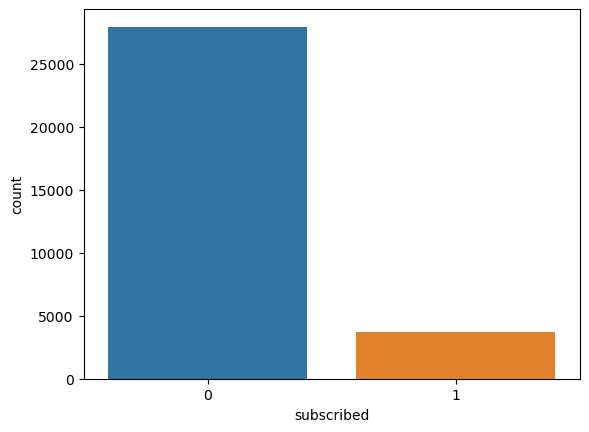

In [53]:
sc=sns.countplot(x='subscribed',data=subscriber_data)
print(subscriber_data['subscribed'].value_counts())

32.0    1457
31.0    1417
33.0    1406
34.0    1321
35.0    1314
        ... 
92.0       1
95.0       1
93.0       1
94.0       1
90.0       1
Name: age, Length: 76, dtype: int64


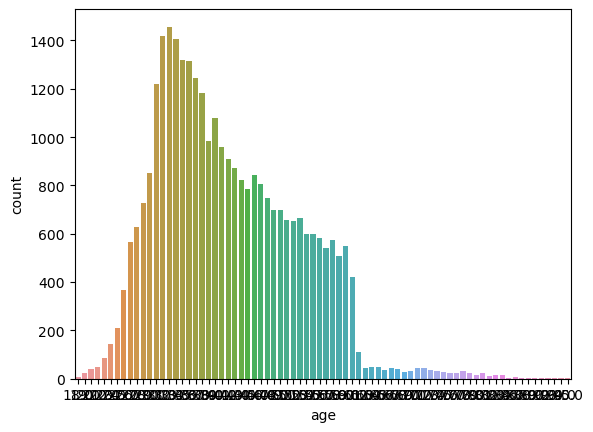

In [56]:
sc1=sns.countplot(x='age',data=subscriber_data)
print(subscriber_data['age'].value_counts())

0.0    31062
1.0      585
Name: default, dtype: int64


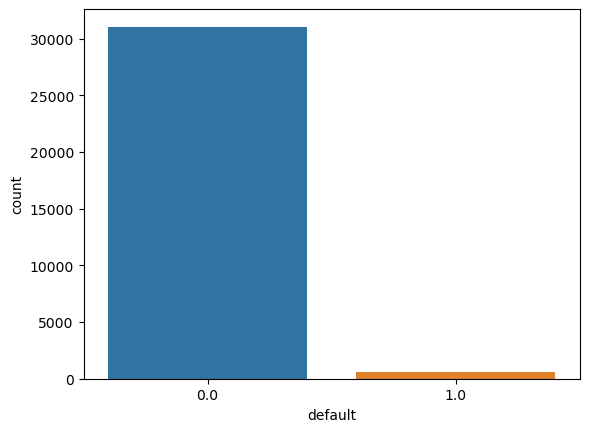

In [57]:
sc1=sns.countplot(x='default',data=subscriber_data)
print(subscriber_data['default'].value_counts())

 0.0        2470
 1.0         137
 2.0         109
 4.0          95
 3.0          88
            ... 
 15120.0       1
-713.0         1
-905.0         1
 4722.0        1
 2968.0        1
Name: balance, Length: 6326, dtype: int64


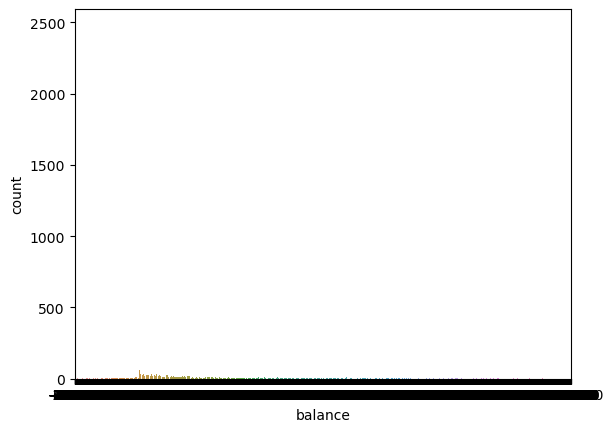

In [58]:
sc1=sns.countplot(x='balance',data=subscriber_data)
print(subscriber_data['balance'].value_counts())

1.0    17584
0.0    14063
Name: housing, dtype: int64


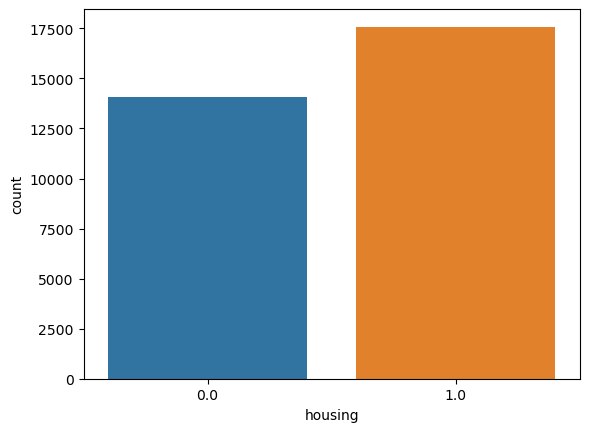

In [59]:
sc1=sns.countplot(x='housing',data=subscriber_data)
print(subscriber_data['housing'].value_counts())

0.0    26516
1.0     5131
Name: loan, dtype: int64


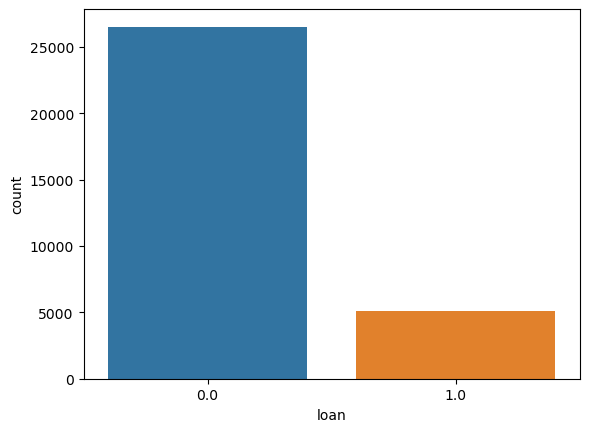

In [60]:
sc1=sns.countplot(x='loan',data=subscriber_data)
print(subscriber_data['loan'].value_counts())

20.0    1909
18.0    1612
21.0    1445
5.0     1373
6.0     1348
17.0    1344
14.0    1283
8.0     1281
28.0    1276
29.0    1241
7.0     1240
19.0    1228
15.0    1208
12.0    1116
13.0    1099
9.0     1097
30.0    1082
4.0     1016
11.0    1014
16.0     981
2.0      900
27.0     804
3.0      761
26.0     761
23.0     657
22.0     640
25.0     586
31.0     460
10.0     360
24.0     305
1.0      220
Name: day, dtype: int64


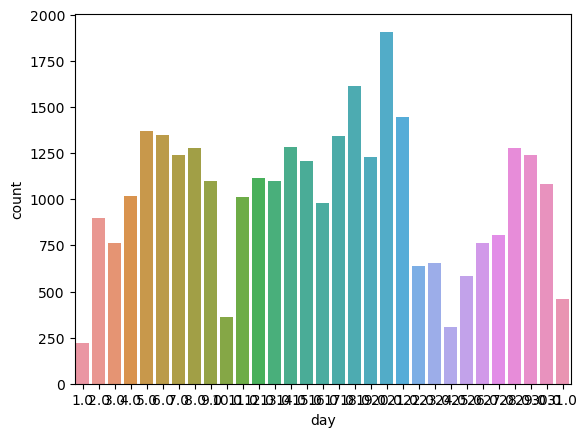

In [61]:
sc1=sns.countplot(x='day',data=subscriber_data)
print(subscriber_data['day'].value_counts())

90.0      135
124.0     130
139.0     127
88.0      127
104.0     127
         ... 
1405.0      1
1090.0      1
1261.0      1
1218.0      1
1973.0      1
Name: duration, Length: 1454, dtype: int64


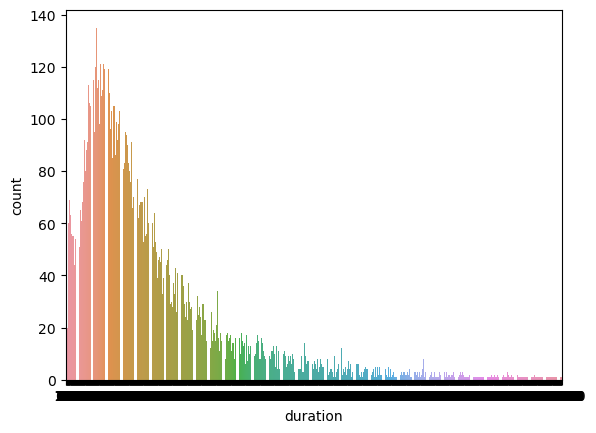

In [62]:
sc1=sns.countplot(x='duration',data=subscriber_data)
print(subscriber_data['duration'].value_counts())

1.0     12262
2.0      8798
3.0      3858
4.0      2442
5.0      1245
6.0       916
7.0       518
8.0       356
9.0       236
10.0      184
11.0      126
12.0      102
13.0       93
14.0       68
15.0       61
16.0       54
17.0       52
20.0       37
18.0       37
19.0       30
21.0       19
22.0       18
25.0       17
28.0       14
23.0       13
24.0       13
29.0       12
26.0        9
31.0        9
27.0        8
30.0        6
32.0        6
33.0        5
34.0        5
43.0        3
35.0        3
38.0        3
37.0        2
63.0        1
41.0        1
50.0        1
55.0        1
44.0        1
36.0        1
39.0        1
Name: campaign, dtype: int64


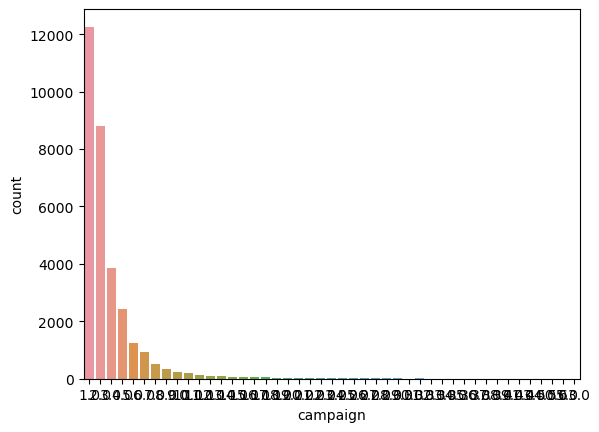

In [63]:
sc1=sns.countplot(x='campaign',data=subscriber_data)
print(subscriber_data['campaign'].value_counts())

-1.0      25924
 182.0      118
 92.0       100
 91.0        87
 183.0       85
          ...  
 51.0         1
 20.0         1
 25.0         1
 526.0        1
 382.0        1
Name: pdays, Length: 509, dtype: int64


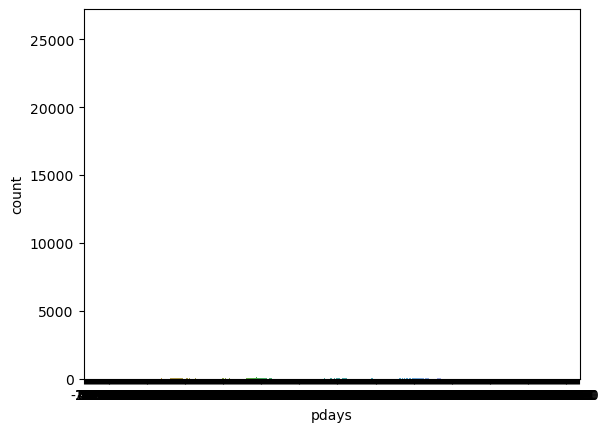

In [64]:
sc1=sns.countplot(x='pdays',data=subscriber_data)
print(subscriber_data['pdays'].value_counts())

0.0      25924
1.0       1921
2.0       1481
3.0        780
4.0        501
5.0        311
6.0        188
7.0        138
8.0         81
9.0         64
10.0        49
11.0        46
13.0        30
12.0        30
15.0        15
14.0        14
17.0        11
16.0         8
19.0         8
23.0         6
18.0         5
20.0         5
21.0         4
22.0         4
25.0         4
27.0         4
26.0         2
29.0         2
24.0         2
275.0        1
28.0         1
32.0         1
30.0         1
38.0         1
58.0         1
35.0         1
41.0         1
37.0         1
Name: previous, dtype: int64


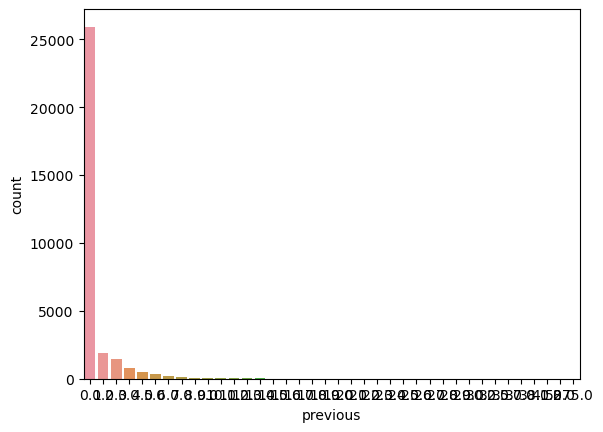

In [65]:
sc1=sns.countplot(x='previous',data=subscriber_data)
print(subscriber_data['previous'].value_counts())

8.0     9669
5.0     4844
1.0     4333
6.0     3738
9.0     2783
0.0     2055
3.0     1827
4.0      977
10.0     512
11.0     410
7.0      342
2.0      157
Name: MonthNumber, dtype: int64


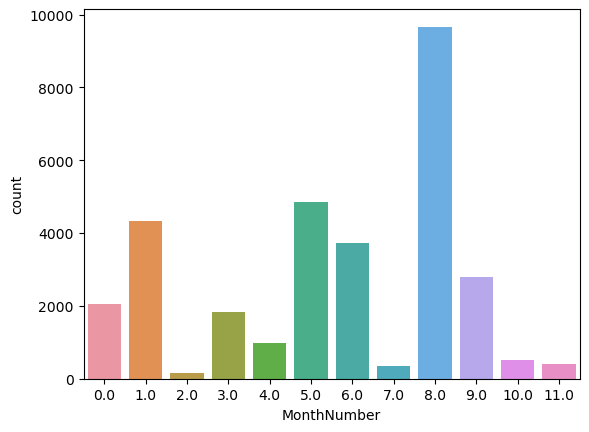

In [66]:
sc1=sns.countplot(x='MonthNumber',data=subscriber_data)
print(subscriber_data['MonthNumber'].value_counts())

2.0    20423
0.0     9177
1.0     2047
Name: contact_mapped, dtype: int64


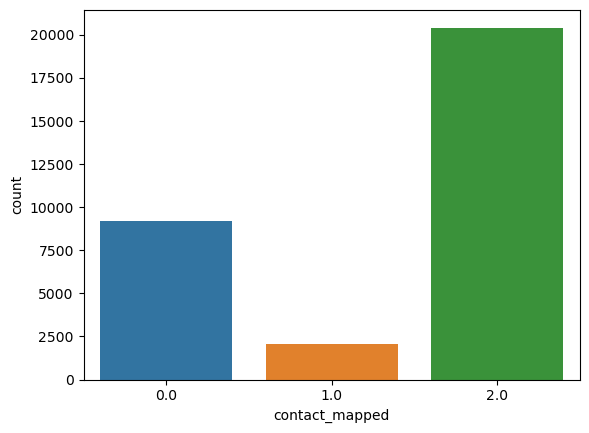

In [67]:
sc1=sns.countplot(x='contact_mapped',data=subscriber_data)
print(subscriber_data['contact_mapped'].value_counts())

0.0    27217
1.0     3362
2.0     1068
Name: poutcome_mapped, dtype: int64


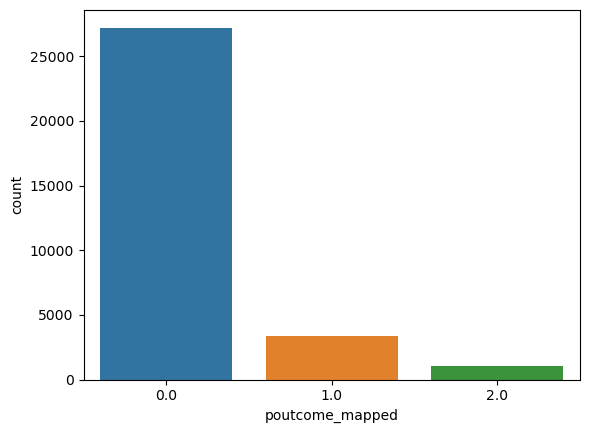

In [68]:
sc1=sns.countplot(x='poutcome_mapped',data=subscriber_data)
print(subscriber_data['poutcome_mapped'].value_counts())

2.0    19095
1.0     8922
0.0     3630
Name: marital_encoded, dtype: int64


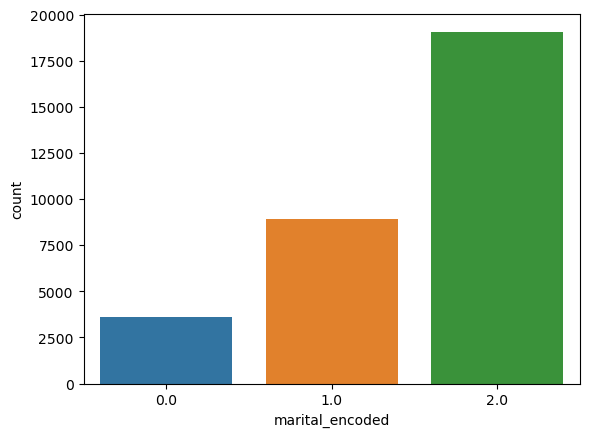

In [69]:
sc1=sns.countplot(x='marital_encoded',data=subscriber_data)
print(subscriber_data['marital_encoded'].value_counts())

1.0     6842
4.0     6639
9.0     5307
0.0     3631
7.0     2903
5.0     1574
6.0     1123
2.0     1008
10.0     905
3.0      874
8.0      635
11.0     206
Name: job_encoded, dtype: int64


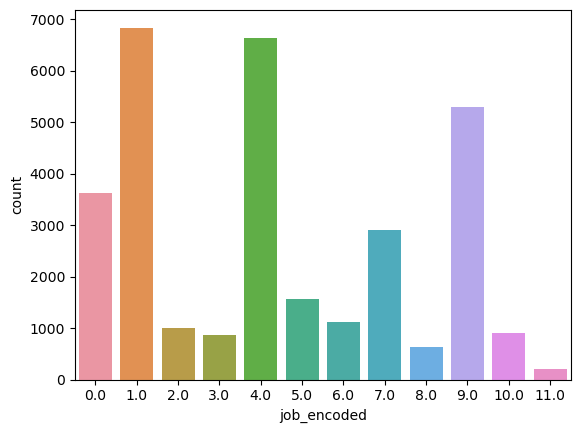

In [70]:
sc1=sns.countplot(x='job_encoded',data=subscriber_data)
print(subscriber_data['job_encoded'].value_counts())

2.0    16224
3.0     9301
1.0     4808
0.0     1314
Name: education_encoded, dtype: int64


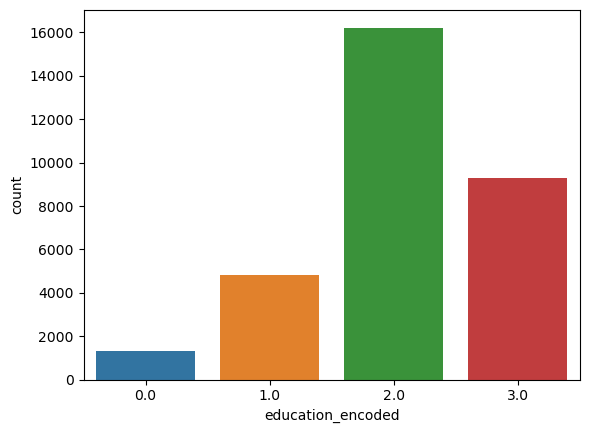

In [71]:
sc1=sns.countplot(x='education_encoded',data=subscriber_data)
print(subscriber_data['education_encoded'].value_counts())

Distribution plots

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_5880\3600309700.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subscriber_data[col],color="b")
C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_5880\3600309700.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subscriber_data[col],color

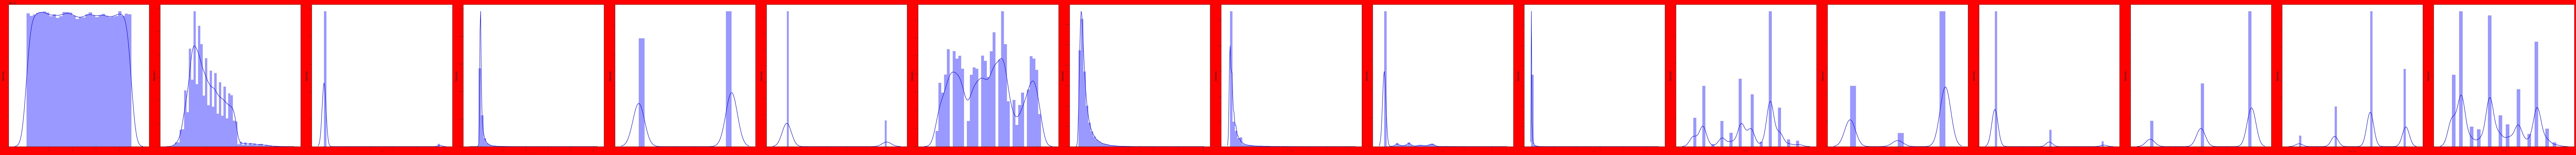

In [73]:
plt.figure(figsize=(145,145),facecolor = "red")
plotnumber=1
for col in subscriber_data_col:
    if plotnumber<=19:
        wc=plt.subplot(18,18,plotnumber)
        sns.distplot(subscriber_data[col],color="b")
        plt.xlabel(col,rotation=0,fontsize = 3)
        plt.xticks(rotation=90, fontsize=3)
        plt.yticks(rotation = 0, fontsize = 3)
    plotnumber+=1
plt.tight_layout()

Although all the columns are skewed, nut while most of them are skewed to left, ID column have normal distribution, housing,poutcome_mapped and education_encoded is skewed to the right. 

In [ ]:
Bivariate analysis

In [ ]:
Strip PLots

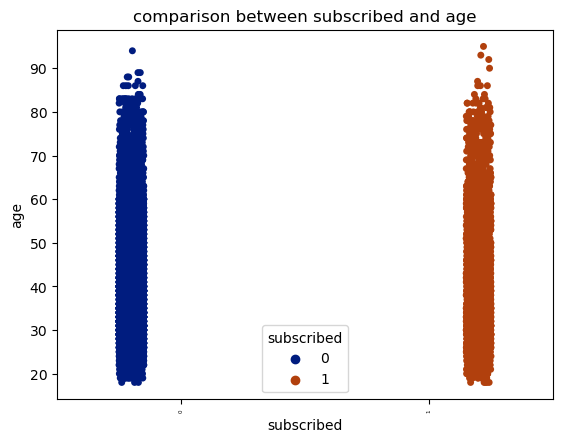

<Figure size 2800x200 with 0 Axes>

In [75]:
plt.title("comparison between subscribed and age")
sns.stripplot(x= "subscribed", y= "age", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

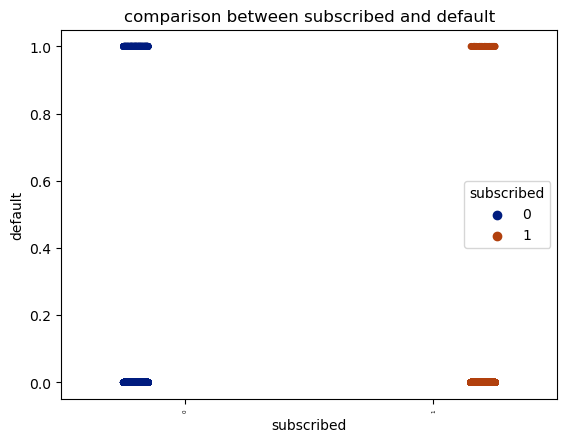

<Figure size 2800x200 with 0 Axes>

In [80]:
plt.title("comparison between subscribed and default")
sns.stripplot(x= "subscribed", y= "default", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

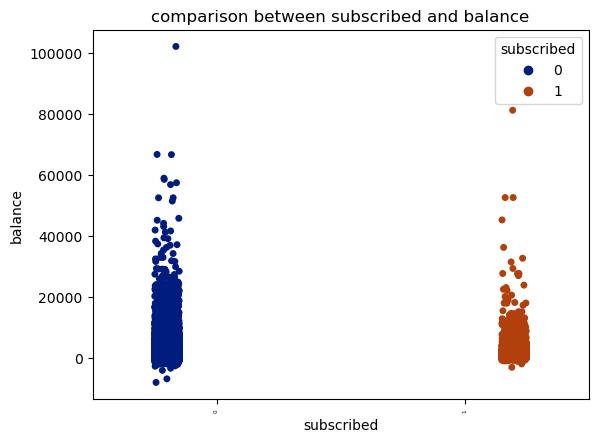

<Figure size 2800x200 with 0 Axes>

In [79]:
plt.title("comparison between subscribed and balance")
sns.stripplot(x= "subscribed", y= "balance", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

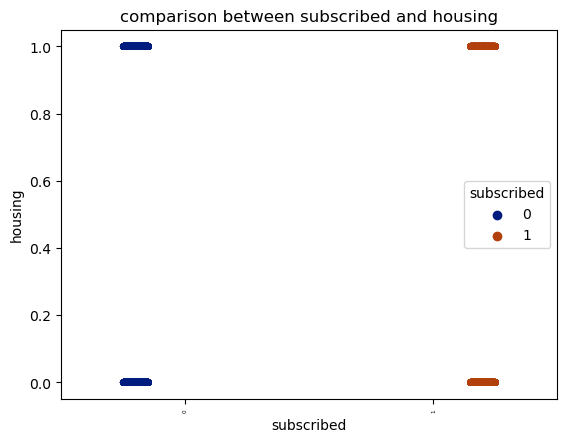

<Figure size 2800x200 with 0 Axes>

In [81]:
plt.title("comparison between subscribed and housing")
sns.stripplot(x= "subscribed", y= "housing", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

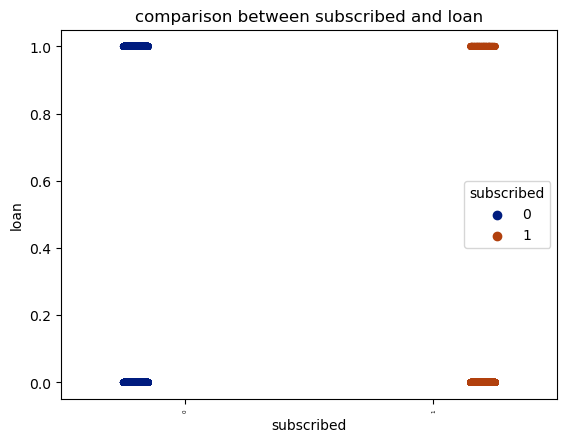

<Figure size 2800x200 with 0 Axes>

In [82]:
plt.title("comparison between subscribed and loan")
sns.stripplot(x= "subscribed", y= "loan", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

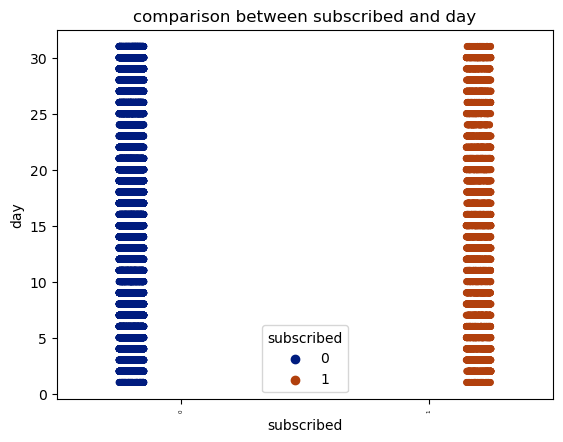

<Figure size 2800x200 with 0 Axes>

In [83]:
plt.title("comparison between subscribed and day")
sns.stripplot(x= "subscribed", y= "day", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

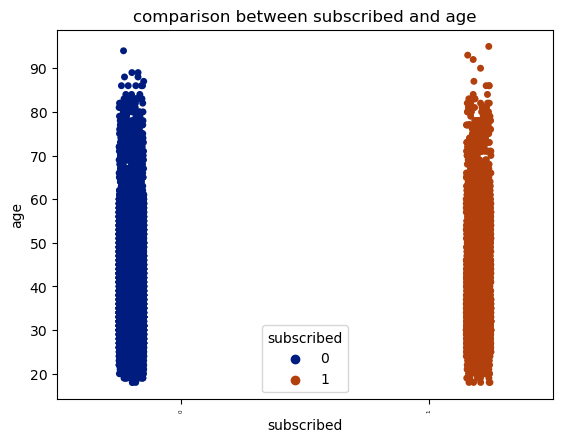

<Figure size 2800x200 with 0 Axes>

In [84]:
plt.title("comparison between subscribed and age")
sns.stripplot(x= "subscribed", y= "age", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

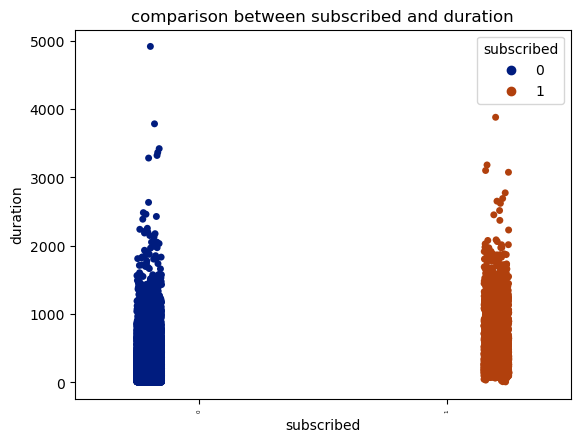

<Figure size 2800x200 with 0 Axes>

In [85]:
plt.title("comparison between subscribed and duration")
sns.stripplot(x= "subscribed", y= "duration", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

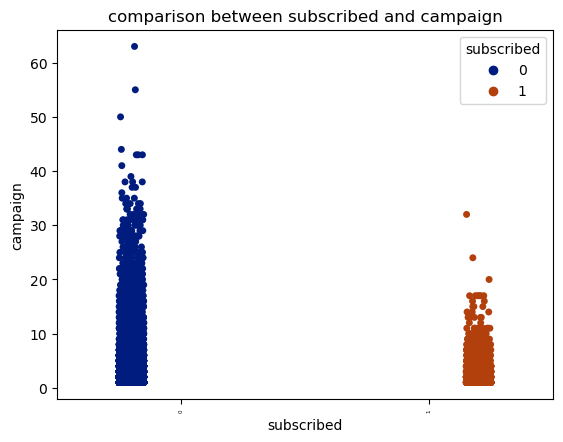

<Figure size 2800x200 with 0 Axes>

In [86]:
plt.title("comparison between subscribed and campaign")
sns.stripplot(x= "subscribed", y= "campaign", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the previous marketing campaigns were failures.

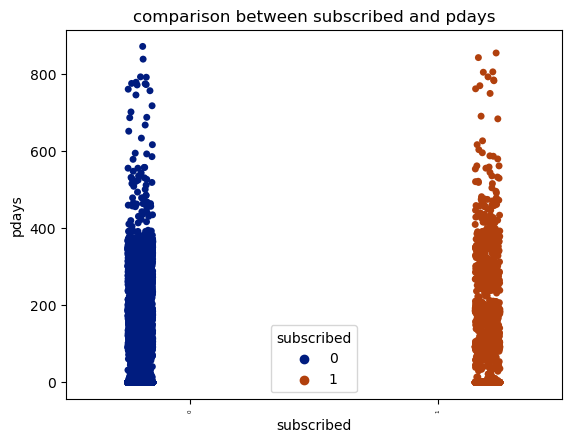

<Figure size 2800x200 with 0 Axes>

In [87]:
plt.title("comparison between subscribed and pdays")
sns.stripplot(x= "subscribed", y= "pdays", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

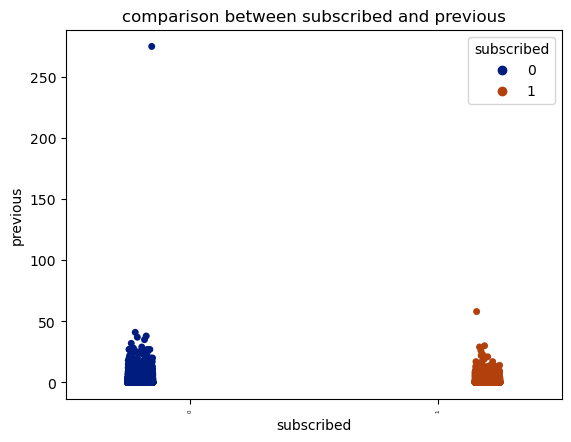

<Figure size 2800x200 with 0 Axes>

In [88]:
plt.title("comparison between subscribed and previous")
sns.stripplot(x= "subscribed", y= "previous", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

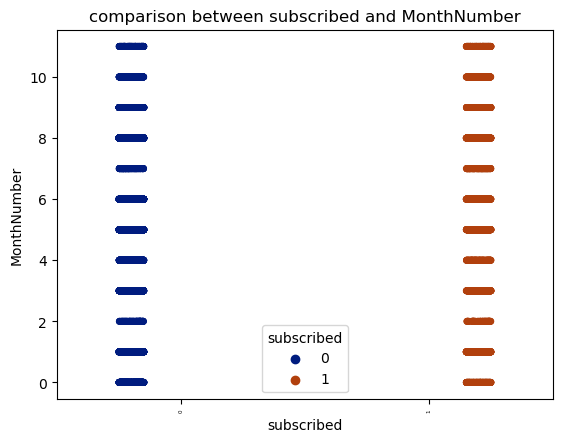

<Figure size 2800x200 with 0 Axes>

In [89]:
plt.title("comparison between subscribed and MonthNumber")
sns.stripplot(x= "subscribed", y= "MonthNumber", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

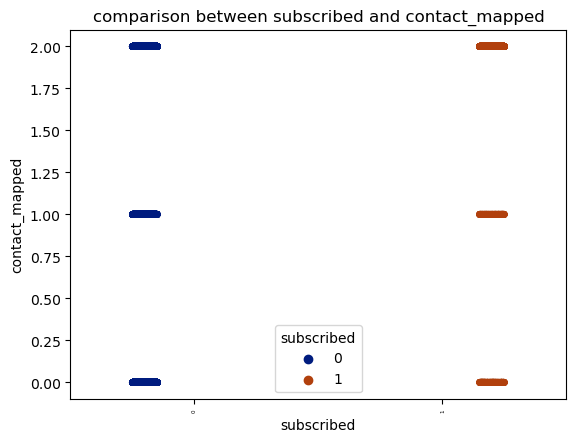

<Figure size 2800x200 with 0 Axes>

In [90]:
plt.title("comparison between subscribed and contact_mapped")
sns.stripplot(x= "subscribed", y= "contact_mapped", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

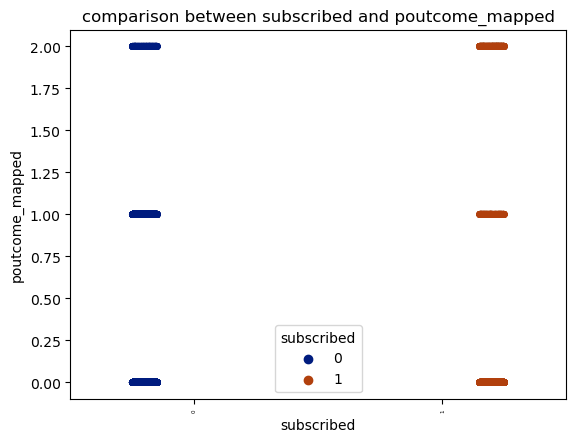

<Figure size 2800x200 with 0 Axes>

In [91]:
plt.title("comparison between subscribed and poutcome_mapped")
sns.stripplot(x= "subscribed", y= "poutcome_mapped", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

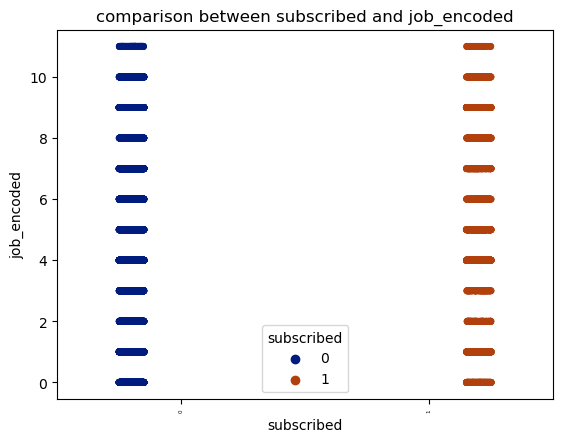

<Figure size 2800x200 with 0 Axes>

In [95]:
plt.title("comparison between subscribed and job_encoded")
sns.stripplot(x= "subscribed", y= "job_encoded", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

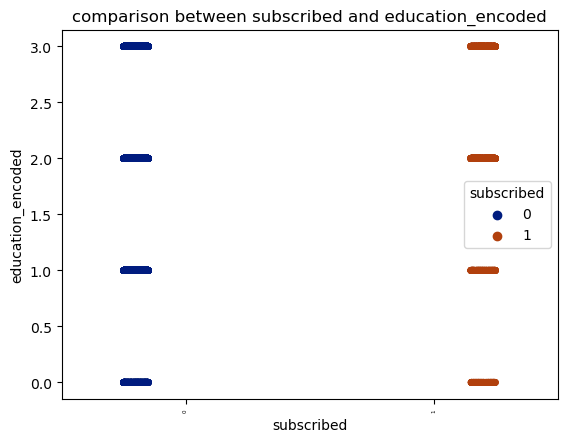

<Figure size 2800x200 with 0 Axes>

In [96]:
plt.title("comparison between subscribed and education_encoded")
sns.stripplot(x= "subscribed", y= "education_encoded", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

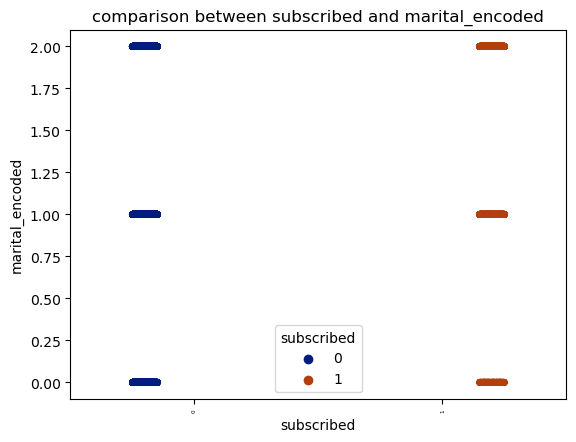

<Figure size 2800x200 with 0 Axes>

In [97]:
plt.title("comparison between subscribed and marital_encoded")
sns.stripplot(x= "subscribed", y= "marital_encoded", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Other than the campaign, almost all other strip plots doesn't provide anything specific or important information.

Barplots

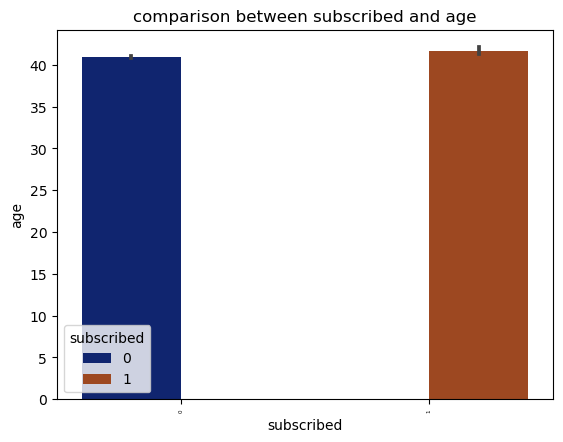

<Figure size 2800x200 with 0 Axes>

In [100]:
plt.title("comparison between subscribed and age")
sns.barplot(x= "subscribed", y= "age", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Both of the subscribers and non-subscribers are from 39-40 age group.

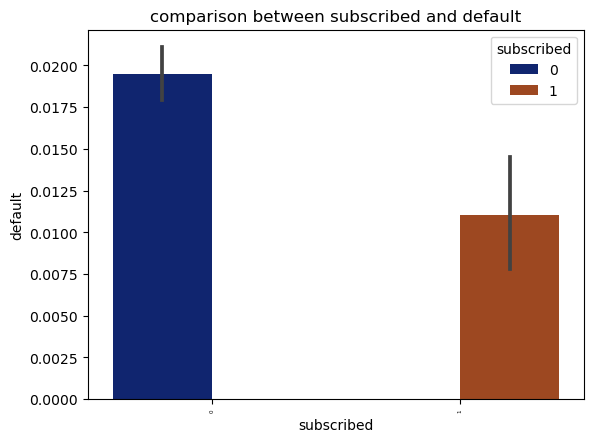

<Figure size 2800x200 with 0 Axes>

In [101]:
plt.title("comparison between subscribed and default")
sns.barplot(x= "subscribed", y= "default", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

More number of non-subscribers have defaulted more than 0.0175 and subscribers have defaults more than 0.0100.

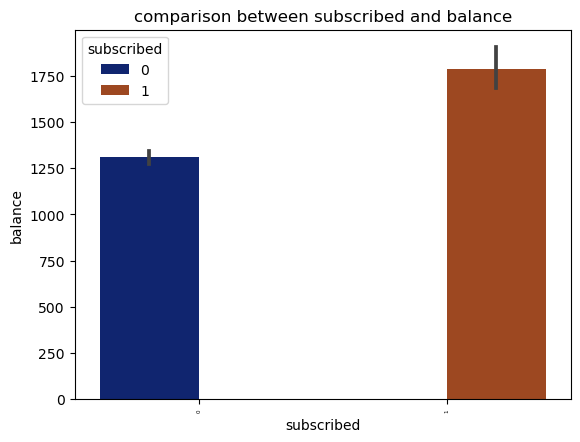

<Figure size 2800x200 with 0 Axes>

In [102]:
plt.title("comparison between subscribed and balance")
sns.barplot(x= "subscribed", y= "balance", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the subscribers have more balance than non-subscribers.

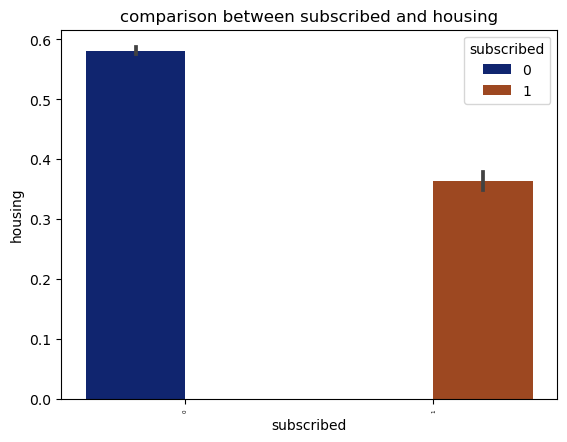

<Figure size 2800x200 with 0 Axes>

In [103]:
plt.title("comparison between subscribed and housing")
sns.barplot(x= "subscribed", y= "housing", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the non-subscribers have more number of housing loans than the subscribers.

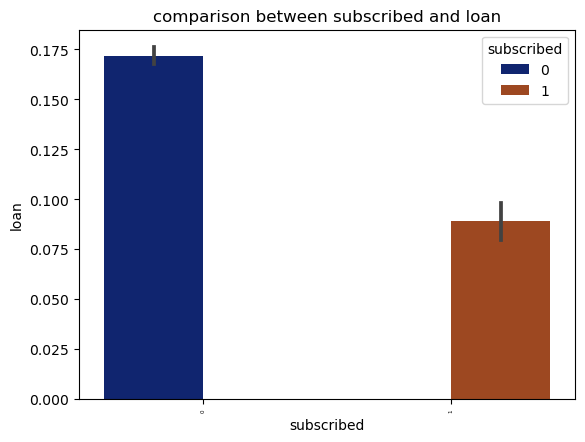

<Figure size 2800x200 with 0 Axes>

In [104]:
plt.title("comparison between subscribed and loan")
sns.barplot(x= "subscribed", y= "loan", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

More number of non-subscribers have personal loans than the subscribers.

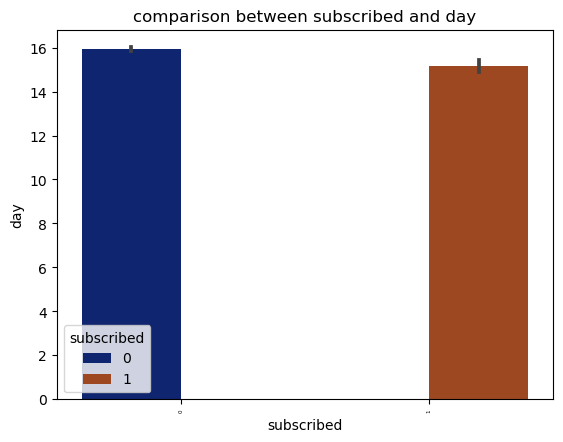

<Figure size 2800x200 with 0 Axes>

In [105]:
plt.title("comparison between subscribed and day")
sns.barplot(x= "subscribed", y= "day", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the non-subscribers were active at the later part of the month than the subscribers.

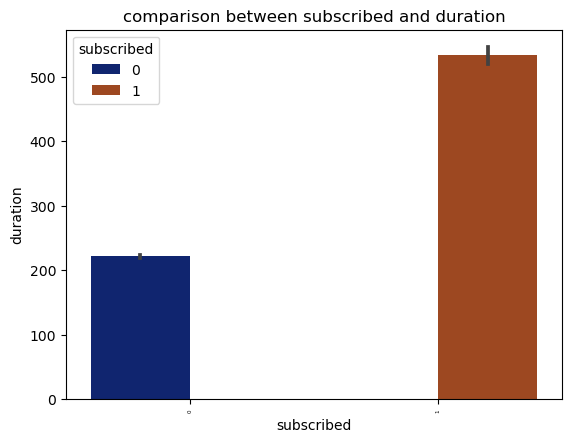

<Figure size 2800x200 with 0 Axes>

In [106]:
plt.title("comparison between subscribed and duration")
sns.barplot(x= "subscribed", y= "duration", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Subscribers had higher amount of contract duration than non-subscribers.

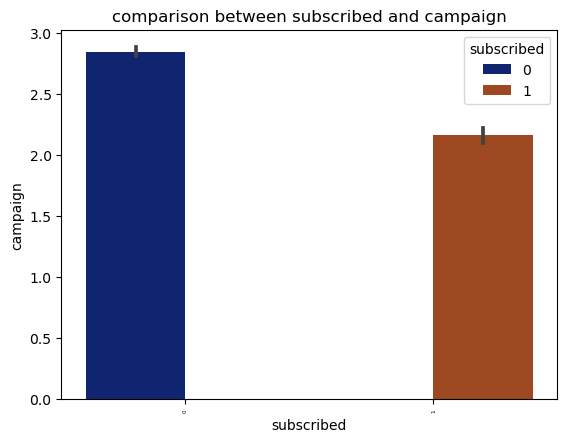

<Figure size 2800x200 with 0 Axes>

In [107]:
plt.title("comparison between subscribed and campaign")
sns.barplot(x= "subscribed", y= "campaign", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

most of contacts made gave non-subscribers than subscribers during the previous campaigns.

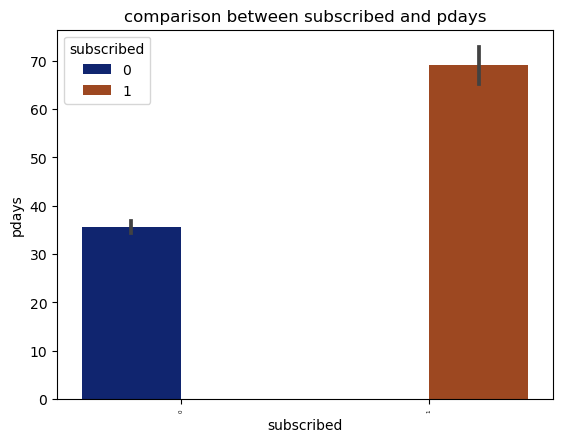

<Figure size 2800x200 with 0 Axes>

In [108]:
plt.title("comparison between subscribed and pdays")
sns.barplot(x= "subscribed", y= "pdays", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

non-subscribers had lesser number of days that passed by after the client was last contacted than subscribers.

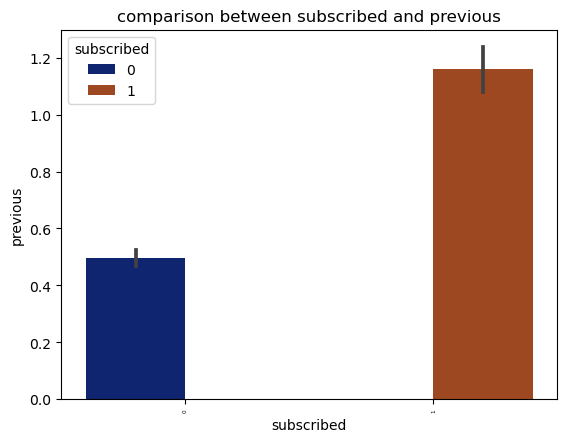

<Figure size 2800x200 with 0 Axes>

In [109]:
plt.title("comparison between subscribed and previous")
sns.barplot(x= "subscribed", y= "previous", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()


subscribers had larger number of contacts performed before this campaign than non-subscribers.

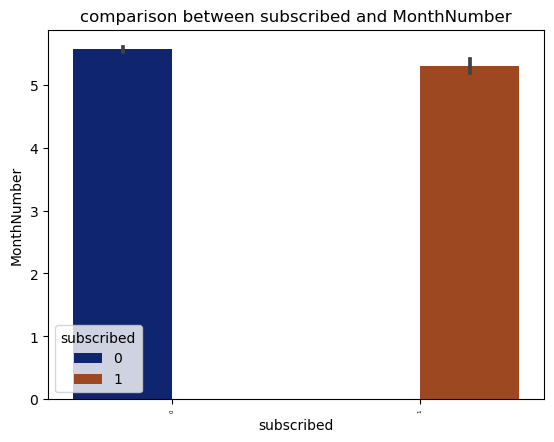

<Figure size 2800x200 with 0 Axes>

In [110]:
plt.title("comparison between subscribed and MonthNumber")
sns.barplot(x= "subscribed", y= "MonthNumber", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Non-subscribers were contacted more in a month than the subscribers.

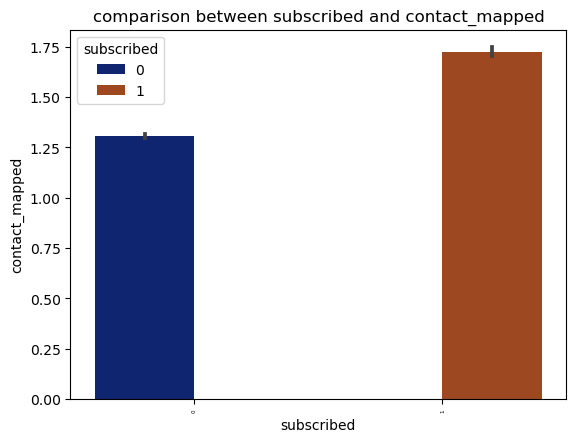

<Figure size 2800x200 with 0 Axes>

In [111]:
plt.title("comparison between subscribed and contact_mapped")
sns.barplot(x= "subscribed", y= "contact_mapped", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

the ways that subscribers were contacted were more than the non-subscribers.

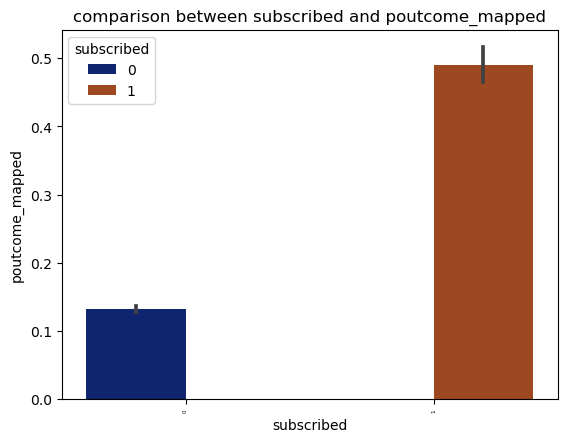

<Figure size 2800x200 with 0 Axes>

In [112]:
plt.title("comparison between subscribed and poutcome_mapped")
sns.barplot(x= "subscribed", y= "poutcome_mapped", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

outcome of the previous marketing campaign gave more subscribers than the subscribers.

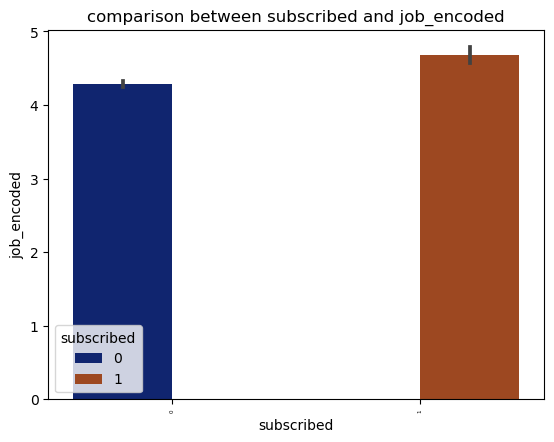

<Figure size 2800x200 with 0 Axes>

In [113]:
plt.title("comparison between subscribed and job_encoded")
sns.barplot(x= "subscribed", y= "job_encoded", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

subscribers came more variations of jobs than the non-subscribers.

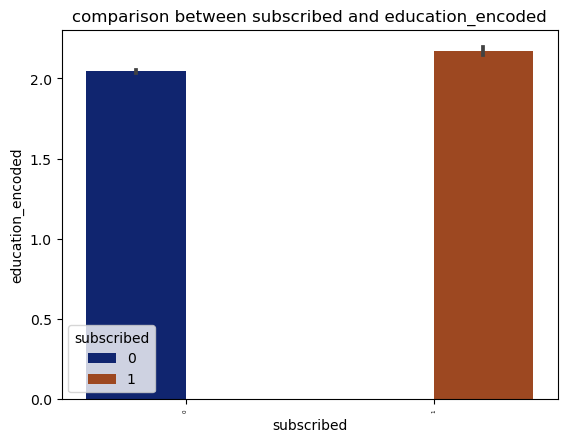

<Figure size 2800x200 with 0 Axes>

In [114]:
plt.title("comparison between subscribed and education_encoded")
sns.barplot(x= "subscribed", y= "education_encoded", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

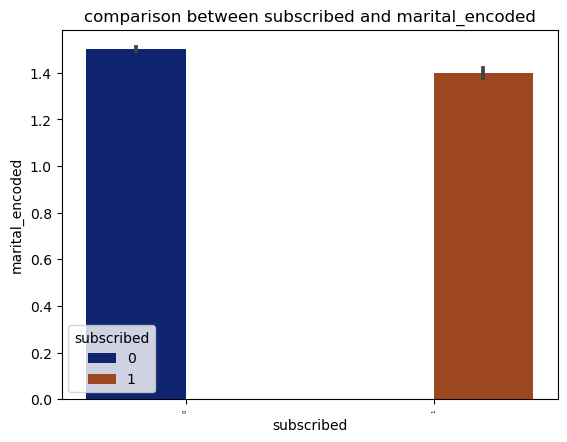

<Figure size 2800x200 with 0 Axes>

In [115]:
plt.title("comparison between subscribed and marital_encoded")
sns.barplot(x= "subscribed", y= "marital_encoded", data = subscriber_data,hue='subscribed', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

the above two plots doesn't convey much information.

Catplots

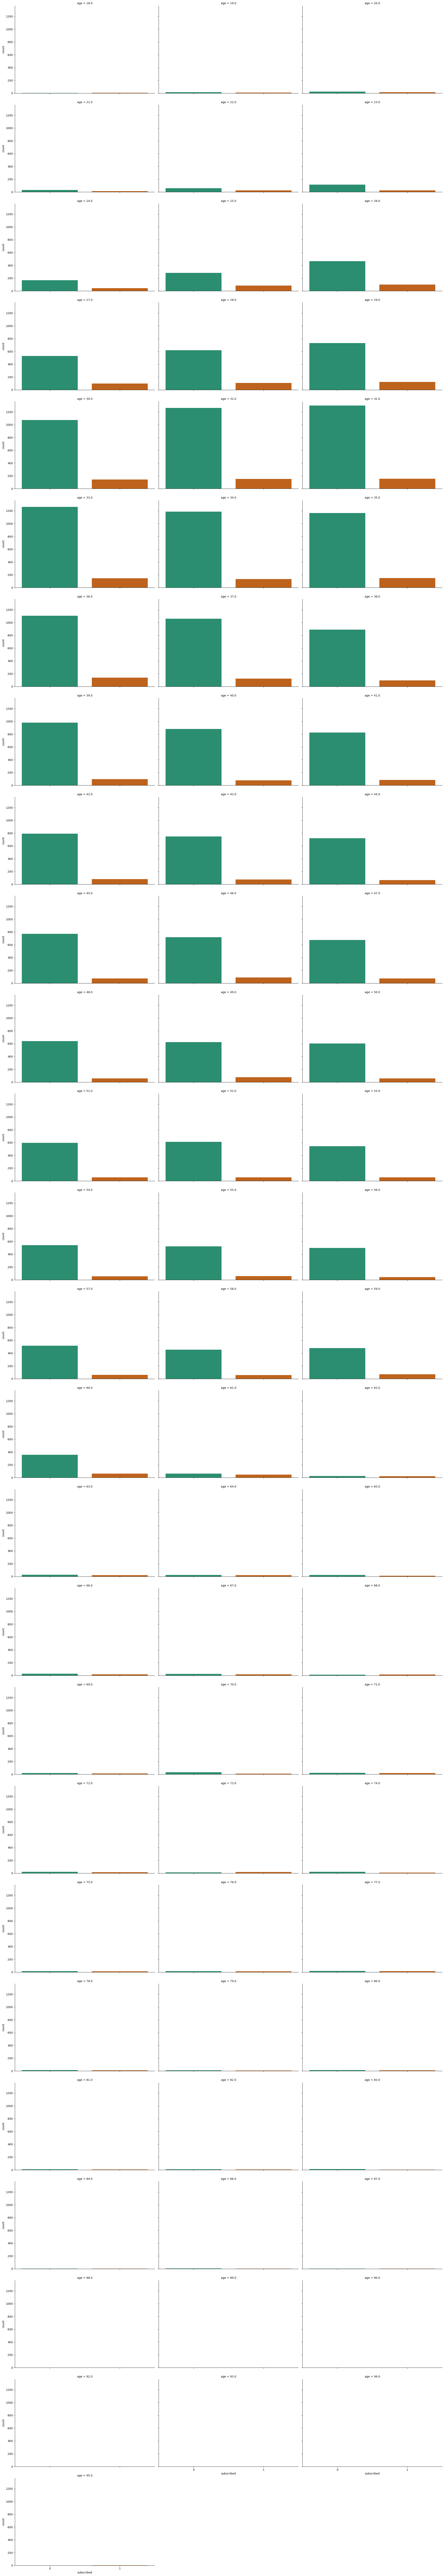

In [116]:
sns.catplot(x= 'subscribed', col= 'age', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the non-subscribers were from the age group 34-40. Most of the subscribers also come from the same range.

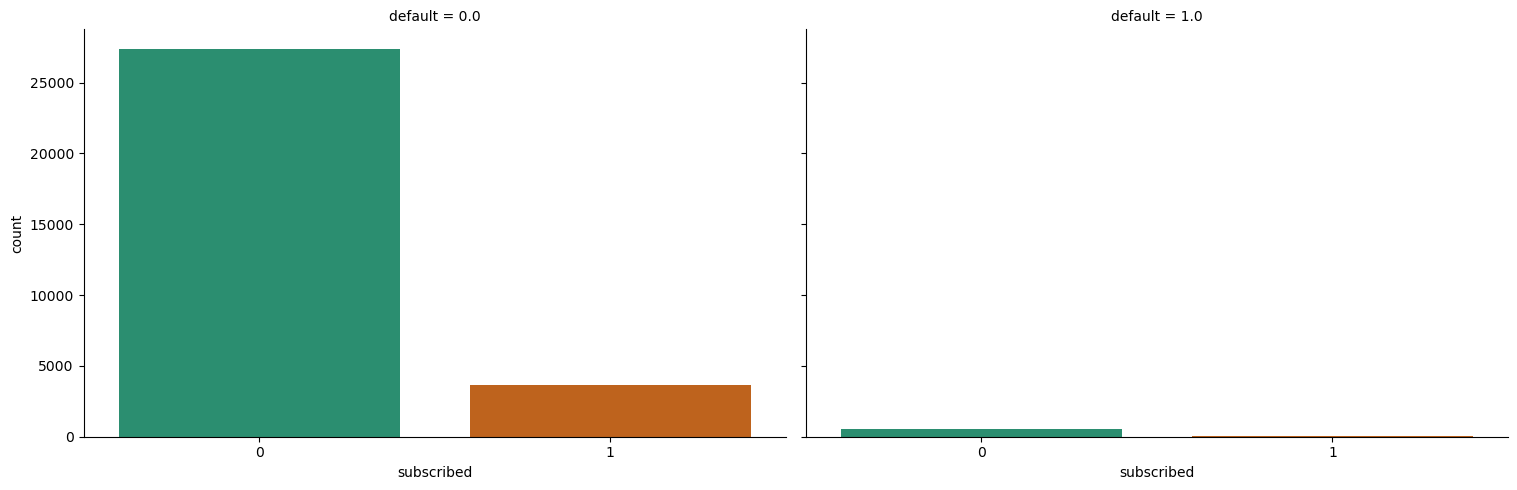

In [117]:
sns.catplot(x= 'subscribed', col= 'default', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

More number of non-subscribers were non-defaulters and defaulters when compared to subscribers.

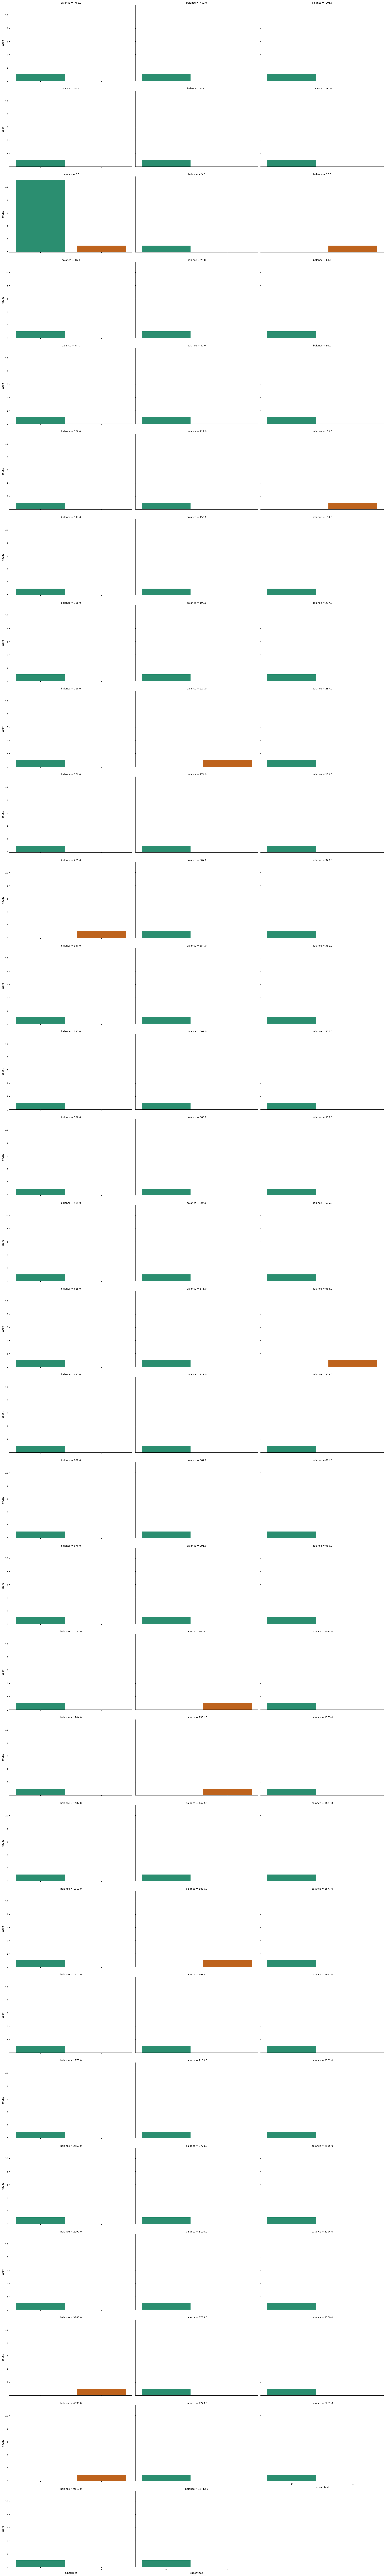

In [25]:
subscriber_data_first_100 = subscriber_data.head(100)
sns.catplot(x= 'subscribed', col= 'balance', data = subscriber_data_first_100, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the non-subscribers had a balance of 16.000 and subscribers had a balance ranging from 10 to 2000.

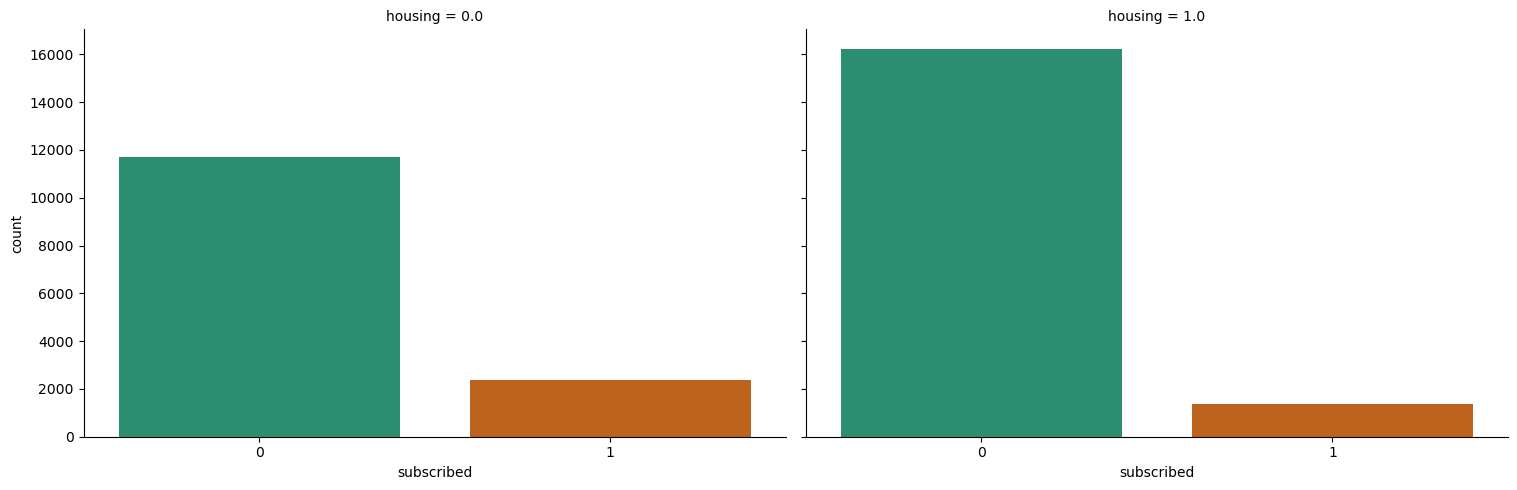

In [121]:
sns.catplot(x= 'subscribed', col= 'housing', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the non-subscribers had housing loans and less number of non-subscribers didn't have housing loans when compared to subscribers.

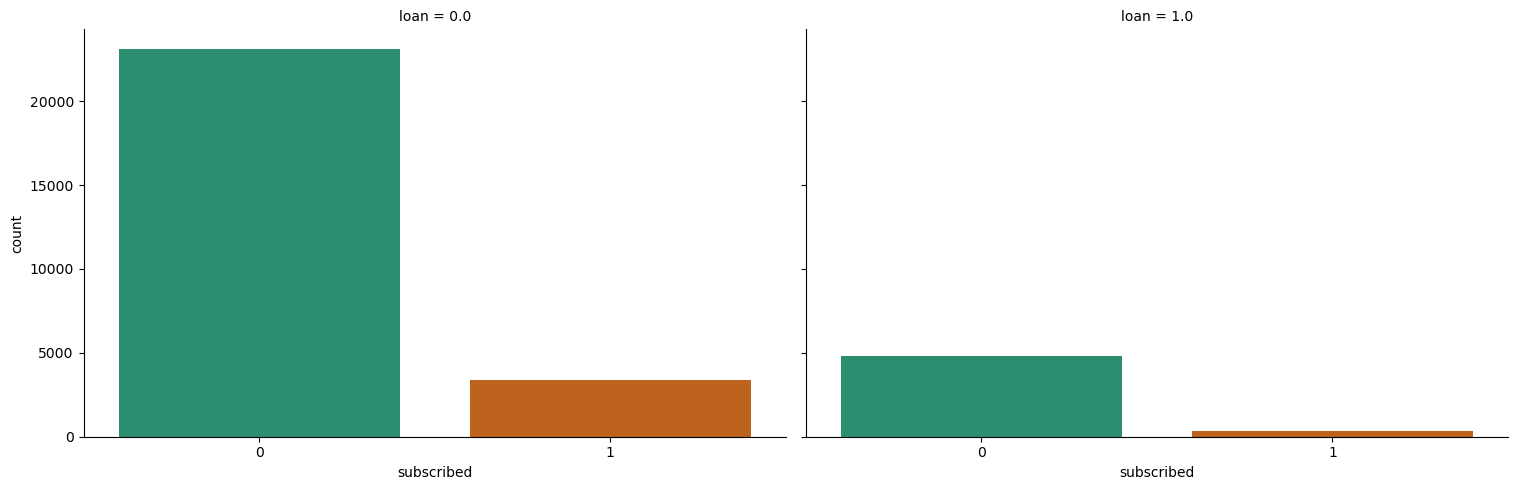

In [122]:
sns.catplot(x= 'subscribed', col= 'loan', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the non-subscribers didn't have personal loans but had personal loans when compared to subscribers.

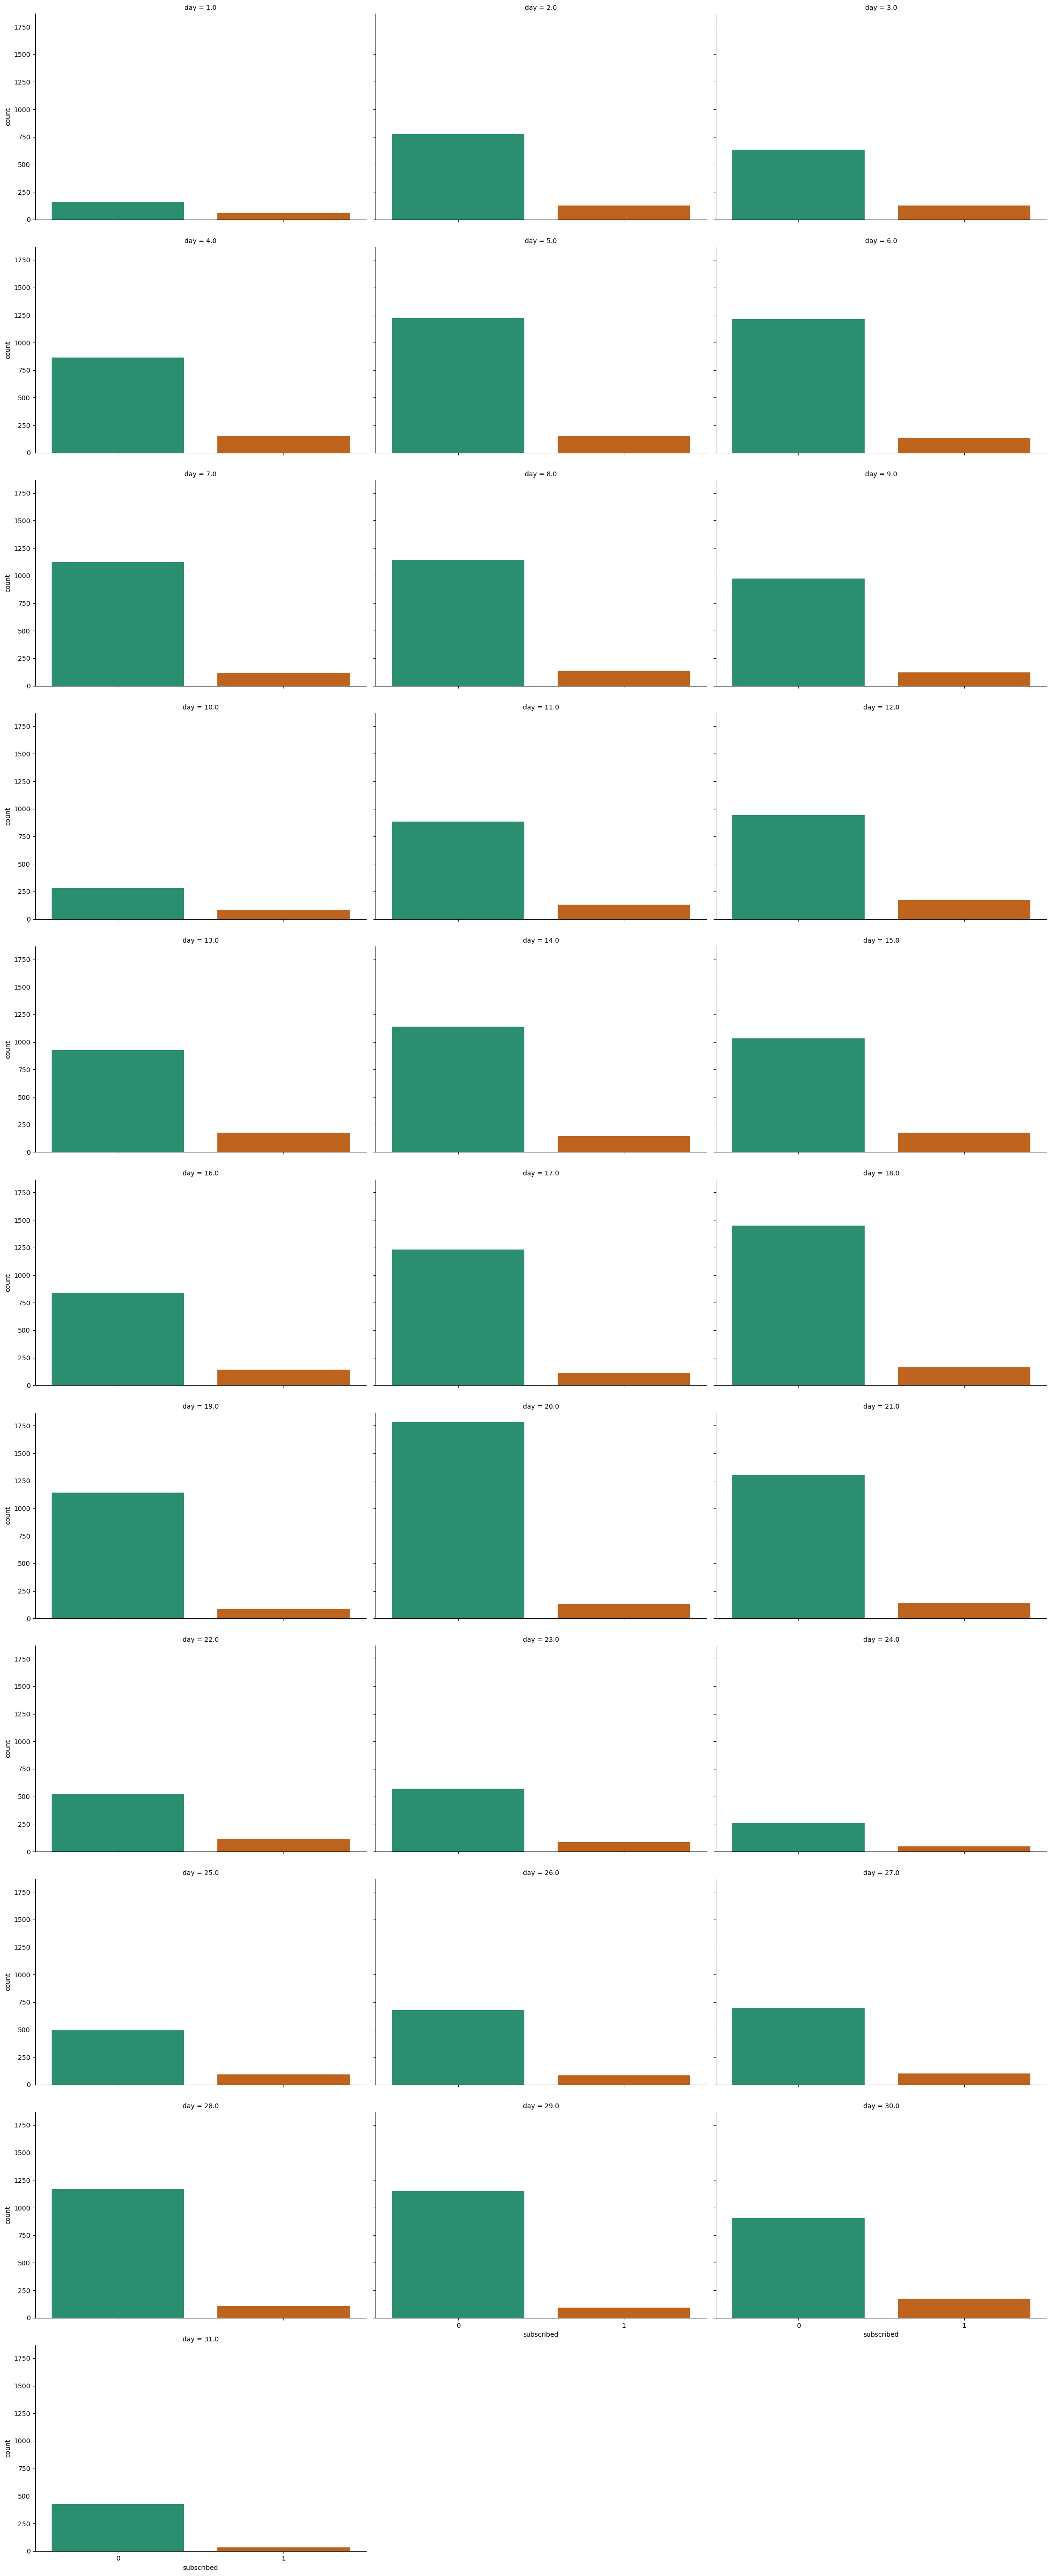

In [123]:
sns.catplot(x= 'subscribed', col= 'day', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the non-subscribers were contacted on day 20-23 and subscribers were contacted at 27=31.

Since it was impossible for catplots to render all the plots, we will be using a small chunk of our original dataframe to plot the catplots between subscribed and duration.

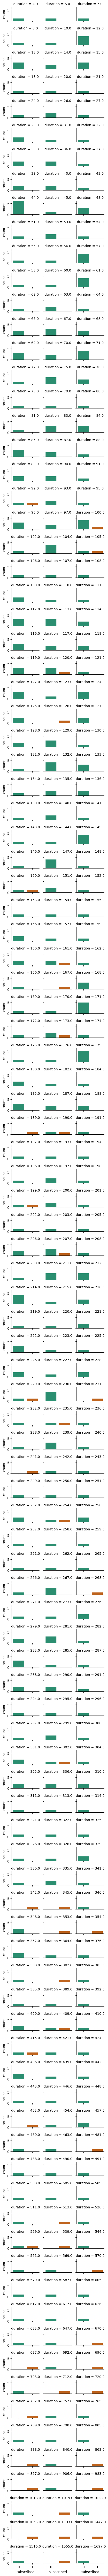

In [22]:
sns.catplot(x= 'subscribed', col= 'duration', data = subscriber_data_first_500, kind="count", palette='Dark2',height=1, aspect=1.5, col_wrap=3)

We can see that non-subscriber had longer contract duration than the subscribers.

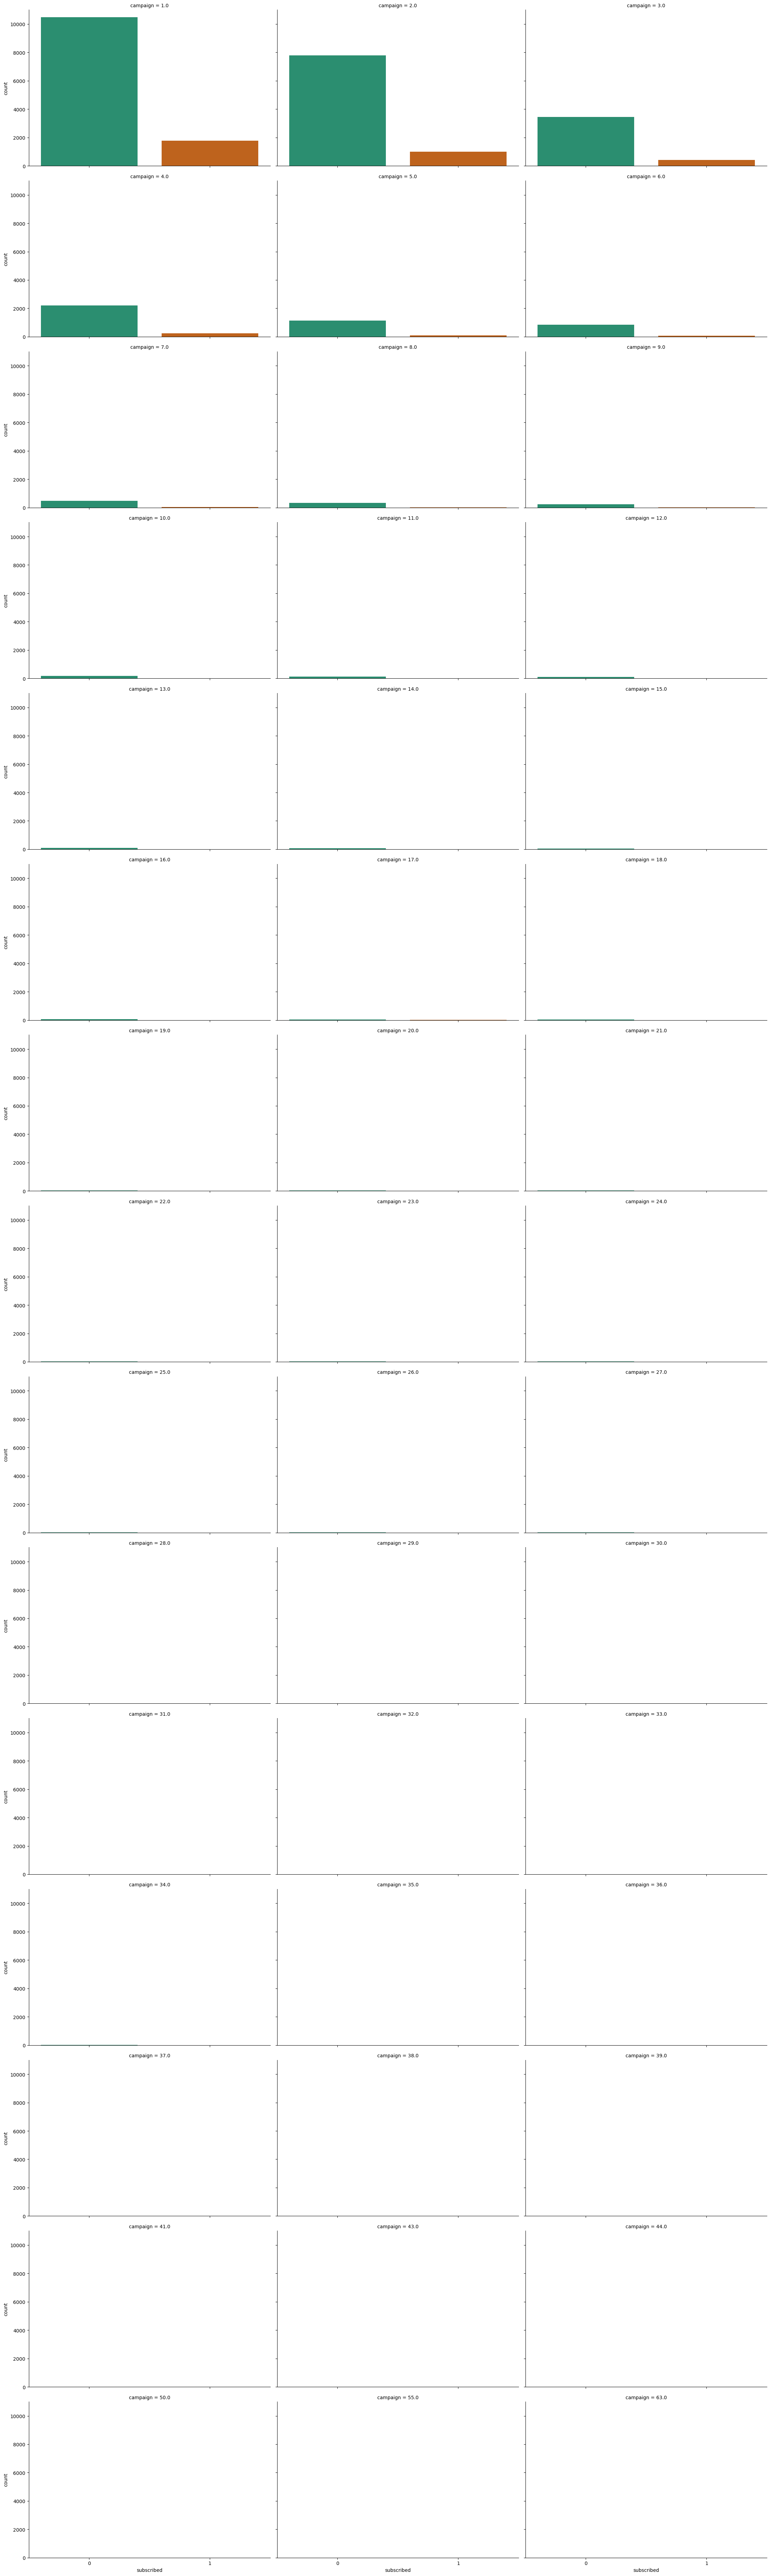

In [32]:
sns.catplot(x= 'subscribed', col= 'campaign', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

We can see that number of contacts performed during this campaign to the client resulted in more non-subscribers than subscribers. 

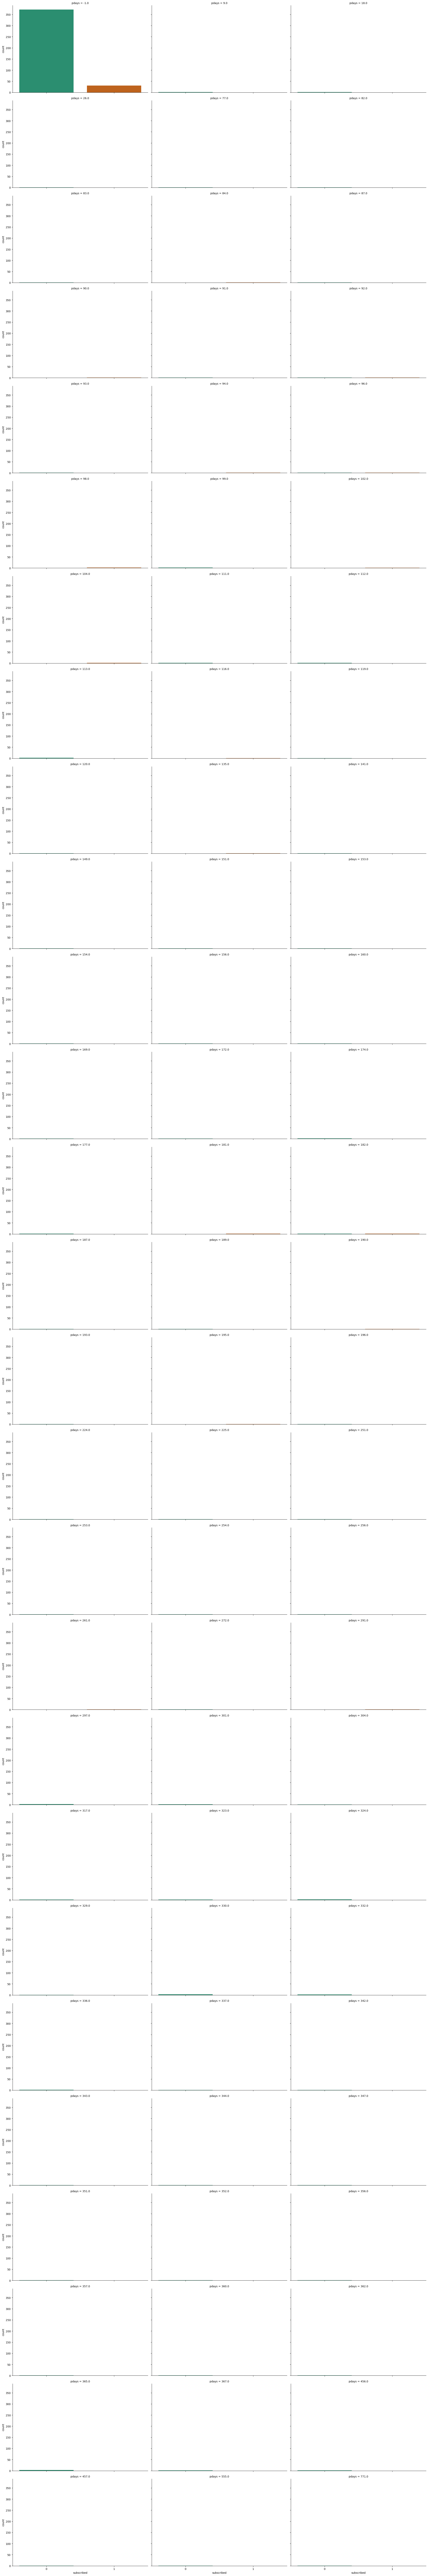

In [21]:
sns.catplot(x= 'subscribed', col= 'pdays', data = subscriber_data_first_500, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

We can see that number of days that passed by after the client was last contacted were more for non-subscribers than the subscribers at 1.0.

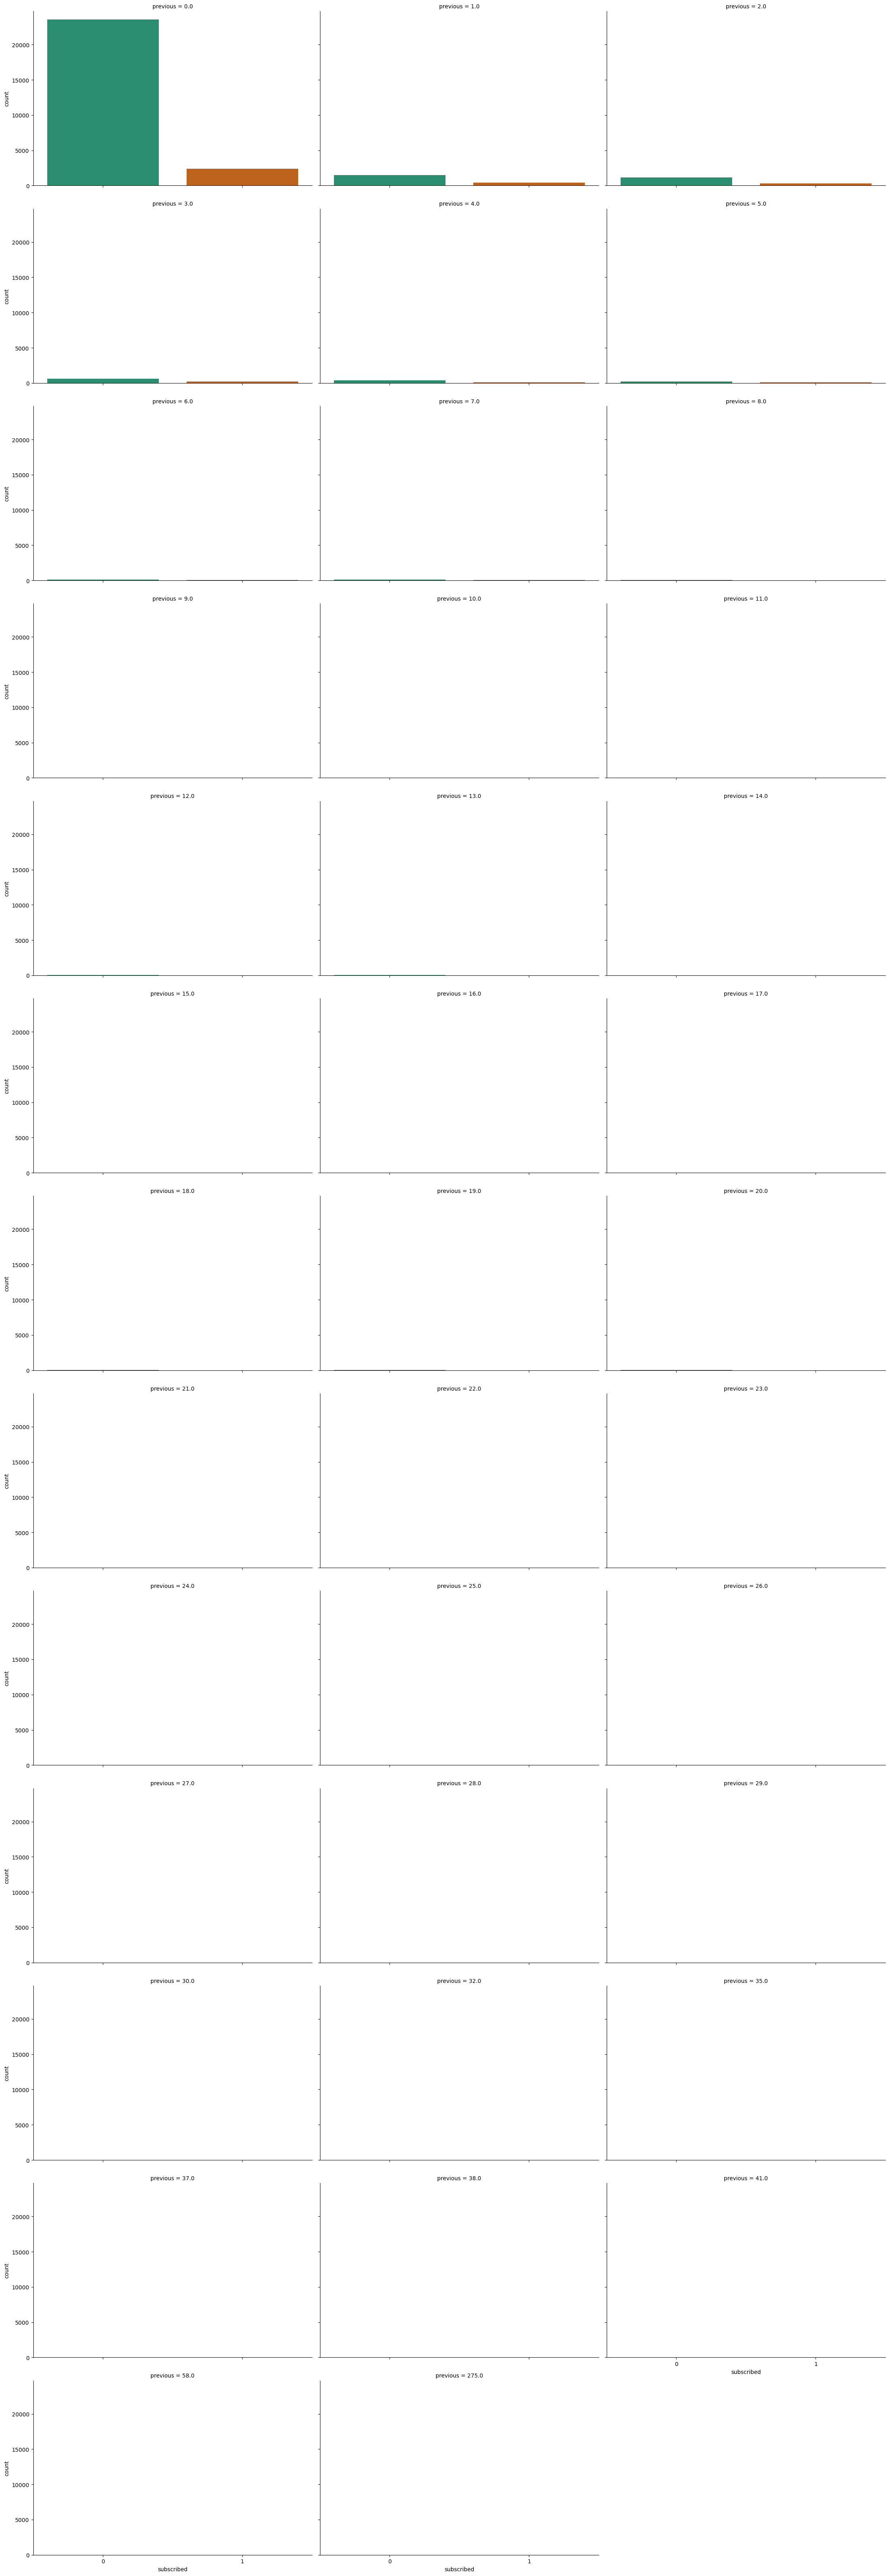

In [34]:
sns.catplot(x= 'subscribed', col= 'previous', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Wwe can see that number of contacts performed before this campaign also yielded more non-subscribers than subscribers at 0.0.

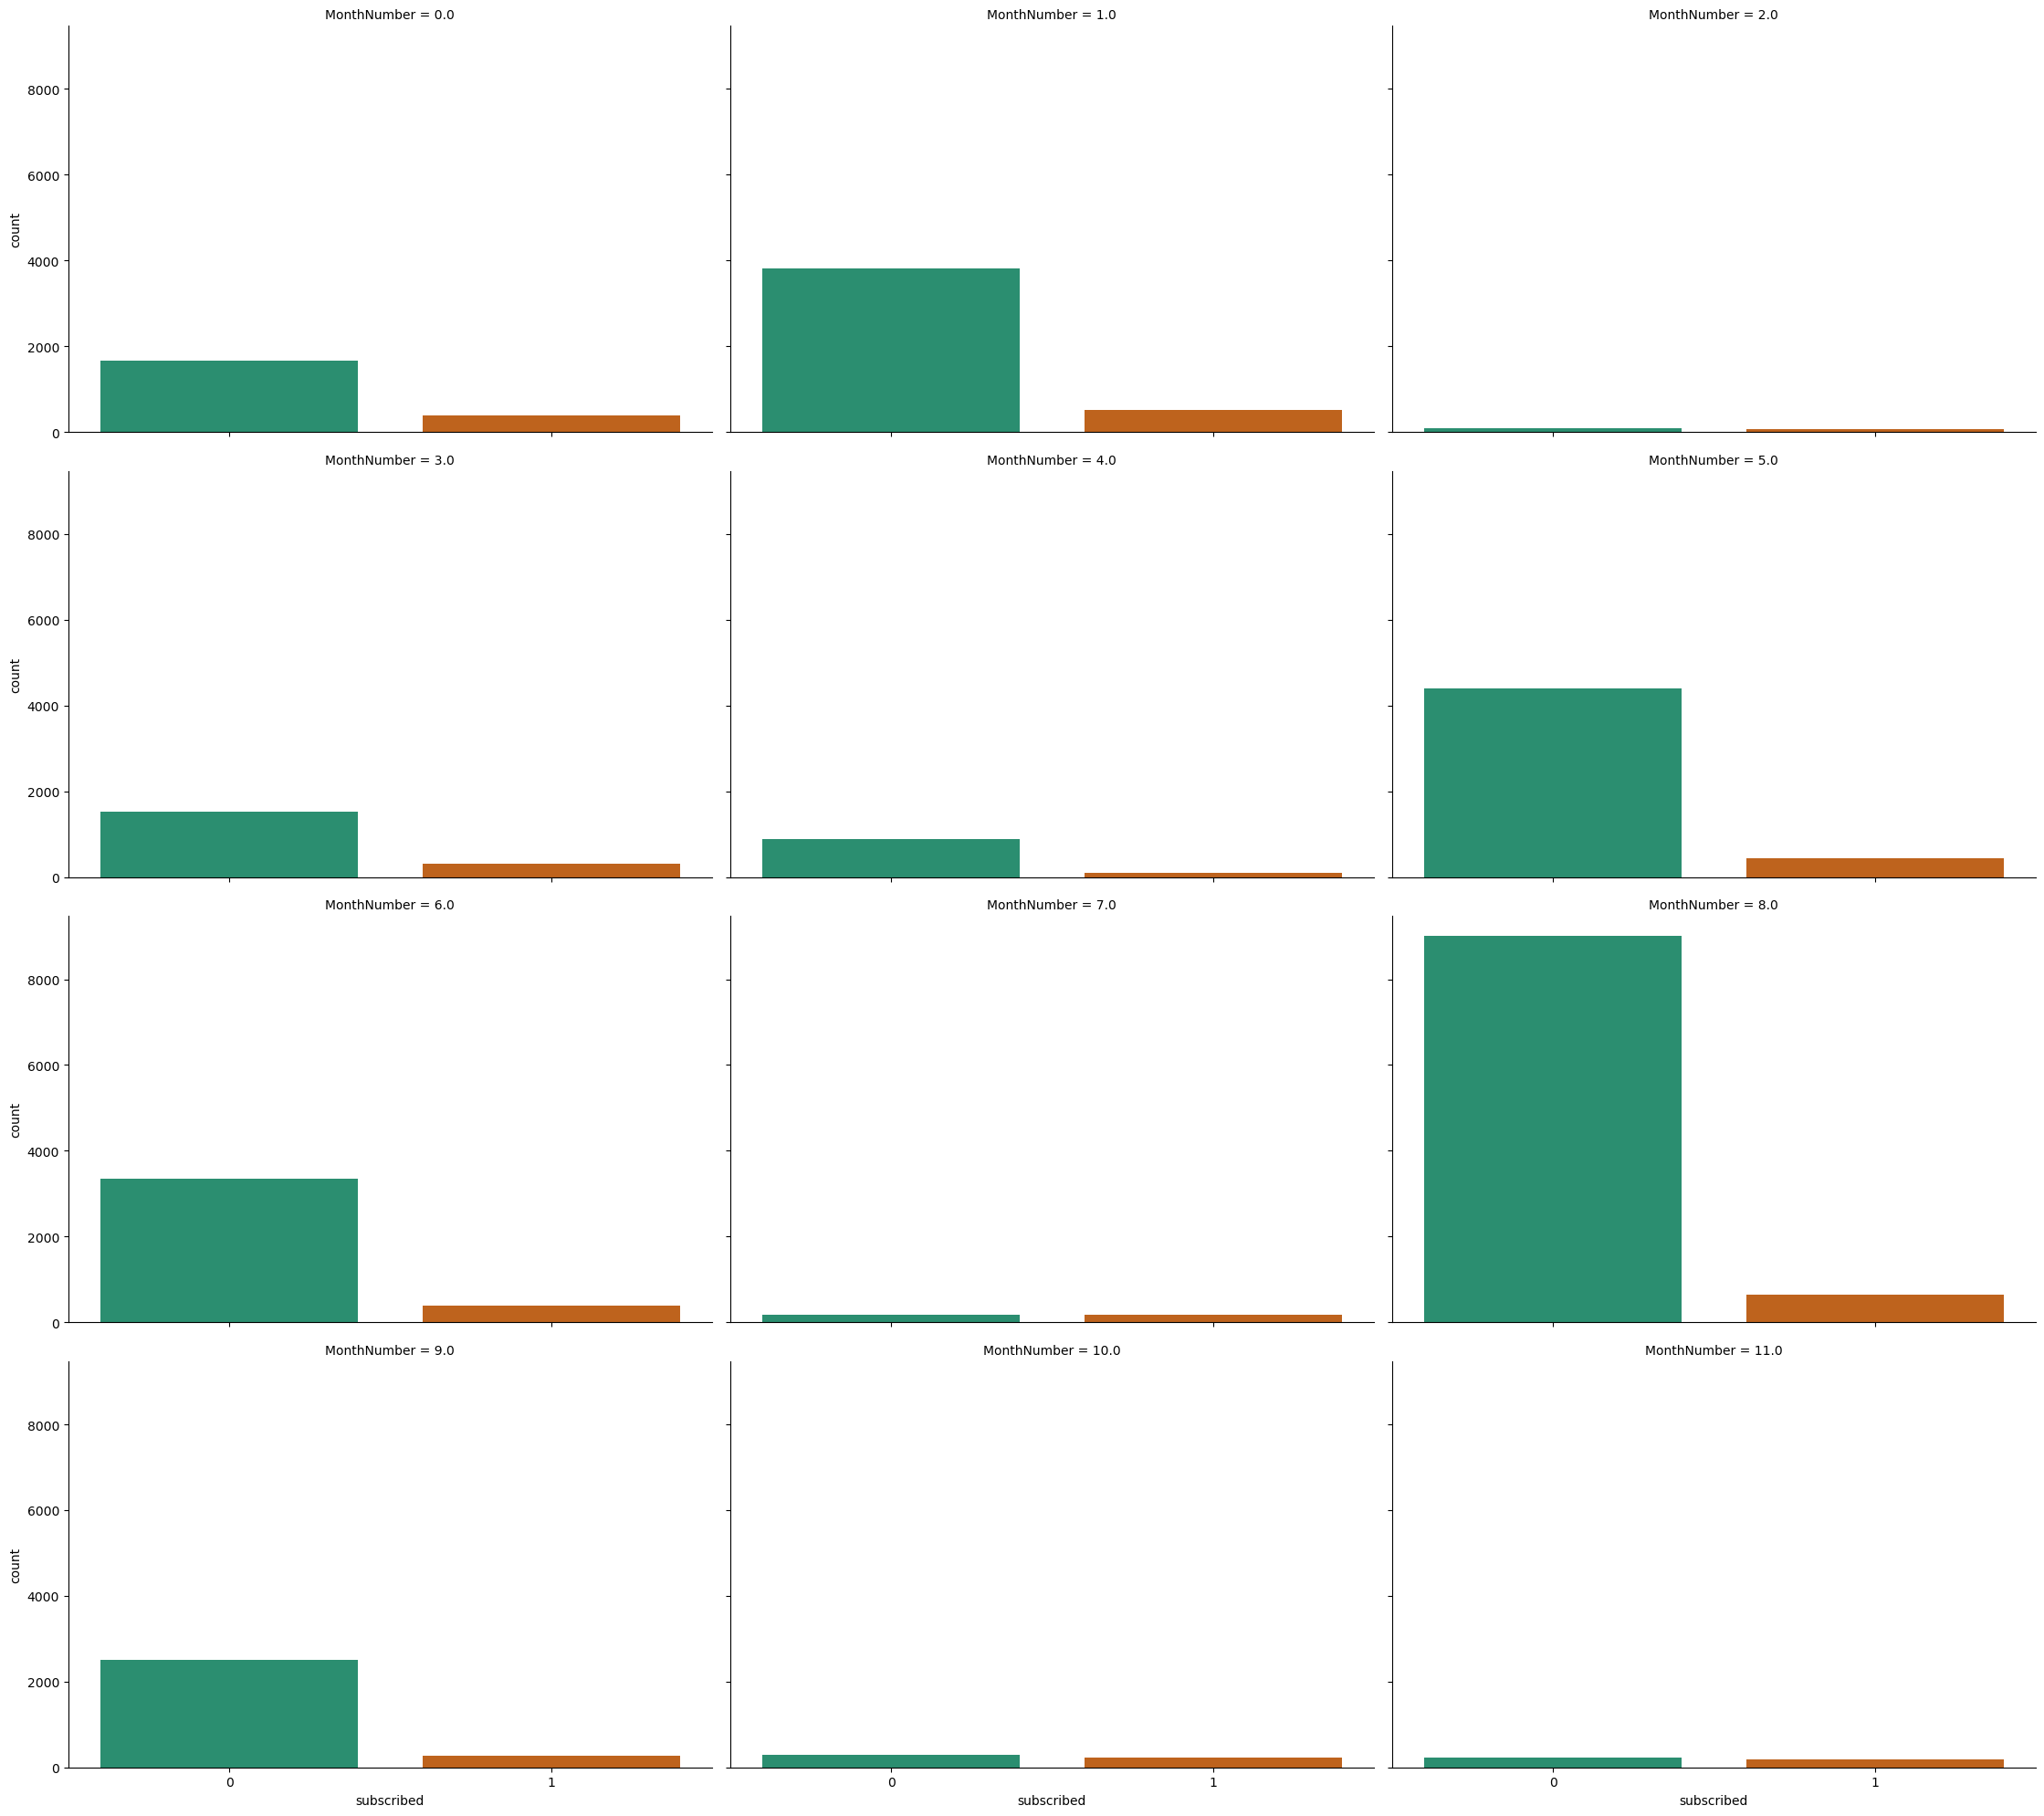

In [35]:
sns.catplot(x= 'subscribed', col= 'MonthNumber', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

We can see that most of non-subscribers were yielded on month 8 and most of the subscribers were yielded on month 8 as well.

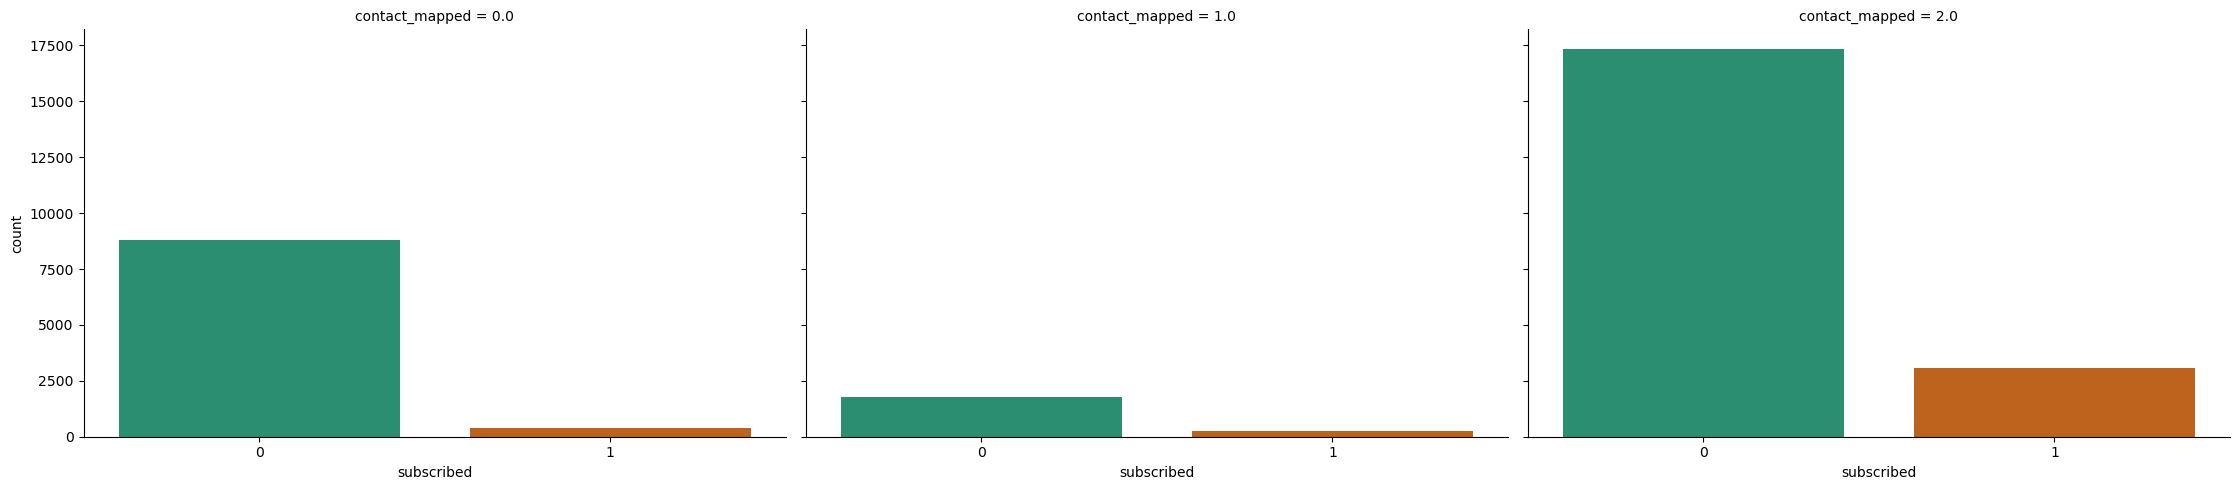

In [36]:
sns.catplot(x= 'subscribed', col= 'contact_mapped', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

We can see that most of non-subscribers and subscribers came from cell-phone, wheras most of non-subscribers were high on unknown, cellphone and telephone respectively.

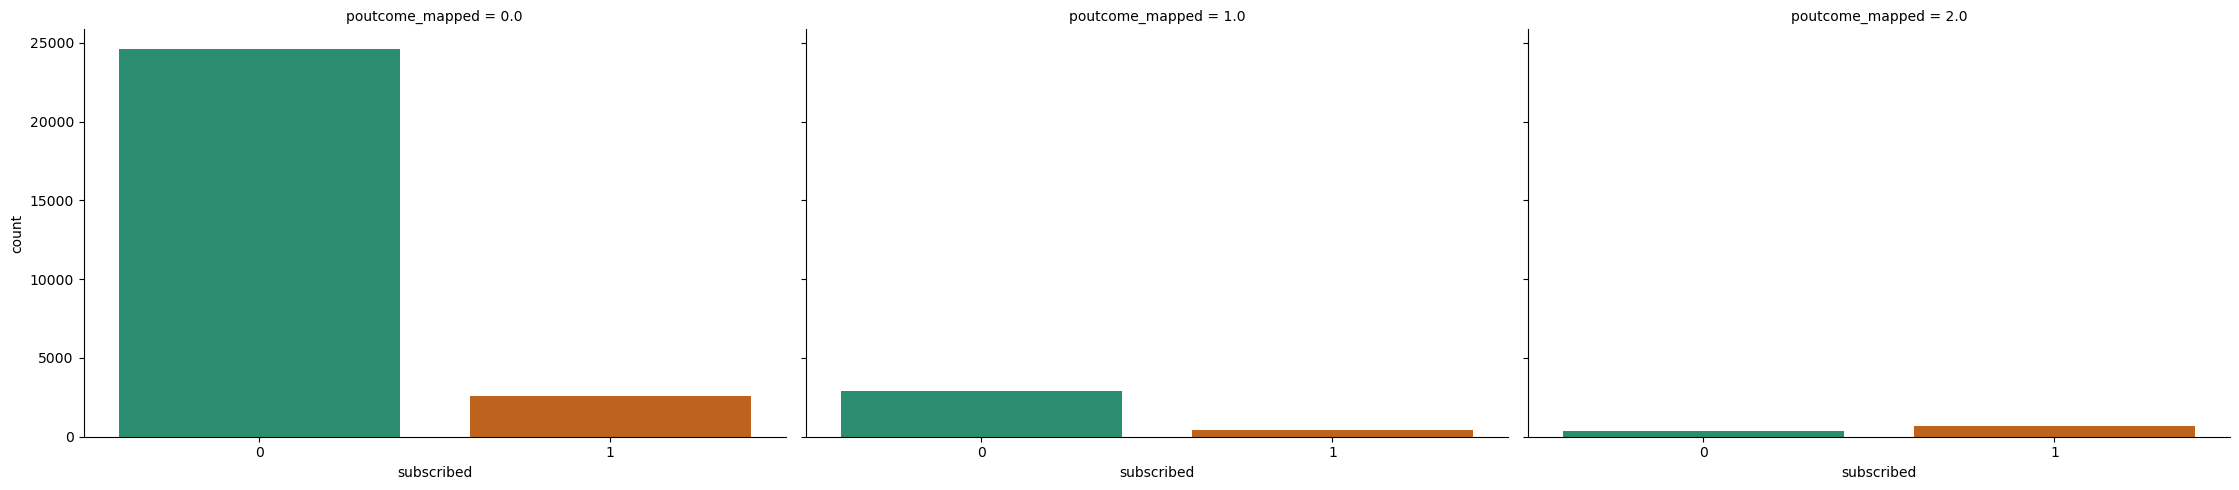

In [37]:
sns.catplot(x= 'subscribed', col= 'poutcome_mapped', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

We can see that outcome of the previous marketing campaign about the non-subscribers and non-subscribers were mostly unknown.

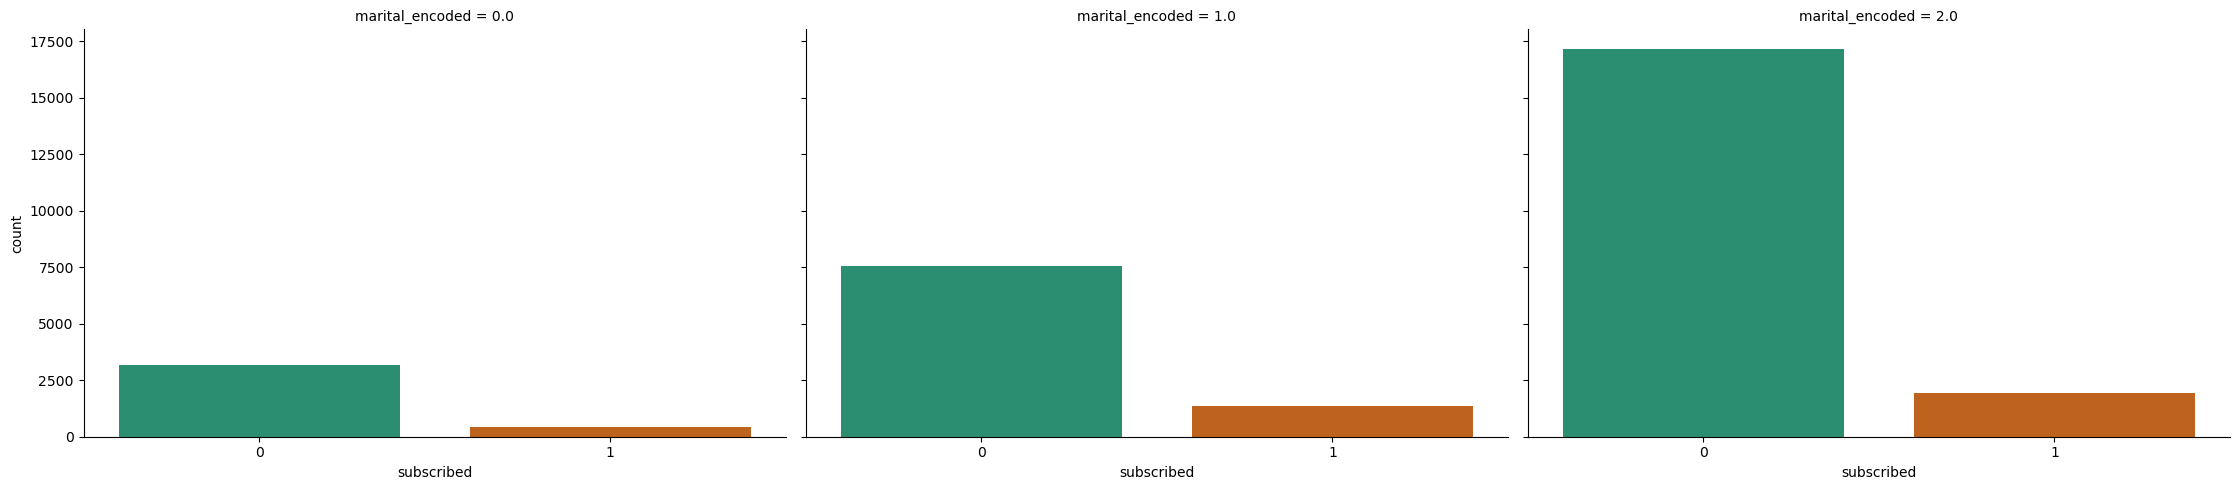

In [38]:
sns.catplot(x= 'subscribed', col= 'marital_encoded', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the subscribers and non-subscribers were married, second only to singles.

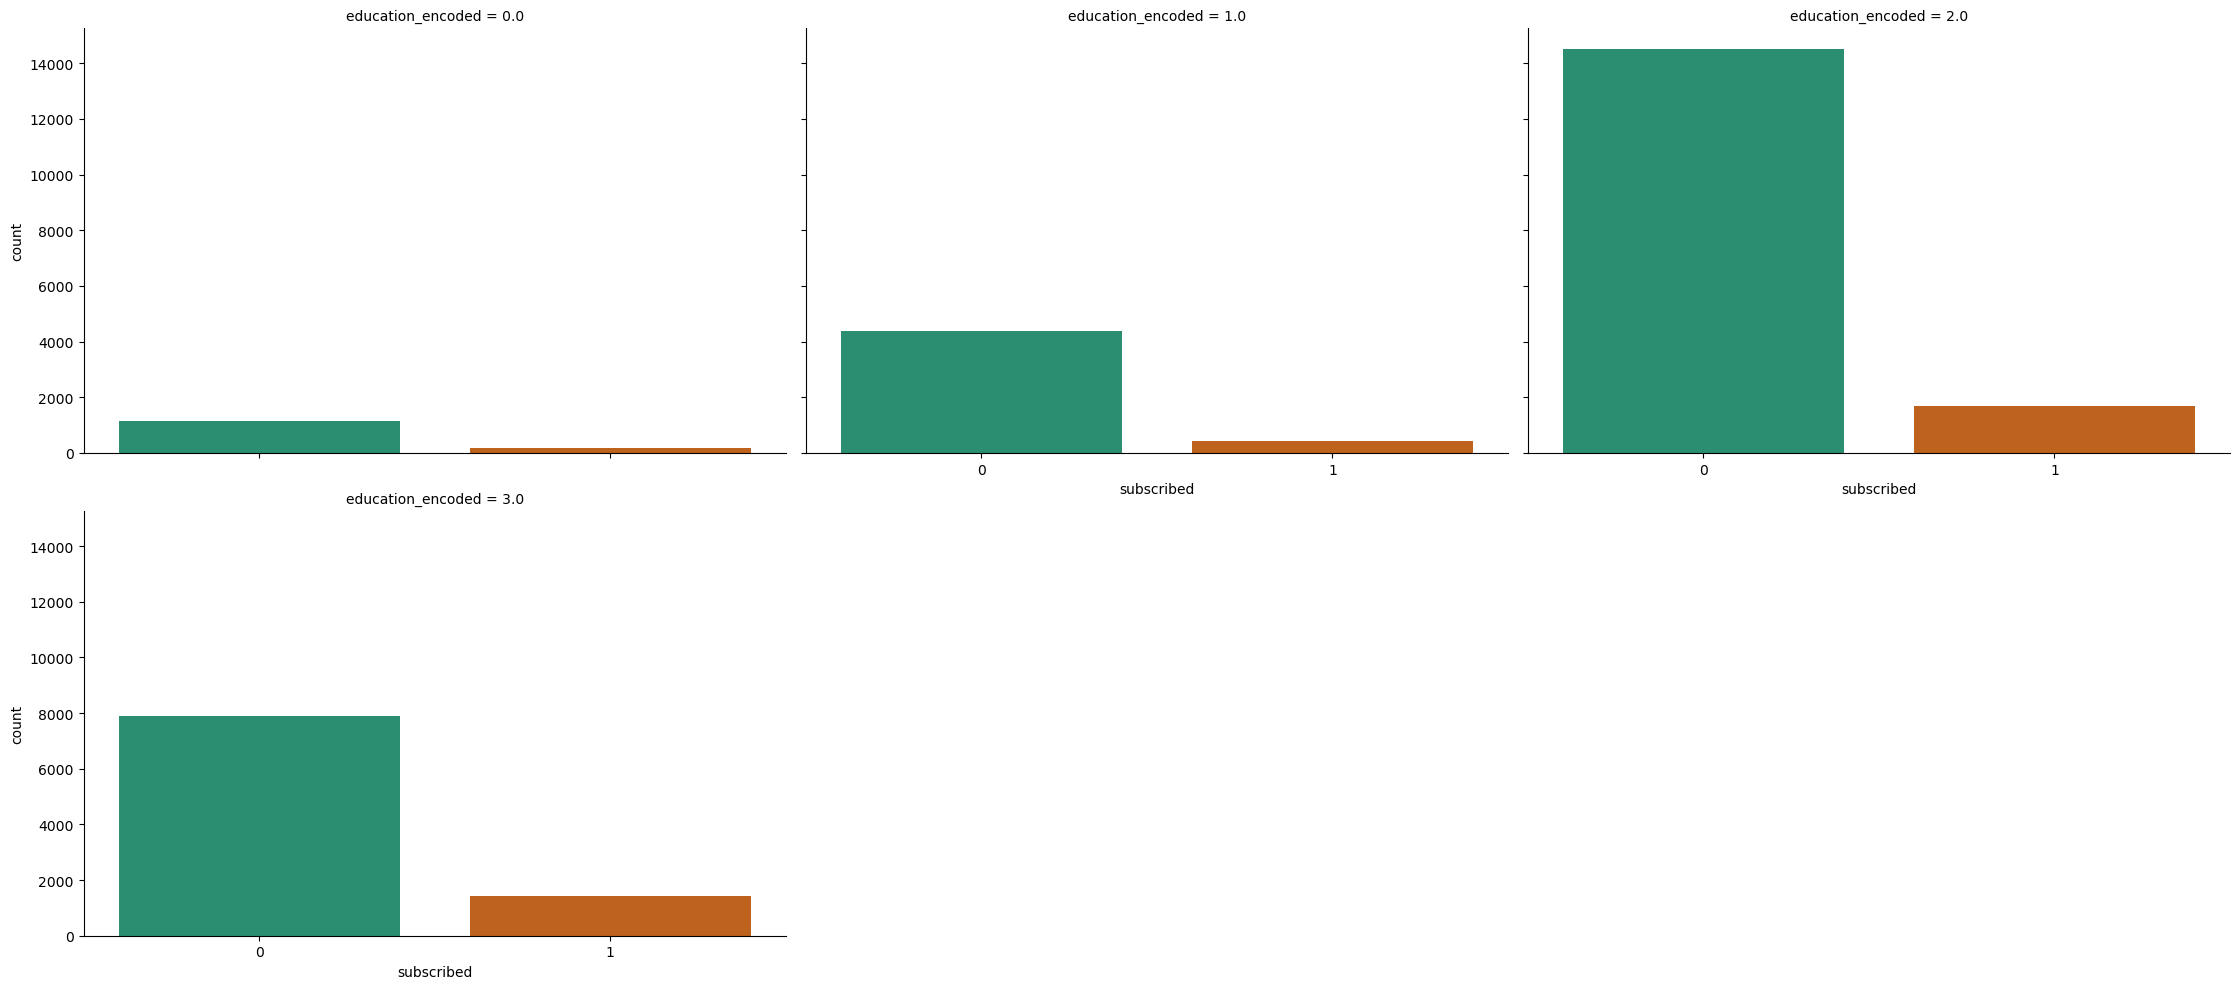

In [39]:
sns.catplot(x= 'subscribed', col= 'education_encoded', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

We can see that most of subscribers and non-subscribers had an education background from the secondary group, second only to teritary group.

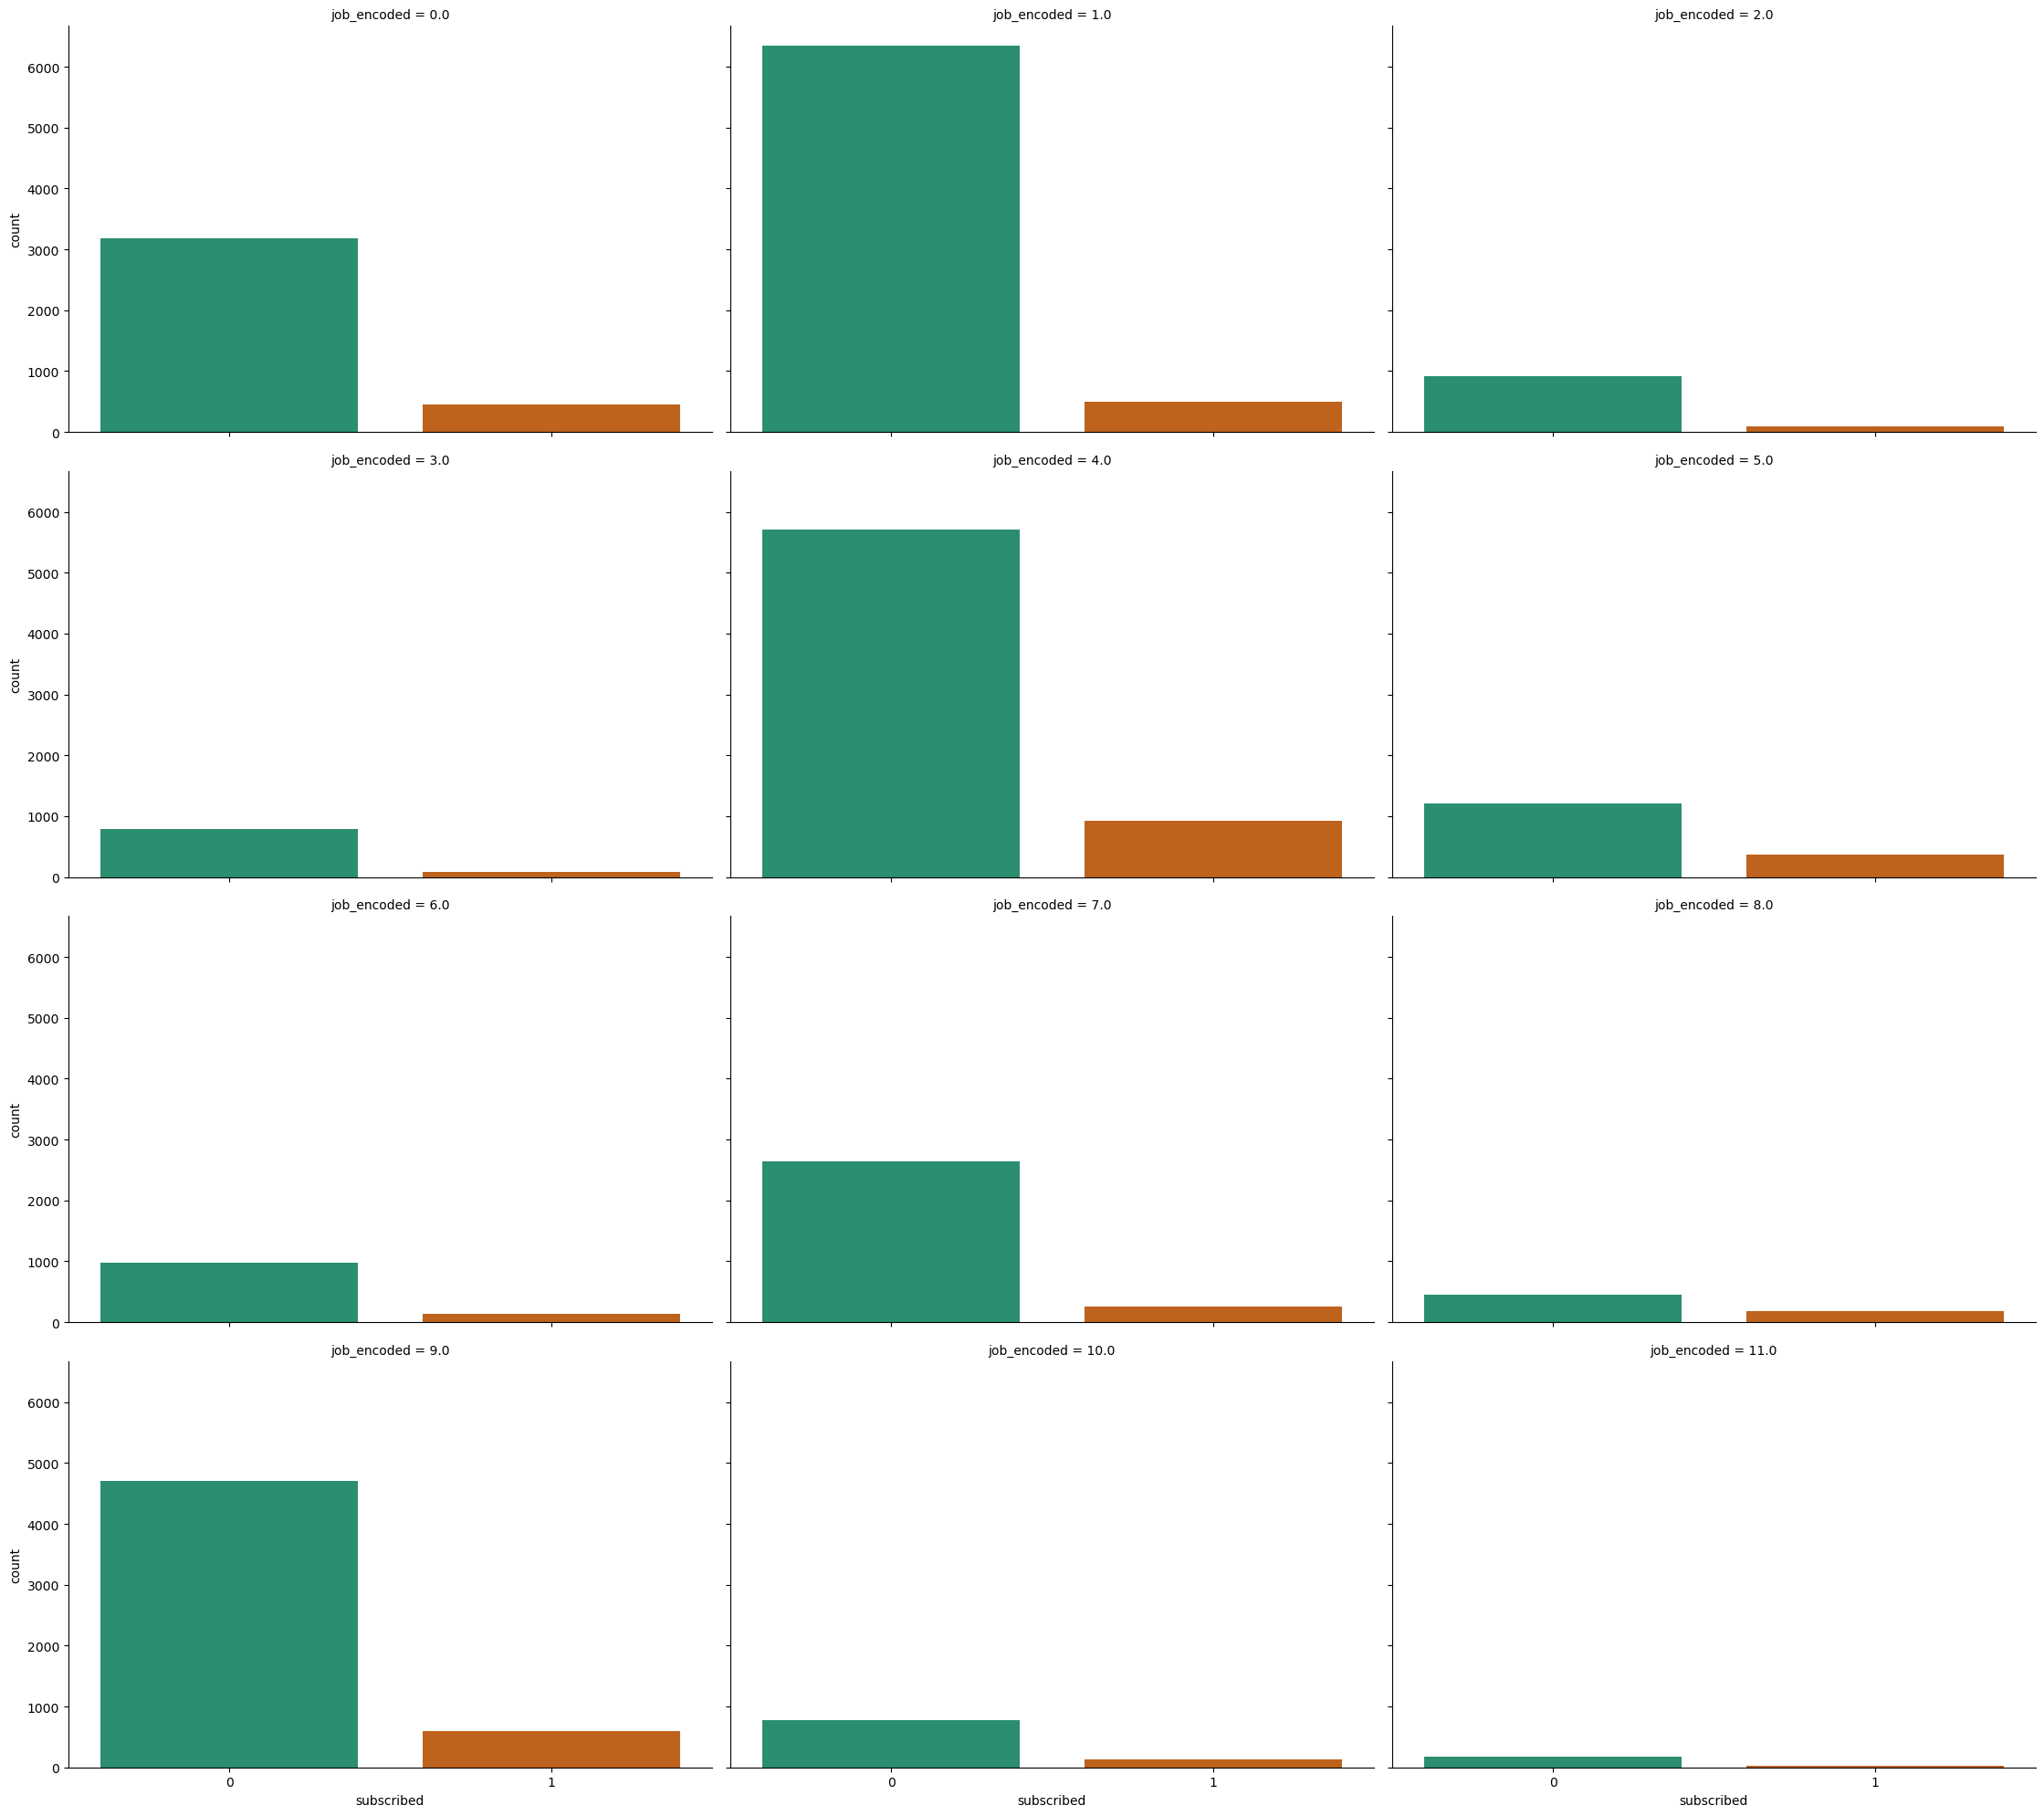

In [40]:
sns.catplot(x= 'subscribed', col= 'job_encoded', data = subscriber_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the subscribers and non-subscribers were management,blue-collar and technician background.

Multivariate analysis

Pairplots

Since the dataframe had large number of column which is too large to be fit by the plots, we will taking a section of the dataset to make generalisation using the pairplots.

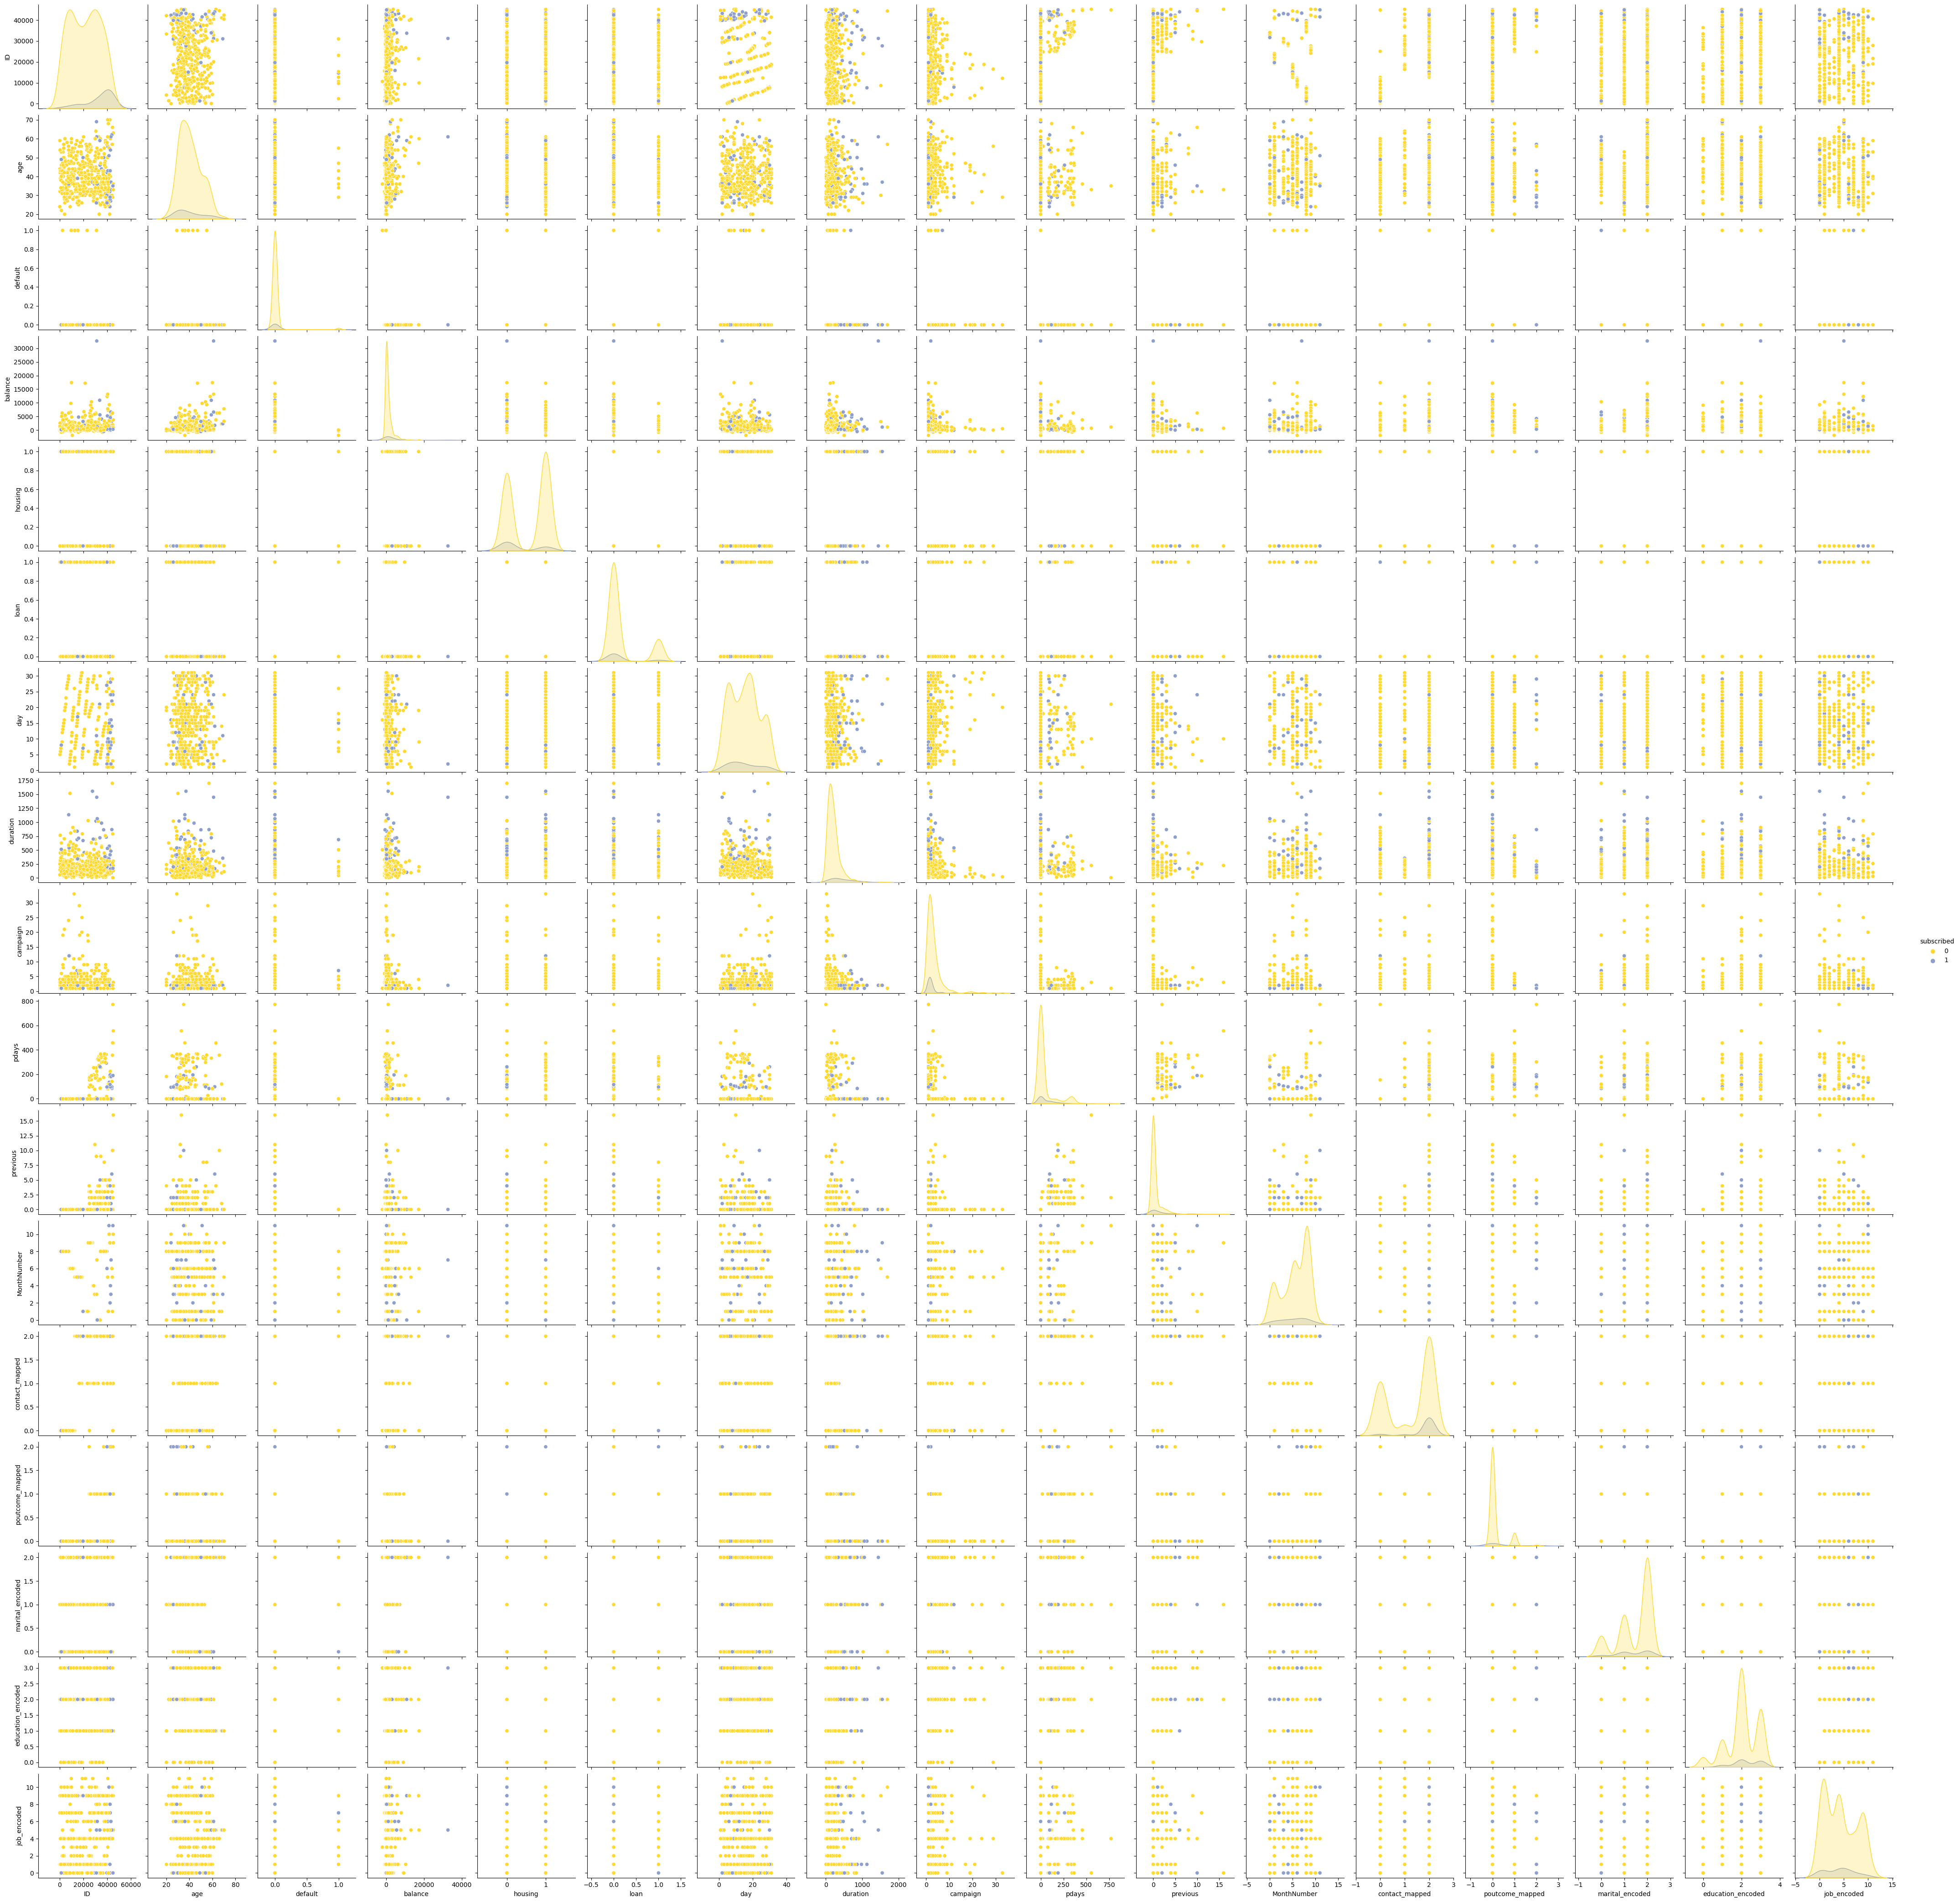

In [20]:
subscriber_data_first_500 = subscriber_data.head(500)
sns.pairplot(subscriber_data_first_500, hue='subscribed', palette='Set2_r')
plt.show()

From the above plots we can see that no conclusions can be made based colinearity and correlations when it comes to the input variables in the dataframe. We have to proceed further in order to estabilish any other relations between variables in the dataframe.

Boxplots

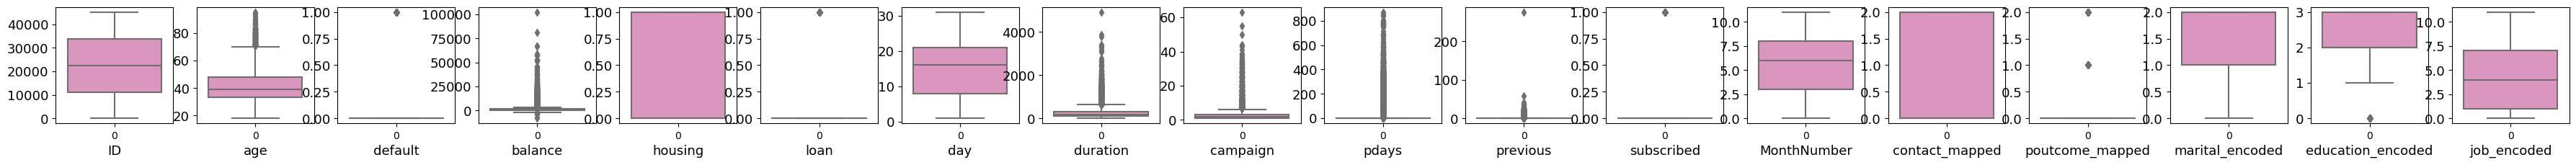

In [43]:
plt.figure(figsize=(45,45),facecolor = "white")
plotnumber=1
for col in subscriber_data:
    if plotnumber<=19:
        wc=plt.subplot(18,18,plotnumber)
        sns.boxplot(subscriber_data[col],palette="Set2_r")
        plt.xlabel(col,rotation=0,fontsize = 13)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

We can see that age,default,balance,loan,duration, campaign,pdays,previous,subscribed,poutcome mapped, and education-encoded have outliers when we see through the iqr ranges in their respective boxplot frames. 

Let's check for skewness for all the columns in the dataframe.

In [44]:
subscriber_data.skew()

ID                    0.005851
age                   0.681607
default               7.149903
balance               7.995696
housing              -0.223918
loan                  1.833474
day                   0.087185
duration              3.199766
campaign              4.873935
pdays                 2.642374
previous             49.302348
subscribed            2.377445
MonthNumber          -0.486498
contact_mapped       -0.758602
poutcome_mapped       2.691970
marital_encoded      -0.996576
education_encoded    -0.627863
job_encoded           0.264817
dtype: float64

We can see that skewness is quite high for default,balance,duration,campaign and previous columns. Let's correct it using the cbrt/cube root formulae.

In [45]:
subscriber_data['default']=np.cbrt(subscriber_data['default'])
subscriber_data['balance']=np.cbrt(subscriber_data['balance'])
subscriber_data['duration']=np.cbrt(subscriber_data['duration'])
subscriber_data['campaign']=np.cbrt(subscriber_data['campaign'])
subscriber_data['previous']=np.cbrt(subscriber_data['previous'])



Now let's again check for skewness.

In [46]:
subscriber_data.skew()

ID                   0.005851
age                  0.681607
default              7.149903
balance             -0.086014
housing             -0.223918
loan                 1.833474
day                  0.087185
duration             0.647275
campaign             1.667938
pdays                2.642374
previous             2.079738
subscribed           2.377445
MonthNumber         -0.486498
contact_mapped      -0.758602
poutcome_mapped      2.691970
marital_encoded     -0.996576
education_encoded   -0.627863
job_encoded          0.264817
dtype: float64

Most of the skewness is corrected other than the default column.

Distribution plots

Let's check for the distribution of values in our target column- subscribed.

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_18228\3712738653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subscriber_data['subscribed'],color="b", kde_kws={"shade":True}, hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


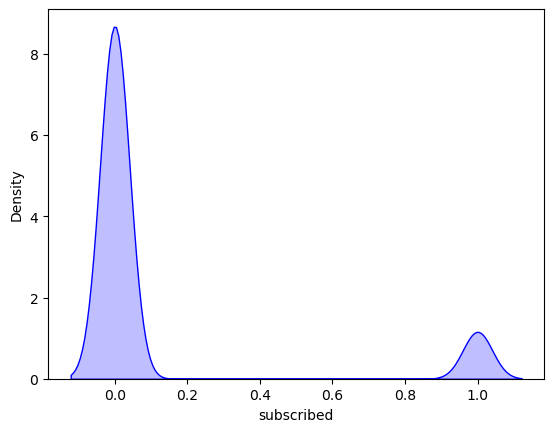

In [47]:
sns.distplot(subscriber_data['subscribed'],color="b", kde_kws={"shade":True}, hist=False)
plt.show()

We can see that most of the values signify there were more non-subscribers than subscribers.

Let's normalise the dataframe using ordinal encoder by changing any int64 columns into float values.

In [49]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in subscriber_data.columns:
    if subscriber_data[i].dtypes=='int64':
        subscriber_data[i]=OE.fit_transform(subscriber_data[i].values.reshape(-1,1))
subscriber_data

ID   age  default    balance  housing  loan   day   duration  \
0      26110.0  56.0      0.0  12.456918      0.0   0.0  19.0   3.530348   
1      40576.0  31.0      0.0   1.442250      0.0   0.0  20.0   4.497941   
2      15320.0  27.0      0.0   9.622603      1.0   0.0  18.0   6.214465   
3      43962.0  57.0      0.0  14.868480      0.0   0.0  22.0   9.535417   
4      29842.0  31.0      0.0   4.918685      1.0   0.0   4.0   7.243156   
...        ...   ...      ...        ...      ...   ...   ...        ...   
31642  36483.0  29.0      0.0   0.000000      1.0   0.0  12.0   4.876999   
31643  40178.0  53.0      0.0   7.243156      0.0   1.0   5.0   7.594363   
31644  19710.0  32.0      0.0   6.782423      0.0   0.0   7.0   3.332222   
31645  38556.0  57.0      0.0   6.082202      1.0   0.0  15.0   2.802039   
31646  14156.0  55.0      0.0   5.886765      1.0   0.0  11.0  12.542257   

       campaign  pdays  previous  subscribed  MonthNumber  contact_mapped  \
0      1.259921   -1.0  0.000000         0.0          9.0             1.0   
1      1.259921   -1.0  0.000000         0.0          5.0             2.0   
2      1.000000   -1.0  0.000000         0.0          5.0             2.0   
3      1.000000   84.0  1.442250         1.0          6.0             2.0   
4      1.000000   -1.0  0.000000         0.0          3.0             2.0   
...         ...    ...       ...         ...          ...             ...   
31642  1.259921   -1.0  0.000000         0.0          8.0             2.0   
31643  1.259921   -1.0  0.000000         1.0          6.0             2.0   
31644  1.442250   -1.0  0.000000         0.0          1.0             2.0   
31645  1.912931  337.0  2.289428         0.0          8.0             1.0   
31646  1.259921   -1.0  0.000000         1.0          5.0             2.0   

       poutcome_mapped  marital_encoded  education_encoded  job_encoded  
0                  0.0              2.0                0.0          0.0  
1                  0.0              2.0                2.0         11.0  
2                  0.0              2.0                2.0          7.0  
3                  2.0              0.0                3.0          4.0  
4                  0.0              2.0                2.0          9.0  
...                ...              ...                ...          ...  
31642              0.0              1.0                3.0          4.0  
31643              0.0              0.0                3.0          4.0  
31644              0.0              1.0                3.0          4.0  
31645              1.0              2.0                2.0          9.0  
31646              0.0              0.0                2.0          4.0  

[31647 rows x 18 columns]

Now let's check for correlation between variables present in the dataframe sing the .corr() method.

In [50]:
correlation = subscriber_data.corr()
correlation

ID       age   default   balance   housing      loan  \
ID                 1.000000  0.013337 -0.051521  0.132513 -0.180047 -0.086140   
age                0.013337  1.000000 -0.016117  0.102655 -0.183775 -0.012657   
default           -0.051521 -0.016117  1.000000 -0.198400 -0.011823  0.081567   
balance            0.132513  0.102655 -0.198400  1.000000 -0.087058 -0.142789   
housing           -0.180047 -0.183775 -0.011823 -0.087058  1.000000  0.036244   
loan              -0.086140 -0.012657  0.081567 -0.142789  0.036244  1.000000   
day               -0.063399 -0.011056  0.009996 -0.011106 -0.025666  0.014769   
duration           0.012626 -0.008672 -0.009781  0.038476  0.001012 -0.011323   
campaign          -0.114966  0.016974  0.018914 -0.035939 -0.033177  0.006838   
pdays              0.436148 -0.021947 -0.029622  0.030144  0.118790 -0.020078   
previous           0.478953  0.004836 -0.036702  0.070936  0.053207 -0.025072   
subscribed         0.296663  0.024538 -0.020168  0.097107 -0.141092 -0.072266   
MonthNumber       -0.165274 -0.038368  0.004694 -0.002360  0.271442  0.024186   
contact_mapped     0.723830 -0.026733 -0.014053  0.047563 -0.195103  0.009213   
poutcome_mapped    0.430272  0.019027 -0.037600  0.078542 -0.004409 -0.040572   
marital_encoded   -0.045255  0.122745 -0.018933  0.029940  0.010397  0.022987   
education_encoded  0.097732 -0.171256 -0.006158  0.048378 -0.043637  0.005124   
job_encoded        0.061805 -0.020765 -0.005217  0.030541 -0.125347 -0.039049   

                        day  duration  campaign     pdays  previous  \
ID                -0.063399  0.012626 -0.114966  0.436148  0.478953   
age               -0.011056 -0.008672  0.016974 -0.021947  0.004836   
default            0.009996 -0.009781  0.018914 -0.029622 -0.036702   
balance           -0.011106  0.038476 -0.035939  0.030144  0.070936   
housing           -0.025666  0.001012 -0.033177  0.118790  0.053207   
loan               0.014769 -0.011323  0.006838 -0.020078 -0.025072   
day                1.000000 -0.052736  0.164516 -0.087626 -0.078785   
duration          -0.052736  1.000000 -0.143372  0.007671  0.015303   
campaign           0.164516 -0.143372  1.000000 -0.095301 -0.097897   
pdays             -0.087626  0.007671 -0.095301  1.000000  0.821479   
previous          -0.078785  0.015303 -0.097897  0.821479  1.000000   
subscribed        -0.029600  0.379716 -0.082134  0.108290  0.167908   
MonthNumber       -0.000604  0.005335 -0.132575  0.027576  0.032273   
contact_mapped     0.027046  0.032611 -0.014552  0.245076  0.273055   
poutcome_mapped   -0.066361  0.043744 -0.123591  0.648603  0.758440   
marital_encoded    0.002926 -0.019439  0.046786 -0.024358 -0.020446   
education_encoded  0.015480  0.007853 -0.000512  0.008530  0.035337   
job_encoded        0.020951  0.001740  0.004734 -0.022552  0.000043   

                   subscribed  MonthNumber  contact_mapped  poutcome_mapped  \
ID                   0.296663    -0.165274        0.723830         0.430272   
age                  0.024538    -0.038368       -0.026733         0.019027   
default             -0.020168     0.004694       -0.014053        -0.037600   
balance              0.097107    -0.002360        0.047563         0.078542   
housing             -0.141092     0.271442       -0.195103        -0.004409   
loan                -0.072266     0.024186        0.009213        -0.040572   
day                 -0.029600    -0.000604        0.027046        -0.066361   
duration             0.379716     0.005335        0.032611         0.043744   
campaign            -0.082134    -0.132575       -0.014552        -0.123591   
pdays                0.108290     0.027576        0.245076         0.648603   
previous             0.167908     0.032273        0.273055         0.758440   
subscribed           1.000000    -0.028088        0.150051         0.250787   
MonthNumber         -0.028088     1.000000       -0.362934         0.023190   
contact_mapped       0.150051

Let's visualise them using the heatmap method to get some conclusions out of the dataset.

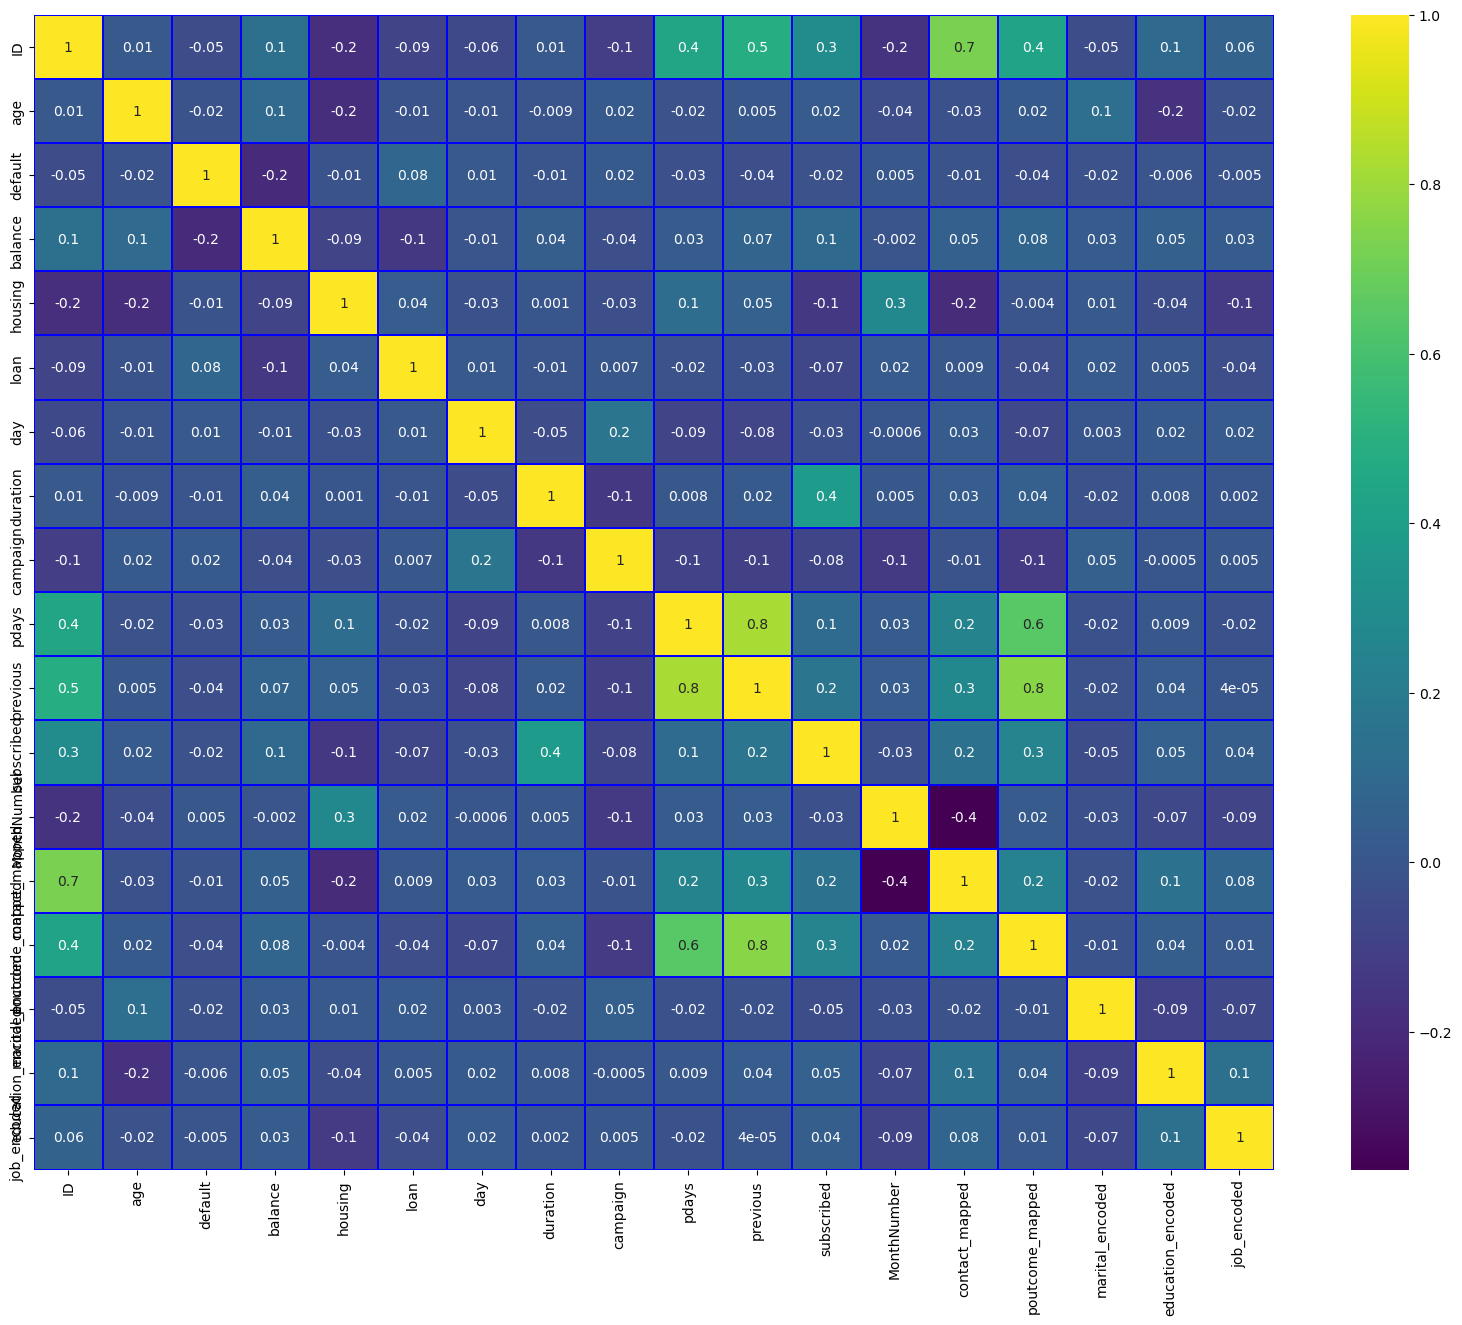

In [51]:
plt.figure(figsize = (20,15))
sns.heatmap(subscriber_data.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "blue", annot=True, cmap= "viridis")
plt.yticks(rotation=90);
plt.show()

Below are the finding that we can make from the dataset:
1) Id, previous, duration, contact_mapped and p_outcome mapped have positive correlation with the target column subscribed and negative correlation with housing.
2) pdays and previous are highly positively correlated, and they have a positive aorrelation with poutcome_mapped.
3) Housing has a positive correlation with month number.
4) id has a positive correlation with pdays,previous, contact_mapped and poutcome_mapped.
5) contact_mapped and poutcome_mapped are negatively correlated.
6) Rest all the variables have no or weak correlations

Let's sort the correlation based on our target column- subscribed, so that we can find weak and strong correlations.

In [52]:
correlation['subscribed'].sort_values(ascending = False)

subscribed           1.000000
duration             0.379716
ID                   0.296663
poutcome_mapped      0.250787
previous             0.167908
contact_mapped       0.150051
pdays                0.108290
balance              0.097107
education_encoded    0.052489
job_encoded          0.038921
age                  0.024538
default             -0.020168
MonthNumber         -0.028088
day                 -0.029600
marital_encoded     -0.048413
loan                -0.072266
campaign            -0.082134
housing             -0.141092
Name: subscribed, dtype: float64

We will removing the following columns due to their weak correlations later on after finding the vif values:

balance              0.097107
education_encoded    0.052489
job_encoded          0.038921
age                  0.024538
default             -0.020168
MonthNumber         -0.028088
day                 -0.029600
marital_encoded     -0.048413
loan                -0.072266
campaign            -0.082134

Let's visualise the correlations with bar plots.

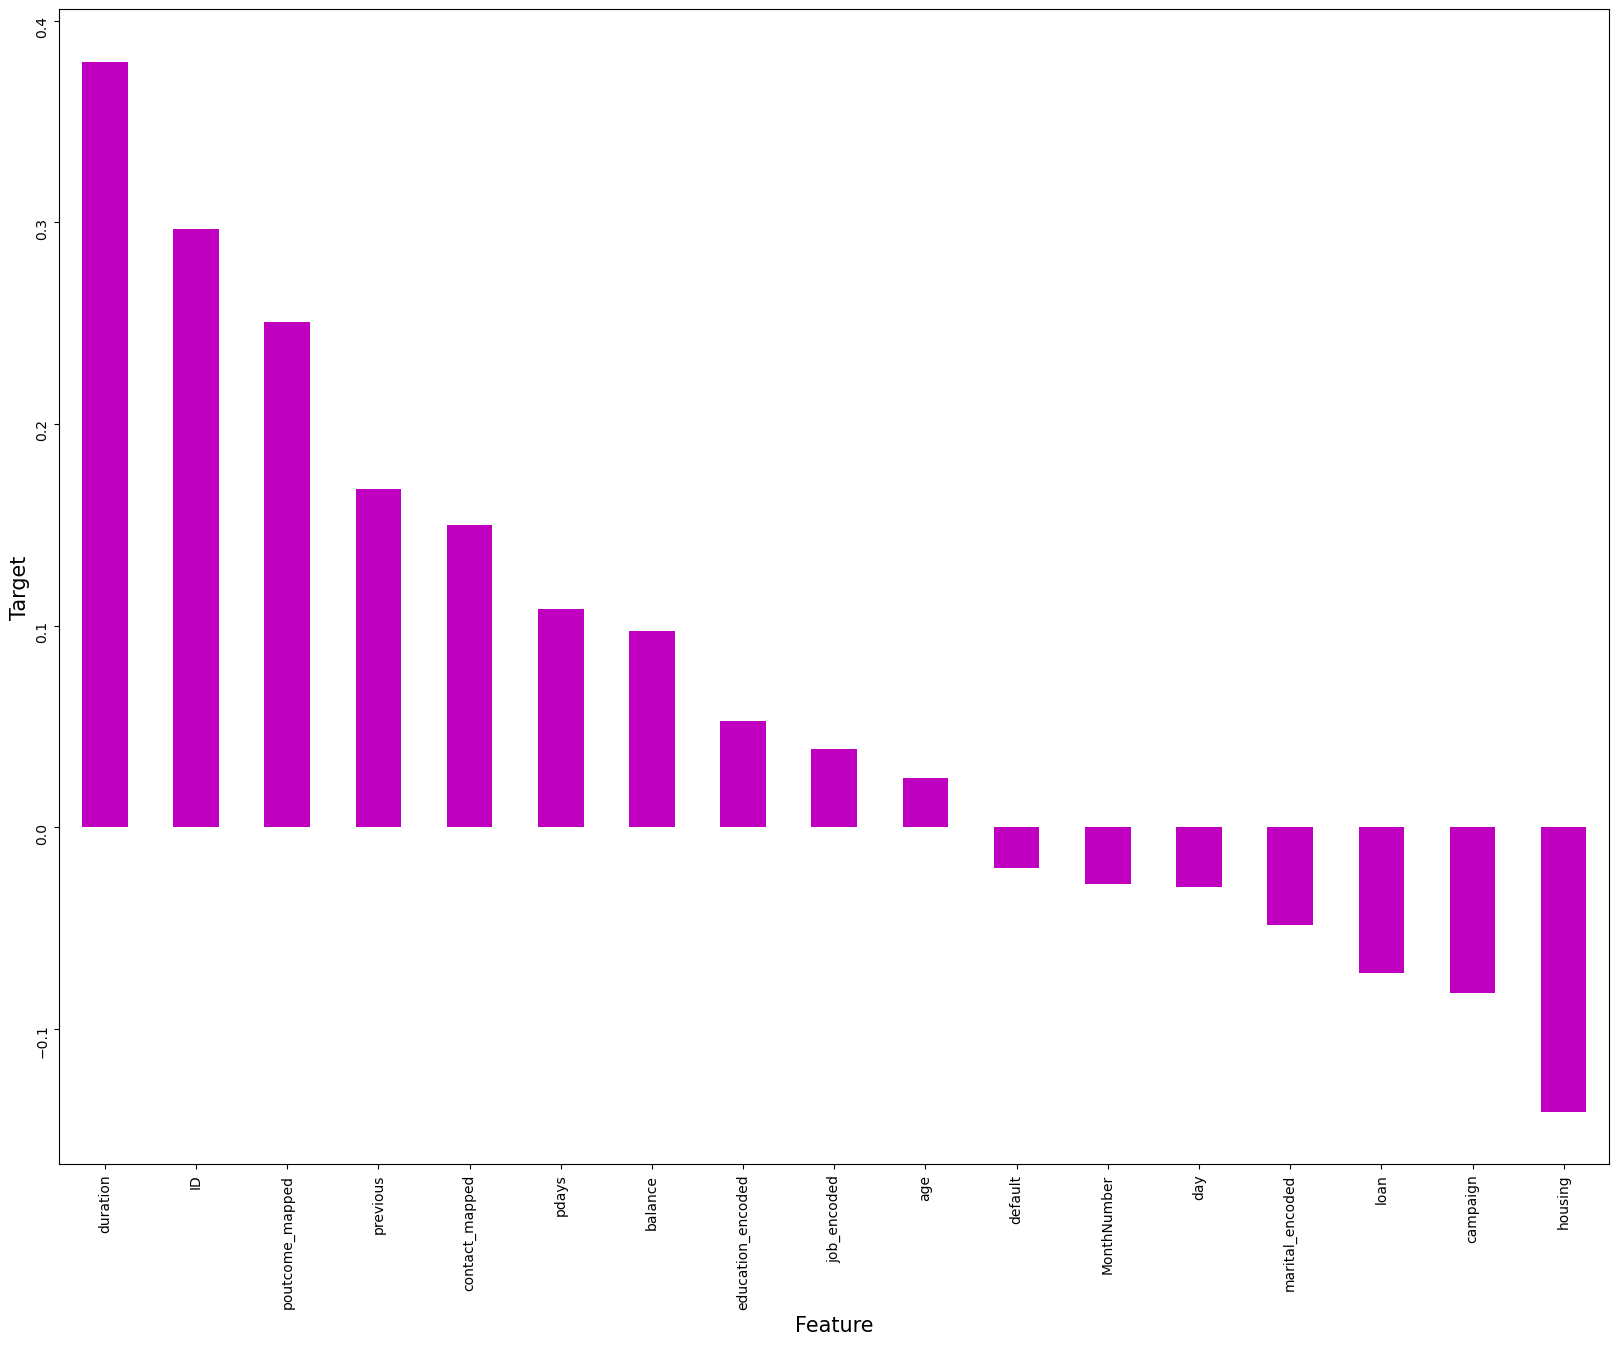

In [53]:
plt.figure(figsize = (20,15))
correlation['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.yticks(rotation=90);
plt.show()

Now let's declare the x and y variables, and scale the data using the standard scaler to determine the vif values

In [54]:
x = subscriber_data.drop("subscribed", axis=1)
y = subscriber_data["subscribed"]

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

ID       age   default   balance   housing      loan       day  \
0      0.271192  1.415793 -0.137234  0.757778 -1.118201 -0.439893  0.379579   
1      1.377516 -0.937156 -0.137234 -0.911548 -1.118201 -0.439893  0.499526   
2     -0.554001 -1.313627 -0.137234  0.328224  0.894294 -0.439893  0.259631   
3      1.636469  1.509911 -0.137234  1.123262 -1.118201 -0.439893  0.739422   
4      0.556606 -0.937156 -0.137234 -0.384677  0.894294 -0.439893 -1.419637   
...         ...       ...       ...       ...       ...       ...       ...   
31642  1.064493 -1.125392 -0.137234 -1.130128  0.894294 -0.439893 -0.460055   
31643  1.347078  1.133439 -0.137234 -0.032392 -1.118201  2.273280 -1.299690   
31644 -0.218265 -0.843038 -0.137234 -0.102219 -1.118201 -0.439893 -1.059794   
31645  1.223031  1.509911 -0.137234 -0.208341  0.894294 -0.439893 -0.100212   
31646 -0.643021  1.321675 -0.137234 -0.237960  0.894294 -0.439893 -0.580003   

       duration  campaign     pdays  previous  MonthNumber  contact_mapped  \
0     -1.328474 -0.127816 -0.408555 -0.449105     1.154007       -0.395076   
1     -0.775734 -0.127816 -0.408555 -0.449105    -0.177462        0.716695   
2      0.204835 -0.873593 -0.408555 -0.449105    -0.177462        0.716695   
3      2.101938 -0.873593  0.447299  2.189741     0.155405        0.716695   
4      0.792477 -0.873593 -0.408555 -0.449105    -0.843197        0.716695   
...         ...       ...       ...       ...          ...             ...   
31642 -0.559197 -0.127816 -0.408555 -0.449105     0.821140        0.716695   
31643  0.993105 -0.127816 -0.408555 -0.449105     0.155405        0.716695   
31644 -1.441655  0.395329 -0.408555 -0.449105    -1.508931        0.716695   
31645 -1.744523  1.745828  2.994723  3.739801     0.821140       -0.395076   
31646  3.819603 -0.127816 -0.408555 -0.449105    -0.177462        0.716695   

       poutcome_mapped  marital_encoded  education_encoded  job_encoded  
0            -0.378171         0.738595          -2.639583    -1.324317  
1            -0.378171         0.738595          -0.075551     2.037729  
2            -0.378171         0.738595          -0.075551     0.815167  
3             3.975402        -2.150332           1.206465    -0.101755  
4            -0.378171         0.738595          -0.075551     1.426448  
...                ...              ...                ...          ...  
31642        -0.378171        -0.705869           1.206465    -0.101755  
31643        -0.378171        -2.150332           1.206465    -0.101755  
31644        -0.378171        -0.705869           1.206465    -0.101755  
31645         1.798616         0.738595          -0.075551     1.426448  
31646        -0.378171        -2.150332          -0.075551    -0.101755  

[31647 rows x 17 columns]

Now let's check for vif values in our dataset.

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values           Features
0     2.834420                 ID
1     1.099090                age
2     1.046711            default
3     1.100122            balance
4     1.209812            housing
5     1.043784               loan
6     1.046656                day
7     1.028690           duration
8     1.093130           campaign
9     3.214520              pdays
10    4.330794           previous
11    1.280221        MonthNumber
12    2.542252     contact_mapped
13    2.428335    poutcome_mapped
14    1.032544    marital_encoded
15    1.081835  education_encoded
16    1.043305        job_encoded

Now let's remove the columns with low correlation to readjust the vif values later on.

In [57]:
columns_with_low_corelation_and_high_VIF = ['balance','education_encoded','job_encoded','age','default','MonthNumber','day','marital_encoded','loan','campaign']
subscriber_data = subscriber_data.drop(columns=columns_with_low_corelation_and_high_VIF)

Now let's check for vif values of our new dataframe using the same methods we used above.

In [58]:
subscriber_data

ID  housing   duration  pdays  previous  subscribed  \
0      26110.0      0.0   3.530348   -1.0  0.000000         0.0   
1      40576.0      0.0   4.497941   -1.0  0.000000         0.0   
2      15320.0      1.0   6.214465   -1.0  0.000000         0.0   
3      43962.0      0.0   9.535417   84.0  1.442250         1.0   
4      29842.0      1.0   7.243156   -1.0  0.000000         0.0   
...        ...      ...        ...    ...       ...         ...   
31642  36483.0      1.0   4.876999   -1.0  0.000000         0.0   
31643  40178.0      0.0   7.594363   -1.0  0.000000         1.0   
31644  19710.0      0.0   3.332222   -1.0  0.000000         0.0   
31645  38556.0      1.0   2.802039  337.0  2.289428         0.0   
31646  14156.0      1.0  12.542257   -1.0  0.000000         1.0   

       contact_mapped  poutcome_mapped  
0                 1.0              0.0  
1                 2.0              0.0  
2                 2.0              0.0  
3                 2.0              2.0  
4                 2.0              0.0  
...               ...              ...  
31642             2.0              0.0  
31643             2.0              0.0  
31644             2.0              0.0  
31645             1.0              1.0  
31646             2.0              0.0  

[31647 rows x 8 columns]

In [59]:
x = subscriber_data.drop("subscribed", axis=1)
y = subscriber_data["subscribed"]

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

ID   housing  duration     pdays  previous  contact_mapped  \
0      0.271192 -1.118201 -1.328474 -0.408555 -0.449105       -0.395076   
1      1.377516 -1.118201 -0.775734 -0.408555 -0.449105        0.716695   
2     -0.554001  0.894294  0.204835 -0.408555 -0.449105        0.716695   
3      1.636469 -1.118201  2.101938  0.447299  2.189741        0.716695   
4      0.556606  0.894294  0.792477 -0.408555 -0.449105        0.716695   
...         ...       ...       ...       ...       ...             ...   
31642  1.064493  0.894294 -0.559197 -0.408555 -0.449105        0.716695   
31643  1.347078 -1.118201  0.993105 -0.408555 -0.449105        0.716695   
31644 -0.218265 -1.118201 -1.441655 -0.408555 -0.449105        0.716695   
31645  1.223031  0.894294 -1.744523  2.994723  3.739801       -0.395076   
31646 -0.643021  0.894294  3.819603 -0.408555 -0.449105        0.716695   

       poutcome_mapped  
0            -0.378171  
1            -0.378171  
2            -0.378171  
3             3.975402  
4            -0.378171  
...                ...  
31642        -0.378171  
31643        -0.378171  
31644        -0.378171  
31645         1.798616  
31646        -0.378171  

[31647 rows x 7 columns]

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values         Features
0    2.655777               ID
1    1.097470          housing
2    1.004350         duration
3    3.191458            pdays
4    4.310856         previous
5    2.156002   contact_mapped
6    2.416627  poutcome_mapped

Now that our vif values are corrected, let's check for value counts of our target variable.

In [62]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

We can see that the values are severly imbalanced and needs to be balanced using the SMOTE analysis.

In [63]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

Now let's again check for value counts after balancing.

In [64]:
y1.value_counts()

0.0    27932
1.0    27932
Name: subscribed, dtype: int64

Now let's check the z-score to remove the outliers.

In [66]:
from scipy.stats import zscore
out_features=subscriber_data[['ID','housing','pdays','previous','duration','contact_mapped','poutcome_mapped']]
z=np.abs(zscore(out_features))
z

ID   housing     pdays  previous  duration  contact_mapped  \
0      0.271192  1.118201  0.408555  0.449105  1.328474        0.395076   
1      1.377516  1.118201  0.408555  0.449105  0.775734        0.716695   
2      0.554001  0.894294  0.408555  0.449105  0.204835        0.716695   
3      1.636469  1.118201  0.447299  2.189741  2.101938        0.716695   
4      0.556606  0.894294  0.408555  0.449105  0.792477        0.716695   
...         ...       ...       ...       ...       ...             ...   
31642  1.064493  0.894294  0.408555  0.449105  0.559197        0.716695   
31643  1.347078  1.118201  0.408555  0.449105  0.993105        0.716695   
31644  0.218265  1.118201  0.408555  0.449105  1.441655        0.716695   
31645  1.223031  0.894294  2.994723  3.739801  1.744523        0.395076   
31646  0.643021  0.894294  0.408555  0.449105  3.819603        0.716695   

       poutcome_mapped  
0             0.378171  
1             0.378171  
2             0.378171  
3             3.975402  
4             0.378171  
...                ...  
31642         0.378171  
31643         0.378171  
31644         0.378171  
31645         1.798616  
31646         0.378171  

[31647 rows x 7 columns]

Now let's check for all the values who have z-scores above 3/-3.

In [67]:
np.where(z>3)

(array([    3,    36,    50, ..., 31622, 31645, 31646], dtype=int64),
 array([6, 2, 2, ..., 6, 3, 4], dtype=int64))

Now let's normalise the datafrmae by removing the outliers and check for the new dimensions of our dataframe.

In [68]:
subscriber_data_new=subscriber_data[(z<3).all(axis=1)]
subscriber_data_new.shape

(28858, 8)

Now let's check for dataloss percentage after removing the outliers.

In [69]:
data_loss_percentage = ((subscriber_data.shape[0] - subscriber_data_new.shape[0]) / subscriber_data.shape[0]) * 100
print("Data Loss Percentage:", data_loss_percentage)

Data Loss Percentage: 8.81284165955699


The dataloss percentage isn't too high, so we can start balancing the new dataframe to use them for our classification predictions.

In [70]:
x = subscriber_data_new.drop("subscribed", axis=1)
y = subscriber_data_new["subscribed"]

In [71]:
y.value_counts()

0.0    26178
1.0     2680
Name: subscribed, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [73]:
y1.value_counts()

0.0    26178
1.0    26178
Name: subscribed, dtype: int64

Now that our dataframe is balanced, let's check the maximum accuracy score and the maximum random state using the random forest classifier using a 70-30 split.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccuracy = 0
maxrandomstate = 0
for i in range(1,200):
      x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=i)
      RFC = RandomForestClassifier()
      RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxaccuracy:
    maxaccuracy=acc
    maxrandomstate=i
print("the best accuracy score",maxaccuracy,"at the following random state",maxrandomstate)

the best accuracy score 0.9279938880753804 at the following random state 199


We can see that the best accuracy score is 0.92799388807 at the random state 199.

Now let's train our dataframe using 70-30 split before applying different types of classification models.

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=maxrandomstate)

Now that we have trained our dataframe let's start applying RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, Support Vector Classifier and Logisitc Regression.

In [84]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

The best accuracy score using Random Forest Classifier is 0.9296492, with a precision score ranging from 0.95 to 0.91, recall scores from .91 to .95 with f1 score of .93.

In [77]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9296492009931877
[[7116  735]
 [ 370 7486]]
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      7851
         1.0       0.91      0.95      0.93      7856

    accuracy                           0.93     15707
   macro avg       0.93      0.93      0.93     15707
weighted avg       0.93      0.93      0.93     15707



The best accuracy score using Logistic Regression is 0.8446552, with a precision score ranging from 0.86 to 0.83, recall scores from .82 to .87 with f1 score of .84/.85.

In [78]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(x_train,y_train)
predLogReg=LogReg.predict(x_test)
print(accuracy_score(y_test, predLogReg))
print(confusion_matrix(y_test,predLogReg))
print(classification_report(y_test,predLogReg))

0.8446552492519259
[[6460 1391]
 [1049 6807]]
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      7851
         1.0       0.83      0.87      0.85      7856

    accuracy                           0.84     15707
   macro avg       0.85      0.84      0.84     15707
weighted avg       0.85      0.84      0.84     15707



The best accuracy score using Gradient Boosting Classifier is 0.9105494, with a precision score ranging from 0.89 to 0.94, recall scores from .88 to .94 with f1 score of .91.

In [79]:
GradBoos = GradientBoostingClassifier()
GradBoos.fit(x_train,y_train)
predGradBoos=GradBoos.predict(x_test)
print(accuracy_score(y_test, predGradBoos))
print(confusion_matrix(y_test,predGradBoos))
print(classification_report(y_test,predGradBoos))

0.9105494365569491
[[6915  936]
 [ 469 7387]]
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      7851
         1.0       0.89      0.94      0.91      7856

    accuracy                           0.91     15707
   macro avg       0.91      0.91      0.91     15707
weighted avg       0.91      0.91      0.91     15707



The best accuracy score using Bagging Classifier is 0.92162, with a precision score ranging from 0.91 to 0.93, recall scores from .91 to .94 with f1 score of .92.

In [80]:
BagClass = BaggingClassifier()
BagClass.fit(x_train,y_train)
predBagClass=BagClass.predict(x_test)
print(accuracy_score(y_test, predBagClass))
print(confusion_matrix(y_test,predBagClass))
print(classification_report(y_test,predBagClass))

0.9216272999299675
[[7117  734]
 [ 497 7359]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      7851
         1.0       0.91      0.94      0.92      7856

    accuracy                           0.92     15707
   macro avg       0.92      0.92      0.92     15707
weighted avg       0.92      0.92      0.92     15707



The best accuracy score using Extra Trees Classifier is 0.9283122174, with a precision score ranging from 0.91 to 0.95, recall scores from .90 to .95 with f1 score of .93.

In [81]:
Extrees = ExtraTreesClassifier()
Extrees.fit(x_train,y_train)
predExtrees=Extrees.predict(x_test)
print(accuracy_score(y_test, predExtrees))
print(confusion_matrix(y_test,predExtrees))
print(classification_report(y_test,predExtrees))

0.928312217482651
[[7105  746]
 [ 380 7476]]
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      7851
         1.0       0.91      0.95      0.93      7856

    accuracy                           0.93     15707
   macro avg       0.93      0.93      0.93     15707
weighted avg       0.93      0.93      0.93     15707



The best accuracy score using Support Vector Classifier is 0.702043674, with a precision score ranging from 0.74 to 0.68, recall scores from .78 to .63 with f1 score of .68 to .72.

In [85]:
SVC = SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test, predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC,zero_division=1))

0.7020436747946776
[[6096 1755]
 [2925 4931]]
              precision    recall  f1-score   support

         0.0       0.68      0.78      0.72      7851
         1.0       0.74      0.63      0.68      7856

    accuracy                           0.70     15707
   macro avg       0.71      0.70      0.70     15707
weighted avg       0.71      0.70      0.70     15707



The best accuracy score using AdaBoost Classifier is 0.89253199, with a precision score ranging from 0.90 to 0.88, recall scores from .88 to .90 with f1 score of .89.

In [86]:
AdaBoos = AdaBoostClassifier()
AdaBoos.fit(x_train,y_train)
Adapred=AdaBoos.predict(x_test)
print(accuracy_score(y_test, Adapred))
print(confusion_matrix(y_test,Adapred))
print(classification_report(y_test,Adapred))

0.8925319921054307
[[6915  936]
 [ 752 7104]]
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      7851
         1.0       0.88      0.90      0.89      7856

    accuracy                           0.89     15707
   macro avg       0.89      0.89      0.89     15707
weighted avg       0.89      0.89      0.89     15707



The best r2 score using logistic regression is -0.0606060606060.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)
LogRegmodel = LogisticRegression(max_iter=1000)
LogRegmodel.fit(x_train, y_train)
true_values = y_test
predicted_values = LogRegmodel.predict(x_test)

In [89]:
predicted_values

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
from sklearn.metrics import r2_score
predicted_values = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0]
true_values = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
r2 = r2_score(true_values, predicted_values)
print("R2 Score:", r2)

R2 Score: -0.06060606060606033


Cross Validation Scores

The mean cv score for extra trees classifier is 0.91201743.

In [91]:
X = x
y = y
classifier = ExtraTreesClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.91164241 0.91112266 0.91424116 0.91318662 0.9098943 ]
Mean Score: 0.9120174317713738
Standard Deviation: 0.0015336844991991028


The mean cv score for bagging classifier is 0.914027.

In [92]:
X = x
y = y
classifier = BaggingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.91337491 0.91094941 0.91441441 0.91786519 0.91353318]
Mean Score: 0.9140274219809829
Standard Deviation: 0.0022370696294867114


The mean cv score for gradient boosting classifier is 0.9195371.

In [93]:
X = x
y = y
classifier = GradientBoostingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.92117117 0.91683992 0.91701317 0.92392999 0.91873159]
Mean Score: 0.9195371677610458
Standard Deviation: 0.002693013034976586


The mean cv score for random forest classifier is 0.91426997.

In [94]:
X = x
y = y
classifier = RandomForestClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.91337491 0.90973666 0.91683992 0.91873159 0.91266678]
Mean Score: 0.9142699722235331
Standard Deviation: 0.003175937976326298


The mean cv score for random forest classifier is -0.13569422.

In [95]:
X = x
y = y
classifier = LogisticRegression(max_iter=1000)
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [-0.10236822 -0.10236822 -0.17435122 -0.19699568 -0.10238777]
Mean Score: -0.1356942229407772
Standard Deviation: 0.04143138070834674


The mean cv score for support vector classifier is 0.907131.

In [96]:
from sklearn.svm import SVC
X = x
y = y
classifier = SVC()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.90713791 0.90713791 0.90713791 0.90712182 0.90712182]
Mean Score: 0.9071314706733178
Standard Deviation: 7.883026995596628e-06


The mean cv score for ada boost classifier is 0.9125720.

In [97]:
X = x
y = y
classifier = AdaBoostClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.91753292 0.90696466 0.90973666 0.91353318 0.9150927 ]
Mean Score: 0.9125720244590457
Standard Deviation: 0.0037780942117462825


After thorough analysis, and finding the least difference between mean cv scores and predicted score, we concluding that bagging classifier is best model with 0.0076.

Hyperparameter Tuning.

We will be using the GridSearchCV packages and using the parameters 'n_estimators': [50, 100, 200, 300],'max_samples': [0.6, 0.7, 0.8],'max_features': [0.6, 0.7, 0.8],'bootstrap': [True],'random_state': [10, 50, 1000],'n_jobs': [-2, -1, 1] to find the best parameters.

In [98]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100, 200, 300],'max_samples': [0.6, 0.7, 0.8],'max_features': [0.6, 0.7, 0.8],'bootstrap': [True],'random_state': [10, 50, 1000],'n_jobs': [-2, -1, 1]}

In [99]:
GSCV=GridSearchCV(BaggingClassifier(),parameters,cv=5)

In [100]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True], 'max_features': [0.6, 0.7, 0.8],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

Now let's find the best parameters for our bagging classifier model.

In [101]:
GSCV.best_params_

{'bootstrap': True,
 'max_features': 0.8,
 'max_samples': 0.7,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

let's apply the best parameters to find the best accuracy scores.

In [102]:
Selected_model = BaggingClassifier(bootstrap=True,max_features= 0.8,max_samples= 0.7,n_estimators= 200,n_jobs= -2,random_state= 50)
Selected_model.fit(x_train,y_train)
pred = Selected_model.predict(x_test)
accuracy= accuracy_score(y_test,pred)
print(accuracy*100)

91.2104412104412


We have found the best accuracy score using the bagging classifier is 91.2104412104412.

ROC-AUC Score.

We will using 80-20 split and a random state of 42 to get roc-suc curves for all our classifiers.

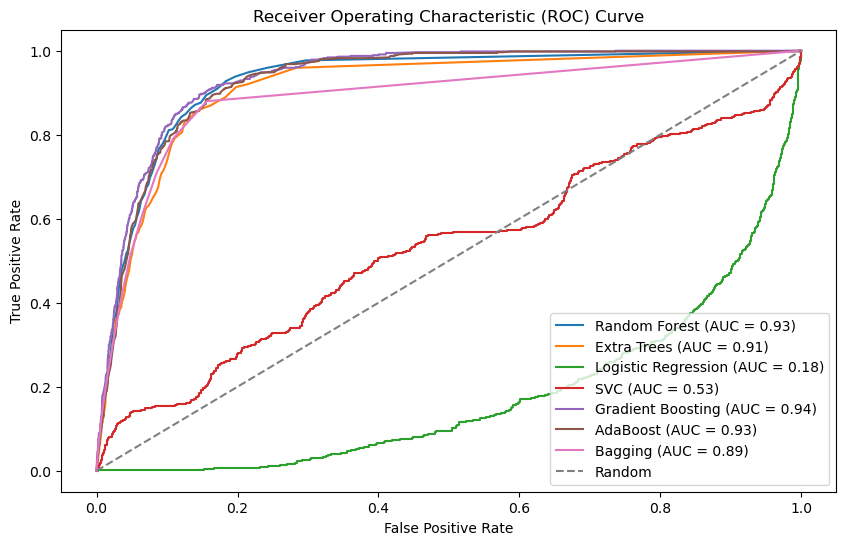

Random Forest: ROC AUC = 0.93
Extra Trees: ROC AUC = 0.91
Logistic Regression: ROC AUC = 0.18
SVC: ROC AUC = 0.53
Gradient Boosting: ROC AUC = 0.94
AdaBoost: ROC AUC = 0.93
Bagging: ROC AUC = 0.89


In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC(probability=True)),  
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier())
]


roc_auc_scores = {}


plt.figure(figsize=(10, 6))
for classifiername, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_pred_probability = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
    roc_auc = roc_auc_score(y_test, y_pred_probability)
    roc_auc_scores[classifiername] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{classifiername} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


for name, roc_auc in roc_auc_scores.items():
    print(f'{name}: ROC AUC = {roc_auc:.2f}')

We have found that our selected model has an ROC AUC = 0.89 while the best ROC AUC = 0.94 goes for gradient boosting classifier.

Let's save the model using the joblib method.

In [104]:
import joblib
joblib.dump(Selected_model,"Subscriber_Data_Analysis.pkl")

['Subscriber_Data_Analysis.pkl']

Let's see the predictions of our predicted values and original values to get a comparisson based on our accuracy scores.

In [105]:
model = joblib.load("Subscriber_Data_Analysis.pkl")
prediction = model.predict(x_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [106]:
finaldata = np.array(y_test)
subscribertype = pd.DataFrame()
subscribertype["ourprediction"] = prediction
subscribertype["originalvalues"] = finaldata
subscribertype

ourprediction  originalvalues
0               0.0             1.0
1               0.0             0.0
2               0.0             0.0
3               0.0             0.0
4               0.0             0.0
...             ...             ...
5767            0.0             0.0
5768            0.0             0.0
5769            0.0             0.0
5770            0.0             0.0
5771            0.0             0.0

[5772 rows x 2 columns]

In [ ]:
Part 2 Testing the slected model on a new dataframe.

let's upload the new test csv into a dataframe using pandas and get a general outloook of the entire database.

In [107]:
url = "https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv"
new_subscriber_data = pd.read_csv(url)

In [108]:
new_subscriber_data

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

First 30 values of our new dataframe.

In [109]:
new_subscriber_data.head(30)

ID  age            job   marital  education default  balance housing  \
0   38441   32       services   married  secondary      no      118     yes   
1   40403   78        retired  divorced    primary      no     2787      no   
2    3709   31  self-employed    single   tertiary      no      144     yes   
3   37422   57       services    single    primary      no     3777     yes   
4   12527   45    blue-collar  divorced  secondary      no     -705      no   
5   16013   32     management    single   tertiary      no        0     yes   
6     196   33    blue-collar    single  secondary      no      307     yes   
7    8516   37     management   married  secondary      no      341      no   
8   31208   36     technician  divorced   tertiary      no     1381      no   
9   38462   50         admin.    single    primary      no      181     yes   
10  17041   34    blue-collar   married    primary      no      654      no   
11   4920   33     management   married   tertiary      no      188     yes   
12    802   40    blue-collar  divorced  secondary      no      139     yes   
13   1738   35     technician   married  secondary      no       55     yes   
14   9565   53     management   married    unknown      no    12001      no   
15  29743   59     unemployed    single  secondary      no      865      no   
16  34946   27     technician    single  secondary      no        2     yes   
17   1671   32       services   married  secondary      no     2068     yes   
18   2868   53    blue-collar   married  secondary      no     5700     yes   
19   6478   32     management    single   tertiary      no     1410     yes   
20   1572   32     management    single   tertiary      no      394     yes   
21  44771   37       services    single   tertiary      no     1189      no   
22  30088   46    blue-collar   married    primary      no      580     yes   
23  19021   58        retired   married  secondary      no      983      no   
24  15704   32       services   married    primary      no      228     yes   
25  39812   54       services  divorced  secondary      no        0      no   
26  21170   51     management   married   tertiary      no     -892     yes   
27    923   37  self-employed   married   tertiary      no      444     yes   
28  17887   26         admin.    single  secondary     yes      -42      no   
29   6778   40         admin.  divorced  secondary      no     -541     yes   

   loan    contact  day month  duration  campaign  pdays  previous poutcome  
0    no   cellular   15   may        20         6     -1         0  unknown  
1    no  telephone    1   jul       372         1     -1         0  unknown  
2    no    unknown   16   may       676         1     -1         0  unknown  
3    no  telephone   13   may        65         2     -1         0  unknown  
4   yes    unknown    3   jul       111         1     -1         0  unknown  
5    no   cellular   22   jul       455         2     -1         0  unknown  
6    no    unknown    5   may       309         2     -1         0  unknown  
7    no    unknown    3   jun       120         2     -1         0  unknown  
8    no   cellular    2   mar       149         1     -1         0  unknown  
9    no   cellular   15   may       119         4    372         3  failure  
10   no   cellular   25   jul       152         1     -1         0  unknown  
11   no    unknown   21   may       136         1     -1         0  unknown  
12   no    unknown    7   may        91         1     -1         0  unknown  
13   no    unknown    9   may        79         4     -1         0  unknown  
14   no    unknown    6   jun       207         1     -1         0  unknown  
15   no   cellular    4   feb      1086         1     -1         0  unknown  
16  yes   cellular    6   may       554         2    356         1  failure  
17  yes    unknown    9   may       143         1     -1         0  unknown  
18   no    unknown   14   may        97         1     -1         0  unknown

Last 30 values of our new dataframe.

In [110]:
new_subscriber_data.tail(30)

ID  age            job   marital  education default  balance  \
13534  35037   54         admin.   married  secondary      no      614   
13535  39369   58     management  divorced   tertiary      no     4256   
13536  30506   42     unemployed    single  secondary      no      139   
13537   2237   45     management    single   tertiary      no        0   
13538  15702   34  self-employed   married   tertiary      no      865   
13539  43893   28     management    single   tertiary      no      187   
13540  32449   35         admin.   married  secondary      no      160   
13541   5367   32  self-employed   married    primary      no       -6   
13542  35700   34     management    single   tertiary      no      220   
13543  30832   41         admin.    single   tertiary      no      873   
13544  41787   62        retired   married  secondary      no     1495   
13545  39915   24        student    single  secondary      no      228   
13546  39530   48     management    single   tertiary      no     5689   
13547  28719   31     technician    single   tertiary      no      236   
13548  27623   37    blue-collar   married    primary      no     1322   
13549   8494   32       services   married  secondary      no     1464   
13550   1901   35     management    single   tertiary      no     -202   
13551  35493   56     technician   married  secondary      no      264   
13552  15162   45     technician   married  secondary      no     1081   
13553  20780   50  self-employed   married  secondary      no       36   
13554  11568   51     unemployed   married  secondary      no     -267   
13555  23487   34     management    single   tertiary      no     1070   
13556  27122   46  self-employed   married    primary      no     3155   
13557    837   30       services    single  secondary      no     -174   
13558  35237   32     technician    single  secondary      no      129   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
13534     yes   no   cellular    6   may       322         2    343         2   
13535      no   no   cellular   22   may       121         1     -1         0   
13536     yes   no   cellular    5   feb       148         2     -1         0   
13537      no   no    unknown   12   may        55         2     -1         0   
13538     yes   no   cellular   21   jul        51         7     -1         0   
13539      no   no   cellular    9   jun       206         1     92         1   
13540     yes  yes   cellular   16   apr       304         1     -1         0   
13541      no   no    unknown   23   may       881         2     -1         0   
13542     yes   no  telephone    8   may        63         1     -1         0   
13543     yes   no   cellular    9   feb        16         9     -1         0   
13544      no   no   cellular   13   oct       896         1     57         2   
13545      no   no   cellular    2   jun       154         1     -1         0   
13546      no   no   cellular   26   may       527         2    103         1   
13547     yes   no   cellular   30   jan       200         1    259         1   
13548     yes   no   cellular   21   nov        14         8    185         1   
13549     yes   no    unknown    3   jun       193         1     -1         0   
13550     yes   no    unknown    9   may      1461         2     -1         0   
13551     yes  yes   cellular    7   may       639         2    280         5   
13552     yes   no   cellular   17   jul       127         3     -1         0   
13553      no   no   cellular   13   aug       104        10     -1         0   
13554      no 

Removing all the rows that we didn't include in our selected model dataframe.

In [117]:
columns_with_low_corelation_and_high_VIF = ['balance','education','job','age','default','month','day','marital','loan','campaign']
new_subscriber_data = new_subscriber_data.drop(columns=columns_with_low_corelation_and_high_VIF)

Checking the first 30 values of new dataframe.

In [118]:
new_subscriber_data.head(30)

ID housing    contact  duration  pdays  previous poutcome
0   38441     yes   cellular        20     -1         0  unknown
1   40403      no  telephone       372     -1         0  unknown
2    3709     yes    unknown       676     -1         0  unknown
3   37422     yes  telephone        65     -1         0  unknown
4   12527      no    unknown       111     -1         0  unknown
5   16013     yes   cellular       455     -1         0  unknown
6     196     yes    unknown       309     -1         0  unknown
7    8516      no    unknown       120     -1         0  unknown
8   31208      no   cellular       149     -1         0  unknown
9   38462     yes   cellular       119    372         3  failure
10  17041      no   cellular       152     -1         0  unknown
11   4920     yes    unknown       136     -1         0  unknown
12    802     yes    unknown        91     -1         0  unknown
13   1738     yes    unknown        79     -1         0  unknown
14   9565      no    unknown       207     -1         0  unknown
15  29743      no   cellular      1086     -1         0  unknown
16  34946     yes   cellular       554    356         1  failure
17   1671     yes    unknown       143     -1         0  unknown
18   2868     yes    unknown        97     -1         0  unknown
19   6478     yes    unknown       175     -1         0  unknown
20   1572     yes    unknown       466     -1         0  unknown
21  44771      no   cellular       323    199         4    other
22  30088     yes  telephone        30     -1         0  unknown
23  19021      no   cellular       139     -1         0  unknown
24  15704     yes   cellular      1017     -1         0  unknown
25  39812      no   cellular       174     81         2  success
26  21170     yes   cellular       248     -1         0  unknown
27    923     yes    unknown       401     -1         0  unknown
28  17887      no   cellular       305     -1         0  unknown
29   6778     yes    unknown       270     -1         0  unknown

Encoding all the columns with the same values that we used in our selected model dataframe.

In [121]:
label_encoder = LabelEncoder()
new_subscriber_data['contact_encoded'] = label_encoder.fit_transform(new_subscriber_data['contact'])
mapping = {'telephone': 1, 'cellular': 2, 'unknown': 0}
new_subscriber_data['contact_mapped'] = new_subscriber_data['contact'].map(mapping)
print(new_subscriber_data)

          ID housing    contact  duration  pdays  previous poutcome  \
0      38441     yes   cellular        20     -1         0  unknown   
1      40403      no  telephone       372     -1         0  unknown   
2       3709     yes    unknown       676     -1         0  unknown   
3      37422     yes  telephone        65     -1         0  unknown   
4      12527      no    unknown       111     -1         0  unknown   
...      ...     ...        ...       ...    ...       ...      ...   
13559  23465      no   cellular       148     -1         0  unknown   
13560  11743     yes    unknown       158     -1         0  unknown   
13561  28292     yes   cellular       136     -1         0  unknown   
13562  45163      no   cellular       208     91         3  success   
13563  34839     yes   cellular       339    362         1  failure   

       contact_encoded  contact_mapped  
0                    0               2  
1                    1               1  
2                    2  

In [122]:
label_encoder = LabelEncoder()
new_subscriber_data['poutcome_encoded'] = label_encoder.fit_transform(new_subscriber_data['poutcome'])
mapping = {'unknown': 0, 'success': 2, 'failure': 1}
new_subscriber_data['poutcome_mapped'] = new_subscriber_data['poutcome'].map(mapping)
print(new_subscriber_data)

          ID housing    contact  duration  pdays  previous poutcome  \
0      38441     yes   cellular        20     -1         0  unknown   
1      40403      no  telephone       372     -1         0  unknown   
2       3709     yes    unknown       676     -1         0  unknown   
3      37422     yes  telephone        65     -1         0  unknown   
4      12527      no    unknown       111     -1         0  unknown   
...      ...     ...        ...       ...    ...       ...      ...   
13559  23465      no   cellular       148     -1         0  unknown   
13560  11743     yes    unknown       158     -1         0  unknown   
13561  28292     yes   cellular       136     -1         0  unknown   
13562  45163      no   cellular       208     91         3  success   
13563  34839     yes   cellular       339    362         1  failure   

       contact_encoded  contact_mapped  poutcome_encoded  poutcome_mapped  
0                    0               2                 3              0

In [123]:
columns_to_convert = ['housing']
for column in columns_to_convert:
    new_subscriber_data[column] = new_subscriber_data[column].map({'yes': 1, 'no': 0})
print(new_subscriber_data)

          ID  housing    contact  duration  pdays  previous poutcome  \
0      38441        1   cellular        20     -1         0  unknown   
1      40403        0  telephone       372     -1         0  unknown   
2       3709        1    unknown       676     -1         0  unknown   
3      37422        1  telephone        65     -1         0  unknown   
4      12527        0    unknown       111     -1         0  unknown   
...      ...      ...        ...       ...    ...       ...      ...   
13559  23465        0   cellular       148     -1         0  unknown   
13560  11743        1    unknown       158     -1         0  unknown   
13561  28292        1   cellular       136     -1         0  unknown   
13562  45163        0   cellular       208     91         3  success   
13563  34839        1   cellular       339    362         1  failure   

       contact_encoded  contact_mapped  poutcome_encoded  poutcome_mapped  
0                    0               2                 3   

In [124]:
column_to_drop = ['poutcome_encoded','contact_encoded','poutcome','contact']
new_subscriber_data = new_subscriber_data.drop(columns=column_to_drop)
print(new_subscriber_data)

          ID  housing  duration  pdays  previous  contact_mapped  \
0      38441        1        20     -1         0               2   
1      40403        0       372     -1         0               1   
2       3709        1       676     -1         0               0   
3      37422        1        65     -1         0               1   
4      12527        0       111     -1         0               0   
...      ...      ...       ...    ...       ...             ...   
13559  23465        0       148     -1         0               2   
13560  11743        1       158     -1         0               0   
13561  28292        1       136     -1         0               2   
13562  45163        0       208     91         3               2   
13563  34839        1       339    362         1               2   

       poutcome_mapped  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
13559   

let' scale the new dataframe to test our selected model on it values.

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
subscriber_x_new = new_subscriber_data

In [127]:
scaler = StandardScaler()
scaler.fit(x_train)
subscriber_x_new_scaled = scaler.transform(subscriber_x_new)


Now let's impote the columns to fill empty values using the mean scores of each column using the selected model.

In [130]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
subscriber_x_new_imputed = imputer.fit_transform(subscriber_x_new_scaled)
predictions = Selected_model.predict(subscriber_x_new_imputed)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Let's look at our predictions based on our selected model.

In [131]:
predictions

array([0., 1., 1., ..., 1., 1., 1.])

Let's get the first 40 values of our predicted scores after applying our selected model to the new dataframe.

In [134]:
first_40_values = predictions[:40]

In [135]:
first_40_values

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

Let's get the last 40 values from the subscribed column.

In [136]:
last_40_values = predictions[-40:]

In [137]:
last_40_values

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

We can see an overwhelmingly positive scores, with a lot of them turning into subscribers. This helps us to conclude the project.